In [1]:
import sympy as smp

r1, r2 = smp.symbols('r1 r2 ', real=True, positive=True)
theta = smp.symbols('theta')
theta1, phi1 = smp.symbols('theta_1 phi_1')
theta2, phi2 = smp.symbols('theta_2 phi_2')

x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'x1')(r1, theta1, phi1)
y2 = smp.Function(r'x2')(r2, theta2, phi2)

z1 = smp.Function(r'x1')(r1, theta1)
z2 = smp.Function(r'x2')(r2, theta2)

Psi = smp.Function('Psi')(r1, r2)
V = smp.Function('V')(r1, r2)
absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))

V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)
Laplacian = (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) + (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) + (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) + (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) + (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) + (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

In [2]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

In [3]:
Phi_1 = smp.Function('\Phi_1')(r1, r2)
Phi_2 = smp.Function('\Phi_2')(r1, r2)
Phi_3 = smp.Function('\Phi_3')(r1, r2)
Phi_4 = smp.Function('\Phi_4')(r1, r2)
Phi_5 = smp.Function('\Phi_5')(r1, r2)
Phi_6 = smp.Function('\Phi_6')(r1, r2)
Phi_7 = smp.Function('\Phi_7')(r1, r2)

In [4]:
Phi_1 = smp.exp(-2 * (r1 + r2))
Phi_2 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)
Phi_3 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)
Phi_4 = smp.exp(-2 * (r1 + r2)) * r1 * r2
Phi_5 = smp.exp(-2 * (r1 + r2)) * (r1**2 + r2**2)
Phi_6 = smp.exp(-2 * (r1 + r2)) * (absolute_diff)**2
Phi_7 = smp.exp(-2 * (r1 + r2)) * (r1 + r2) * (absolute_diff)

In [5]:
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [6]:
Phi_1 = Phi_1.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_2 = Phi_2.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_3 = Phi_3.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_4 = Phi_4.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_5 = Phi_5.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_6 = Phi_6.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Phi_7 = Phi_7.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)

In [7]:
V_eff = V_eff.subs(smp.sin(theta), sin_theta).subs(smp.cos(theta), cos_theta)
Hamiltonian = Laplacian + V * Psi

In [8]:
H_Phi_1 = Hamiltonian.subs({Psi: Phi_1, V:V_eff}).simplify()

In [9]:
H_Phi_2 = Hamiltonian.subs({Psi: Phi_2, V:V_eff}).simplify()

In [10]:
H_Phi_3 = Hamiltonian.subs({Psi: Phi_3, V:V_eff}).simplify()

In [11]:
H_Phi_4 = Hamiltonian.subs({Psi: Phi_4, V:V_eff}).simplify()

In [12]:
H_Phi_5 = Hamiltonian.subs({Psi: Phi_5, V:V_eff}).simplify()

In [13]:
H_Phi_6 = Hamiltonian.subs({Psi: Phi_6, V:V_eff}).simplify()

In [14]:
H_Phi_7 = Hamiltonian.subs({Psi: Phi_7, V:V_eff}).simplify()

In [15]:
f_11 = (Phi_1 * H_Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
f_11 = f_11.simplify()
f_11

r1*r2*(8*r1*r2 + r1*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1 - 6*r2)*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)

In [16]:
f_22 = (Phi_2 * H_Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
f_22 = f_22.simplify()
f_22

r1*r2*(r1 + r2)*(8*r1**2*r2 + r1**2*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1**2 + 8*r1*r2**2 + r1*r2**2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 20*r1*r2 + 2*r1 - 6*r2**2 + 2*r2)*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)

In [17]:
f_33 = (Phi_3 * H_Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
f_33 = f_33.simplify()
f_33

r1*r2*(-r1*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r2*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2 - (r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)**2 + 4*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2) + 4*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)**2) + 2*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2) + 4*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)**2) - r2*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)

In [18]:
f_44 = (Phi_4 * H_Phi_4) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
f_44 = f_44.simplify()
f_44

r1**2*r2**2*(8*r1**2*r2**2 + r1**2*r2**2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 10*r1**2*r2 + 2*r1**2 - 10*r1*r2**2 + 2*r2**2)*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)

In [19]:
f_55 = (Phi_5 * H_Phi_5) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
f_55 = f_55.simplify()
f_55

r1*r2*(r1**2 + r2**2)*(8*r1**3*r2 + r1**3*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1**3 - 14*r1**2*r2 + 8*r1*r2**3 + r1*r2**3/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 14*r1*r2**2 + 12*r1*r2 - 6*r2**3)*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)

In [20]:
f_66 = (Phi_6 * H_Phi_6) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
f_66 = f_66.simplify()
f_66

r1*r2*sqrt(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-2*r1*sqrt(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-2*r1**2*r2 + 2*r1**2 + 4*r1*r2**2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + 4*r1*r2**2*cos(theta_1)*cos(theta_2) - 8*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 8*r1*r2*cos(theta_1)*cos(theta_2) + 2*r1*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + 2*r1*cos(theta_1)*cos(theta_2) - 2*r2**3 + 6*r2**2 - 3*r2) + 2*r2*sqrt(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(2*r1**3 - 4*r1**2*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 4*r1**2*r2*cos(theta_1)*cos(theta_2) - 6*r1**2 + 2*r1*r2**2 + 8*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + 8*r1*r2*cos(theta_1)*cos(theta_2) + 3*r1 - 2*r2**2 - 2*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r2*cos(theta_1)*cos(theta_2)) - (r1**2 - 2*r1*r2

In [21]:
f_77 = (Phi_7 * H_Phi_7) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
f_77 = f_77.simplify()
f_77

-r1*r2*(r1 + r2)*(r1*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r2*(-r1**2*(r1 + r2)*(sin(theta_1)**2*sin(theta_2)**2*cos(phi_1 - phi_2)**2 + 2*sin(theta_1)*sin(theta_2)*cos(theta_1)*cos(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)**2*cos(theta_2)**2 - 1) + 4*(r1 + r2 - 1)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)**2 + 2*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2)*(-r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2 + 2*(r1 + r2)*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2))) + 2*(r1 + r2)*(r1*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) - r2)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) + cos(theta_1)*cos(theta_2)) + r2**2) + 2*(2*r1 + 2*r2 - 1)*(r1**2 - 2*r1*r2*(sin(theta_1)*sin(theta_2)*cos(phi

In [22]:
f_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_11)
f_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_22)
f_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_33)
f_44_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_44)
f_55_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_55)
f_66_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_66)
f_77_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], f_77)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

r1 = np.linspace(0, 5, 1000)
r2 = np.linspace(0, 5, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

R1, R2 = np.meshgrid(r1, r2)
Theta1, Theta2 = np.meshgrid(theta1, theta2)
Phi1, Phi2 = np.meshgrid(phi1, phi2)

# R1, R2, Theta1, Theta2, Phi1, Phi2 = np.meshgrid(r1, r2, theta1, theta2, phi1, phi2)

In [24]:
F_11_2d = f_11_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_22_2d = f_22_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_33_2d = f_33_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_44_2d = f_44_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_55_2d = f_55_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_66_2d = f_66_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)
F_77_2d = f_77_f(r1, np.pi/6, np.pi/2, 0.522, np.pi/4, 3*np.pi/4)

## These are arrays of shape (100,)

In [25]:
F_11_3d = f_11_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
F_22_3d = f_22_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
F_33_3d = f_33_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
F_44_3d = f_44_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
F_55_3d = f_55_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
F_66_3d = f_66_f(R1, Theta1, Phi1, R2, Theta2, Phi2)
F_77_3d = f_77_f(R1, Theta1, Phi1, R2, Theta2, Phi2)

## These are arrays of shape (100,100)

<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return r1*r2*(8*r1*r2 + r1*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1 - 6*r2)*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in divide
  return r1*r2*(8*r1*r2 + r1*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1 - 6*r2)*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in divide
  return r1*r2*(8*r1*r2 + r1*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(theta_2)*cos(phi_1 - phi_2) - 2*r1*r2*cos(theta_1)*cos(theta_2) + r2**2) - 6*r1 - 6*r2)*exp(-4*r1 - 4*r2)*sin(theta_1)*sin(theta_2)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return r1*r2*(r1 + r2)*(8*r1**2*r2 + r1**2*r2/sqrt(r1**2 - 2*r1*r2*sin(theta_1)*sin(the

In [26]:
F_2d = F_11_2d + F_22_2d + F_33_2d + F_44_2d + F_55_2d + F_66_2d + F_77_2d
## This is also the Sampling function P with all coefficients equal to 1

F_3d = F_11_3d + F_22_3d + F_33_3d + F_44_3d + F_55_3d + F_66_3d + F_77_3d

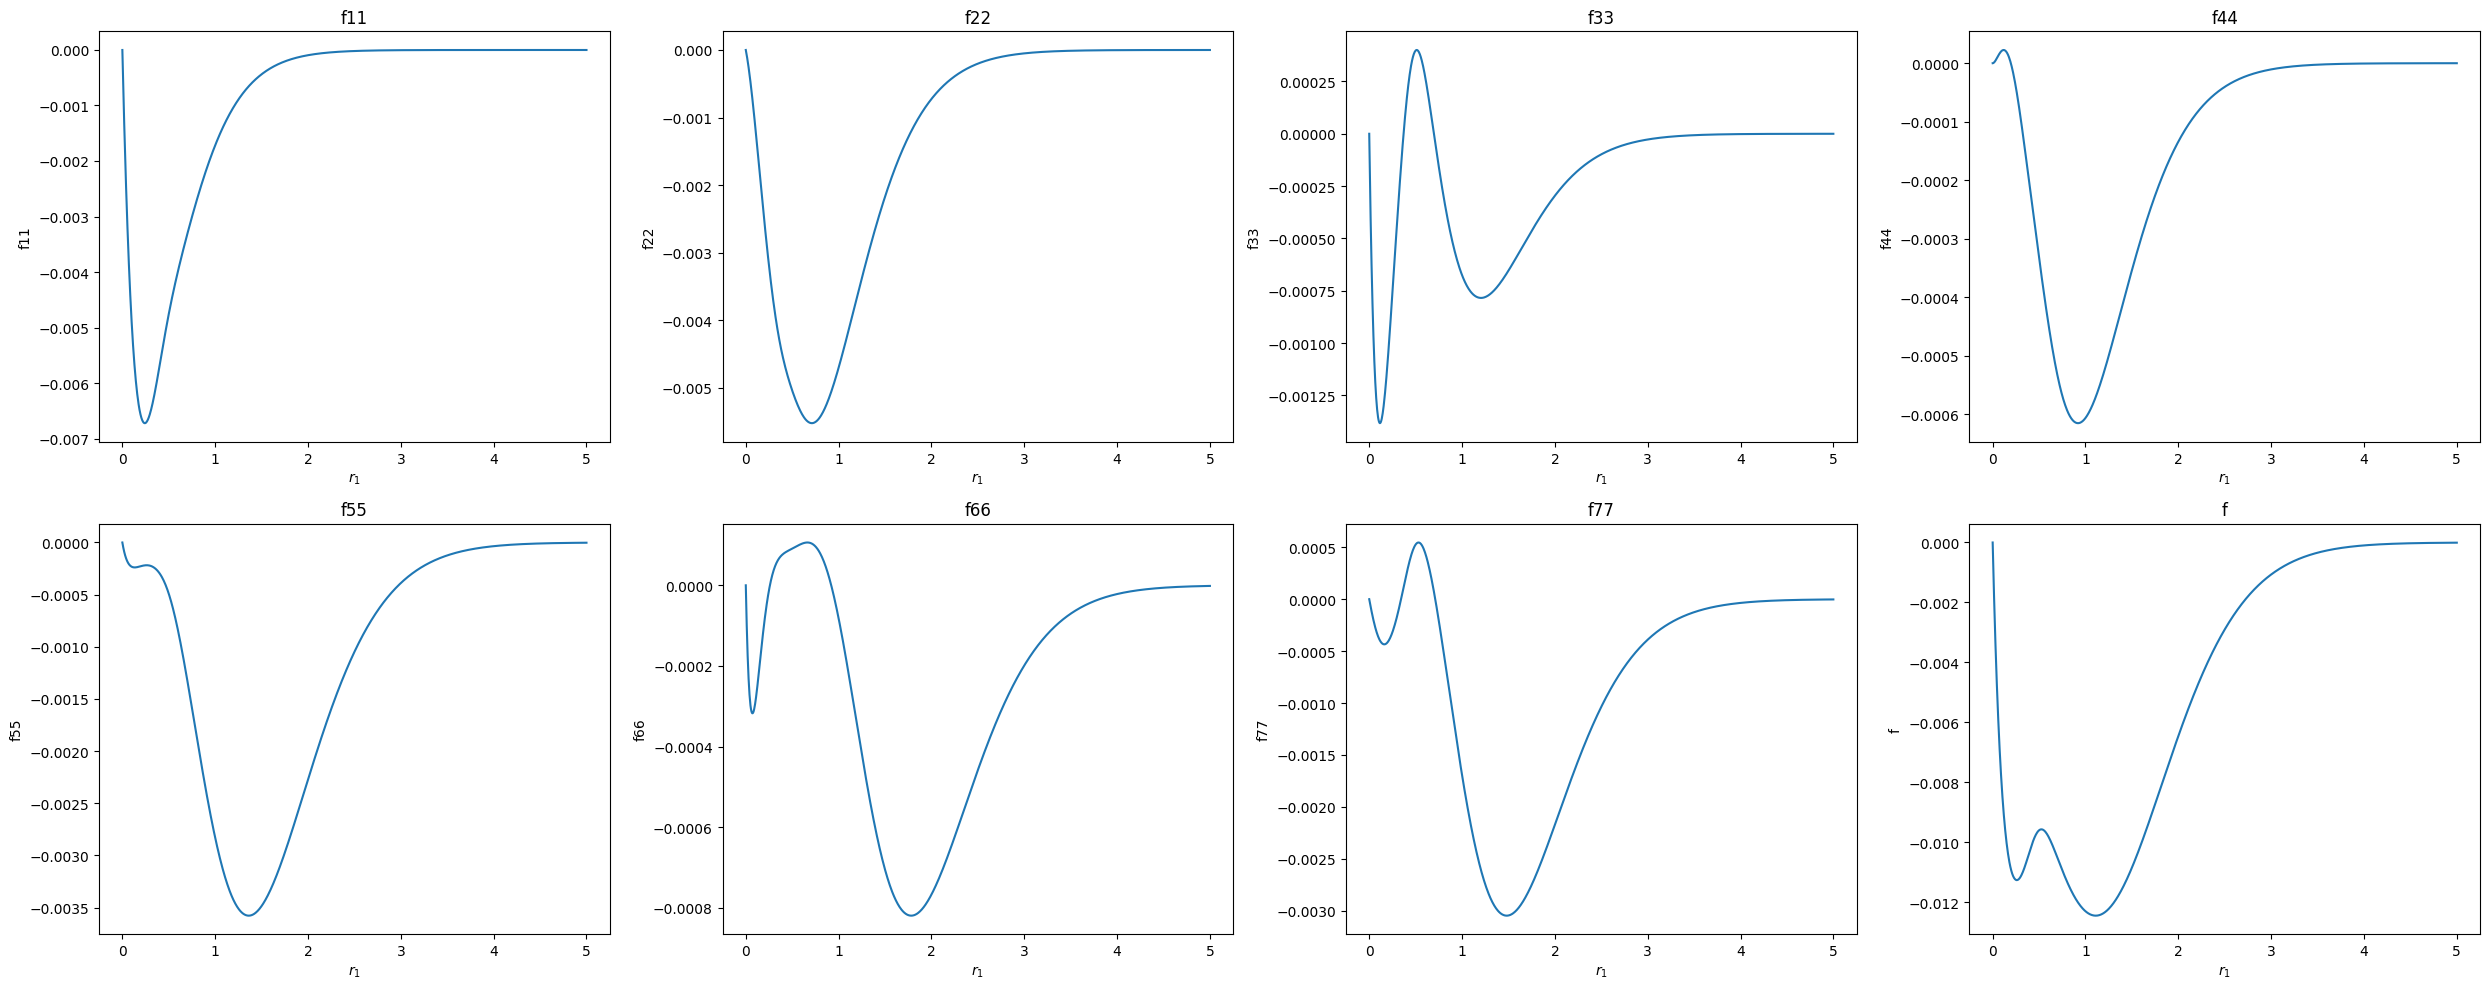

In [27]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i])
    ax.set_xlabel('$r_1$')
    ax.set_ylabel(titles[i])
    ax.set_title(titles[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

/usr/local/lib/python3.10/dist-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


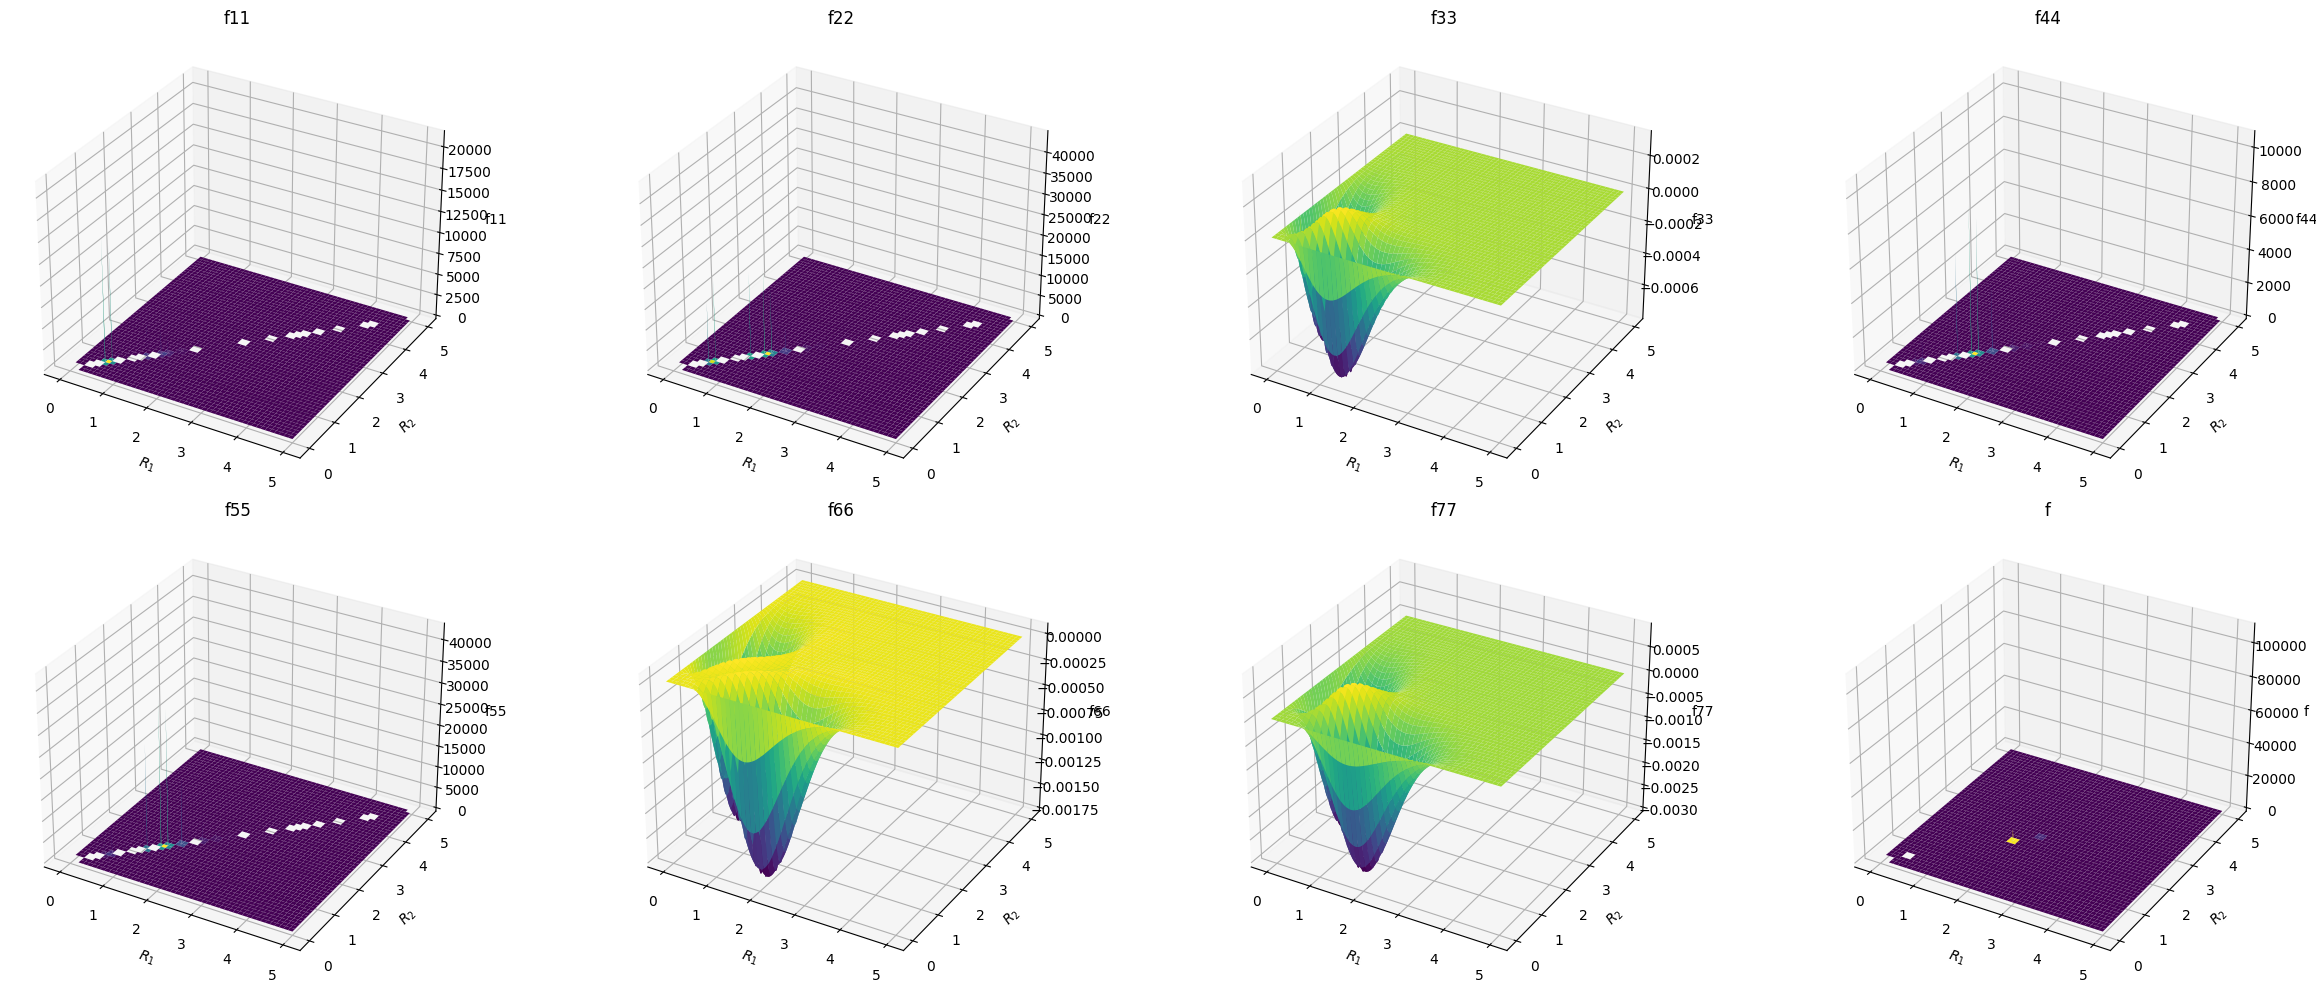

In [28]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10), subplot_kw=dict(projection='3d'))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_3d, F_22_3d, F_33_3d, F_44_3d, F_55_3d, F_66_3d, F_77_3d, F_3d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot_surface(R1, R2, functions[i], cmap = 'viridis')
    ax.set_xlabel('$R_1$')
    ax.set_ylabel('$R_2$')
    ax.set_zlabel(titles[i])
    ax.set_title(titles[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

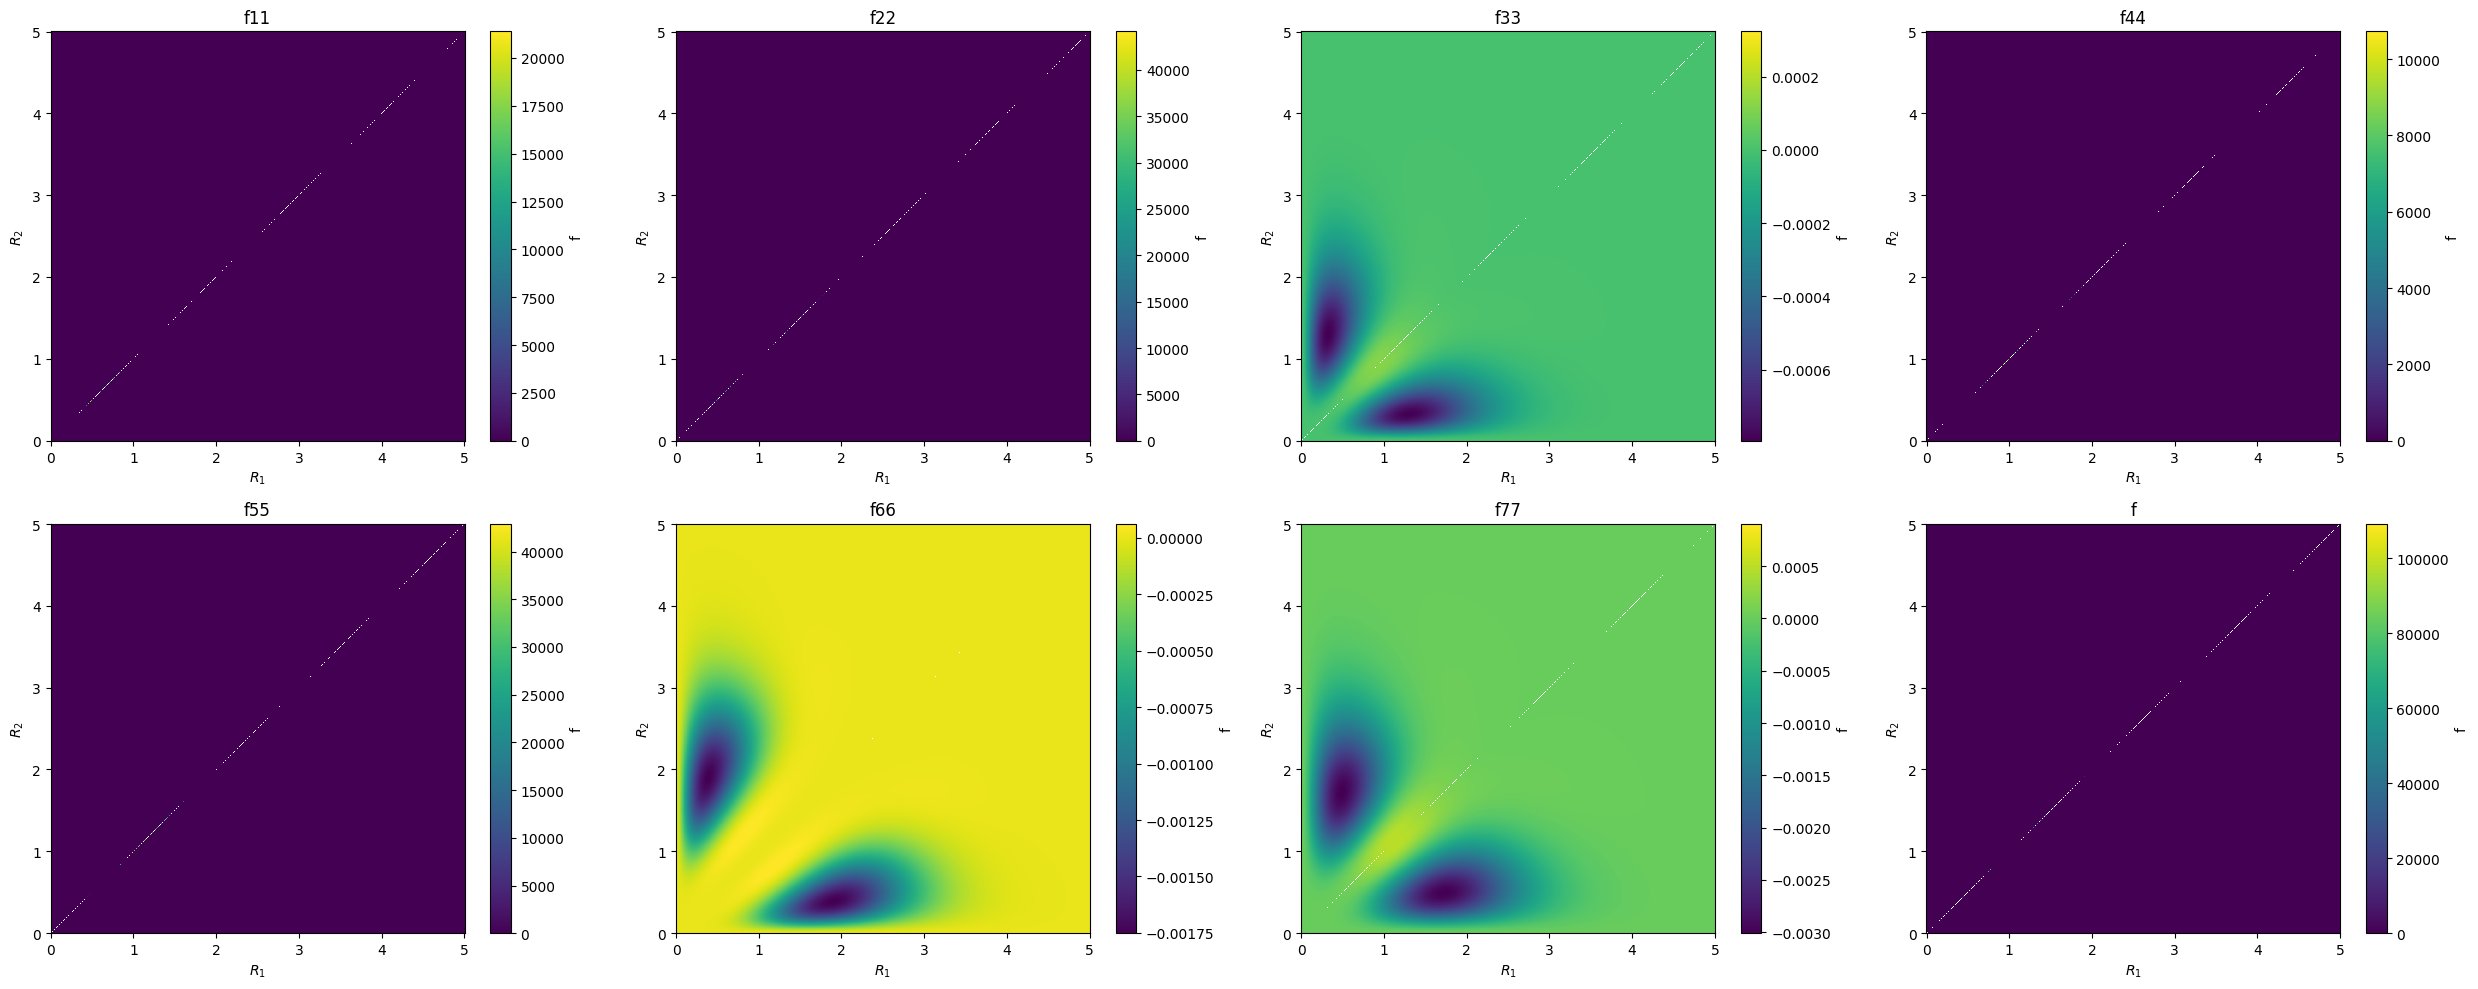

In [29]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_3d, F_22_3d, F_33_3d, F_44_3d, F_55_3d, F_66_3d, F_77_3d, F_3d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    pcm = ax.pcolormesh(R1, R2, functions[i], cmap = 'viridis', shading = 'auto')
    ax.set_xlabel('$R_1$')
    ax.set_ylabel('$R_2$')
    ax.set_title(titles[i])
    plt.colorbar(pcm, ax=ax, label = 'f')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
f11_over_f = F_11_2d/F_2d
f22_over_f = F_22_2d/F_2d
f33_over_f = F_33_2d/F_2d
f44_over_f = F_44_2d/F_2d
f55_over_f = F_55_2d/F_2d
f66_over_f = F_66_2d/F_2d
f77_over_f = F_77_2d/F_2d

F11_over_F = F_11_3d/F_3d
F22_over_F = F_22_3d/F_3d
F33_over_F = F_33_3d/F_3d
F44_over_F = F_44_3d/F_3d
F55_over_F = F_55_3d/F_3d
F66_over_F = F_66_3d/F_3d
F77_over_F = F_77_3d/F_3d

<ipython-input-30-23d68edc3e46>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_f = F_11_2d/F_2d
<ipython-input-30-23d68edc3e46>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_f = F_22_2d/F_2d
<ipython-input-30-23d68edc3e46>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_f = F_33_2d/F_2d
<ipython-input-30-23d68edc3e46>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_f = F_44_2d/F_2d
<ipython-input-30-23d68edc3e46>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_f = F_55_2d/F_2d
<ipython-input-30-23d68edc3e46>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_f = F_66_2d/F_2d
<ipython-input-30-23d68edc3e46>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_f = F_77_2d/F_2d
<ipython-input-30-23d68edc3e46>:9: RuntimeWarning: invalid value encountered in divide
  F11_over_F = F_11_3d/F_3d
<ipython-input-30-23d68edc3e46>:10: RuntimeWarning: invalid value encountered in

<ipython-input-31-5bcc7d187f88>:7: RuntimeWarning: invalid value encountered in divide
  functions = [f11_over_f, f22_over_f, f33_over_f, f44_over_f, f55_over_f, f66_over_f, f77_over_f, F_2d/F_2d]


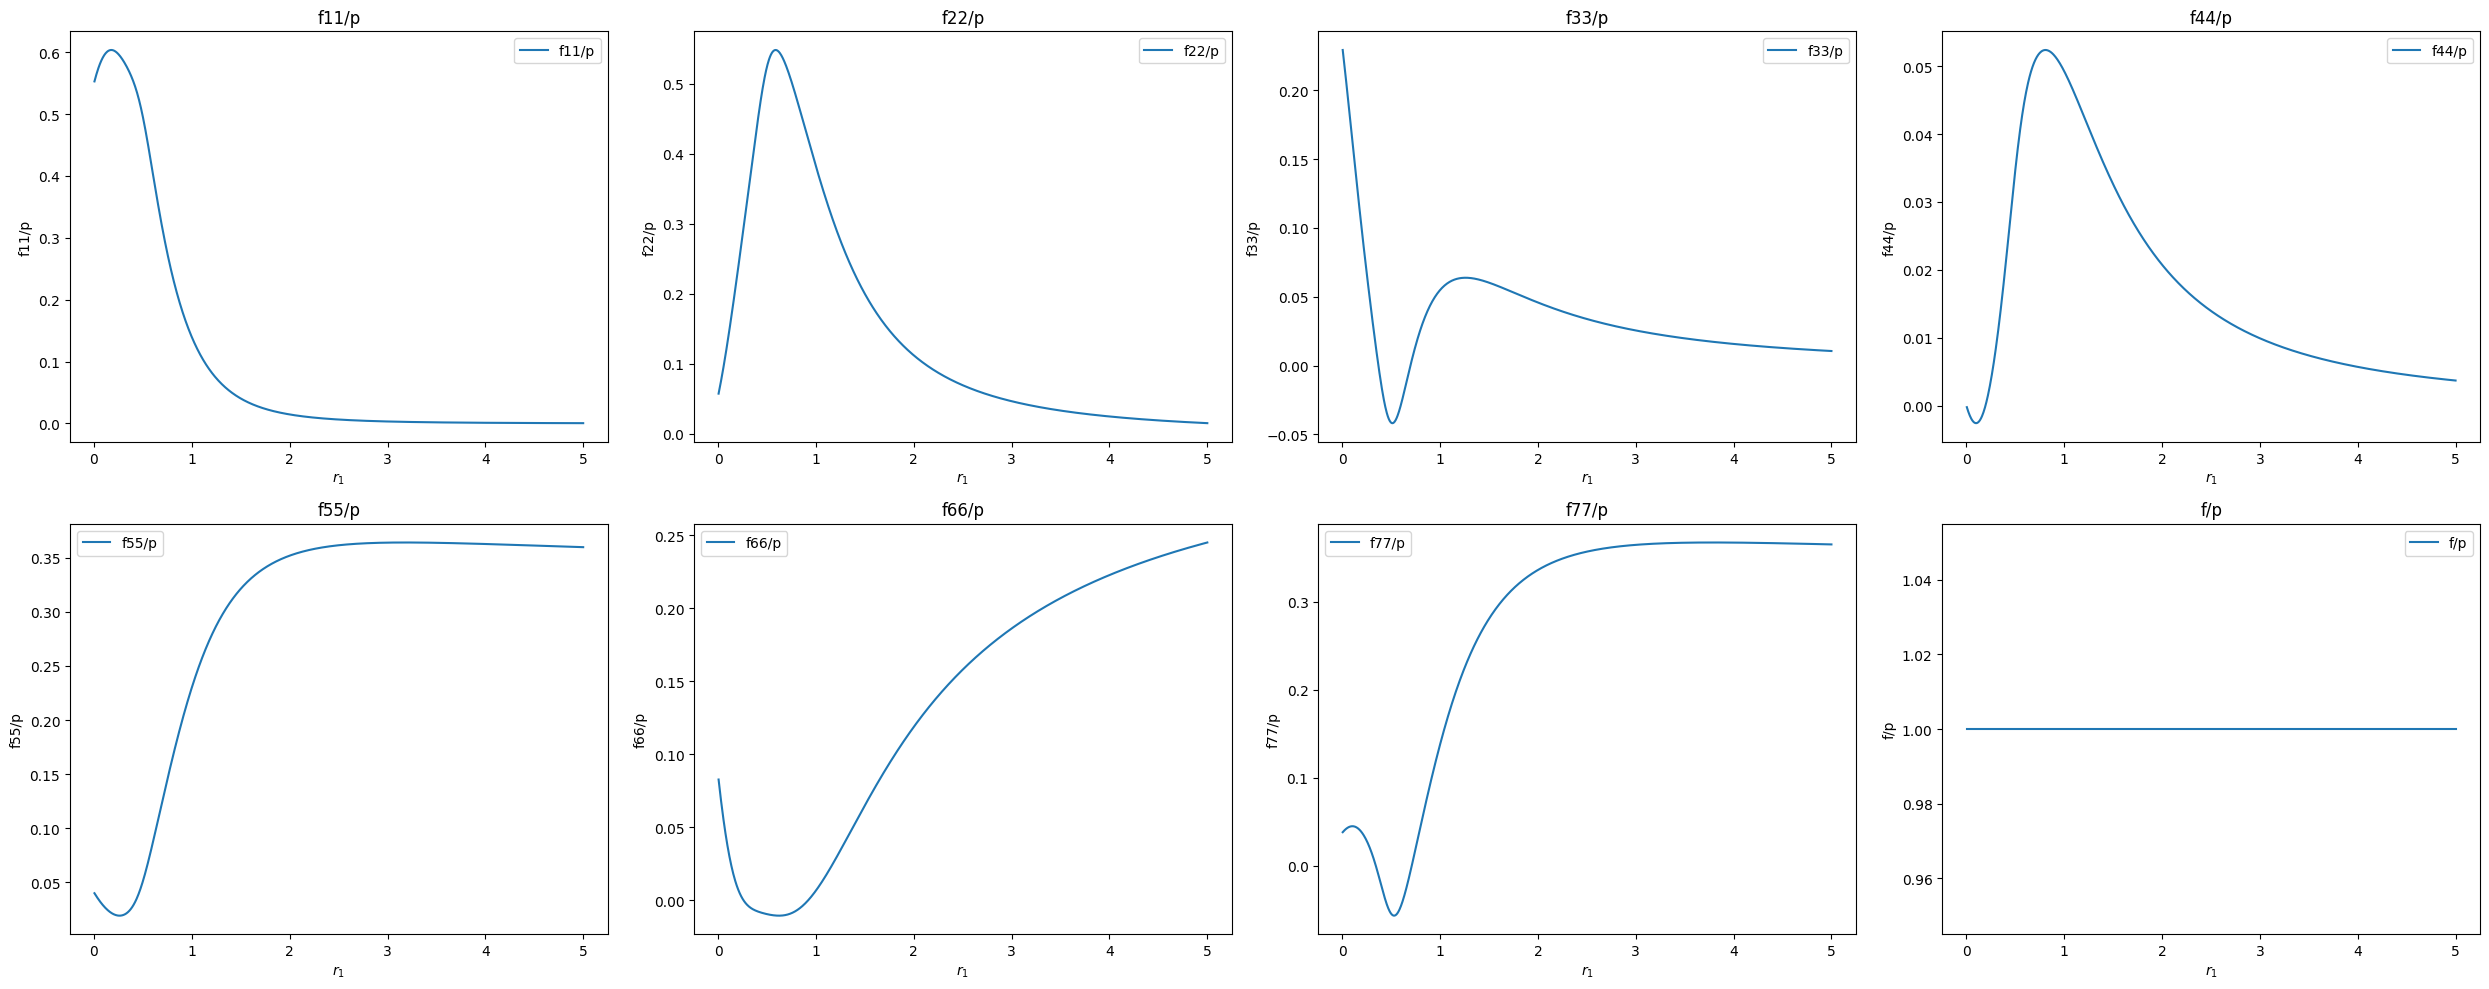

In [31]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_f, f22_over_f, f33_over_f, f44_over_f, f55_over_f, f66_over_f, f77_over_f, F_2d/F_2d]
titles = ['f11/p', 'f22/p', 'f33/p', 'f44/p', 'f55/p', 'f66/p', 'f77/p', 'f/p']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.set_ylabel(titles[i])
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-32-a77856fff782>:7: RuntimeWarning: invalid value encountered in divide
  functions = [F11_over_F, F22_over_F, F33_over_F, F44_over_F, F55_over_F, F66_over_F, F77_over_F, F_3d/F_3d]


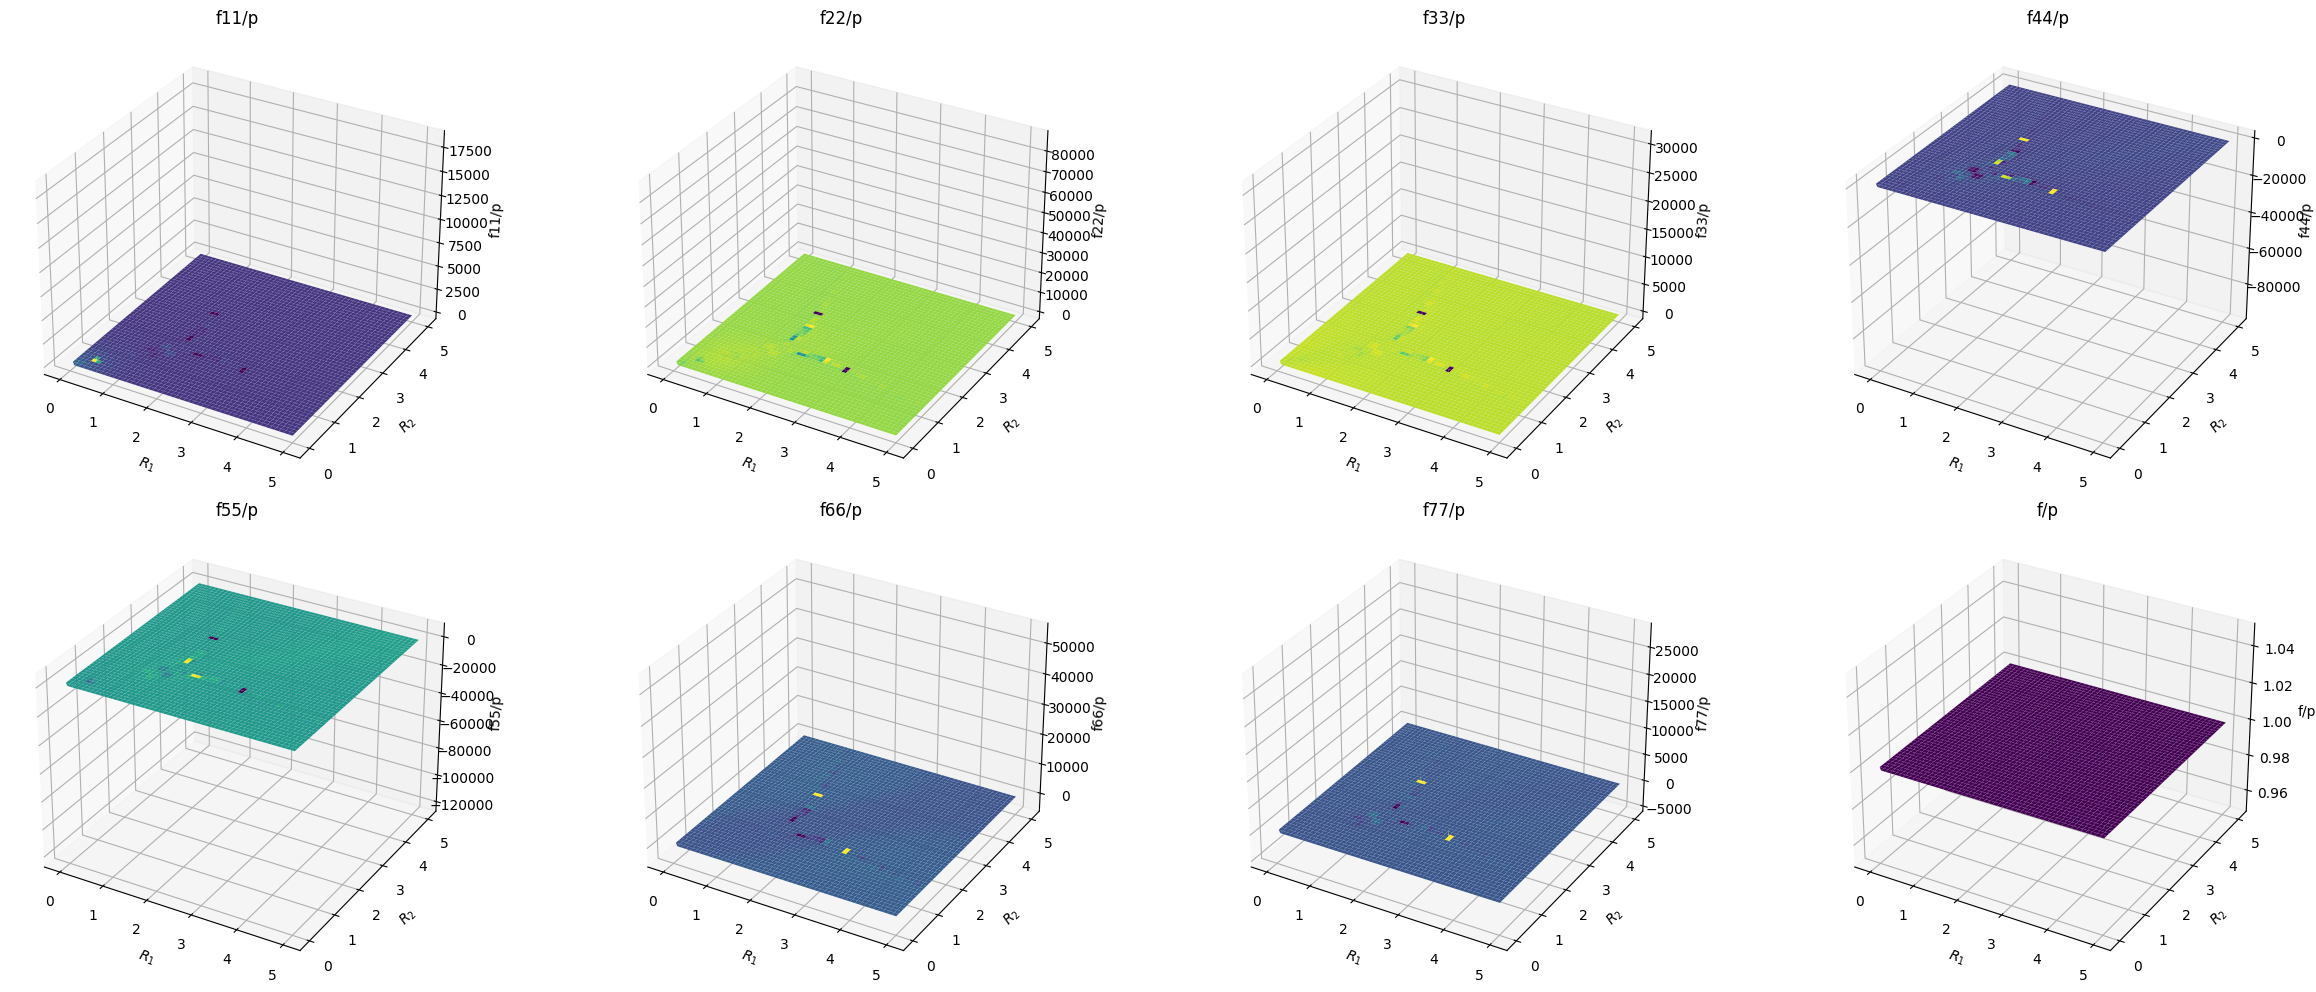

In [32]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10), subplot_kw=dict(projection='3d'))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F11_over_F, F22_over_F, F33_over_F, F44_over_F, F55_over_F, F66_over_F, F77_over_F, F_3d/F_3d]
titles = ['f11/p', 'f22/p', 'f33/p', 'f44/p', 'f55/p', 'f66/p', 'f77/p', 'f/p']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot_surface(R1, R2, functions[i], cmap = 'viridis')
    ax.set_xlabel('$R_1$')
    ax.set_ylabel('$R_2$')
    ax.set_zlabel(titles[i])
    ax.set_title(titles[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<ipython-input-33-87efe5e43bd7>:7: RuntimeWarning: invalid value encountered in divide
  functions = [F11_over_F, F22_over_F, F33_over_F, F44_over_F, F55_over_F, F66_over_F, F77_over_F, F_3d/F_3d]


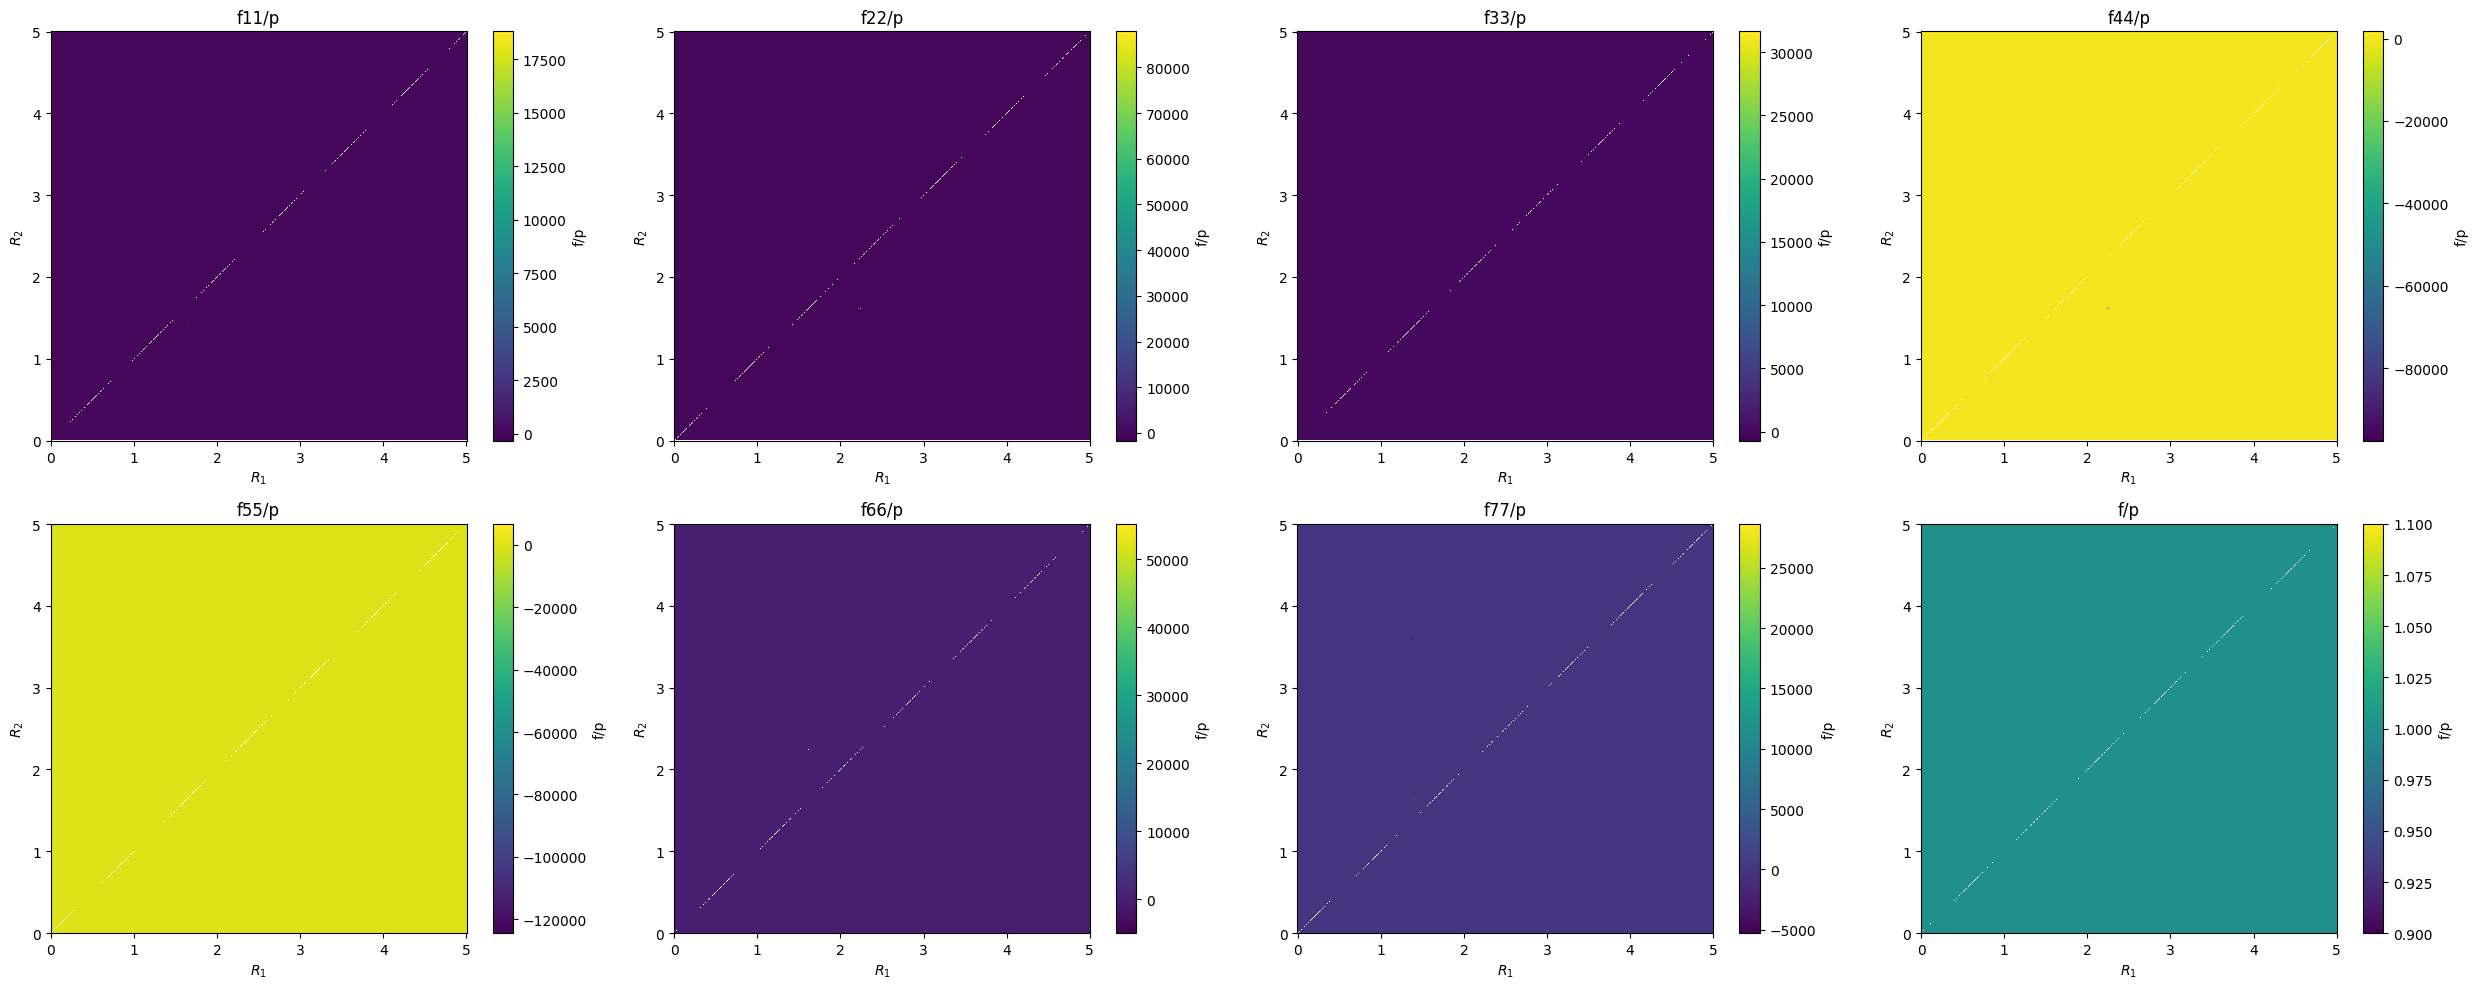

In [33]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F11_over_F, F22_over_F, F33_over_F, F44_over_F, F55_over_F, F66_over_F, F77_over_F, F_3d/F_3d]
titles = ['f11/p', 'f22/p', 'f33/p', 'f44/p', 'f55/p', 'f66/p', 'f77/p', 'f/p']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    pcm = ax.pcolormesh(R1, R2, functions[i], cmap = 'viridis', shading = 'auto')
    ax.set_xlabel('$R_1$')
    ax.set_ylabel('$R_2$')
    ax.set_title(titles[i])
    plt.colorbar(pcm, ax=ax, label = 'f/p')

# Adjust layout
plt.tight_layout()


# Show the plots
plt.show()

In [34]:
import tensorflow as tf
from tensorflow.keras import backend as K

# Sample data
f = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d]
F = [F_11_3d, F_22_3d, F_33_3d, F_44_3d, F_55_3d, F_66_3d, F_77_3d]

In [35]:
coefficients = tf.Variable(np.ones(7), dtype = tf.float32)
coefficients  # Initial Coefficients chosen

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [36]:
# Define the sampling function p

def sampling_function(coefficients, f):

  p = sum(coefficients[i] * f[i] for i in range(7))
  return p

# Define the custom loss function
def variance_loss(f, p):
    loss = 0
    for i in range(7):
        ratio = f[i] / (p + 1e-6) # f/p will be an array of 100 elements

        # Filter out nan and inf values from the array
        mask_f_ii_p = tf.math.logical_not(tf.math.is_nan(ratio)) & tf.math.logical_not(tf.math.is_inf(ratio))
        ratio_new = tf.boolean_mask(ratio, mask_f_ii_p)

        variance = tf.math.reduce_variance(ratio_new) # Gives the variance of the new array
        loss += variance

    return loss

In [37]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step():

    with tf.GradientTape() as tape:

        p = sampling_function(coefficients, f)
        loss = variance_loss(f, p)

    gradients = tape.gradient(loss, [coefficients])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients]
    optimizer.apply_gradients(zip(gradients, [coefficients]))

    return loss

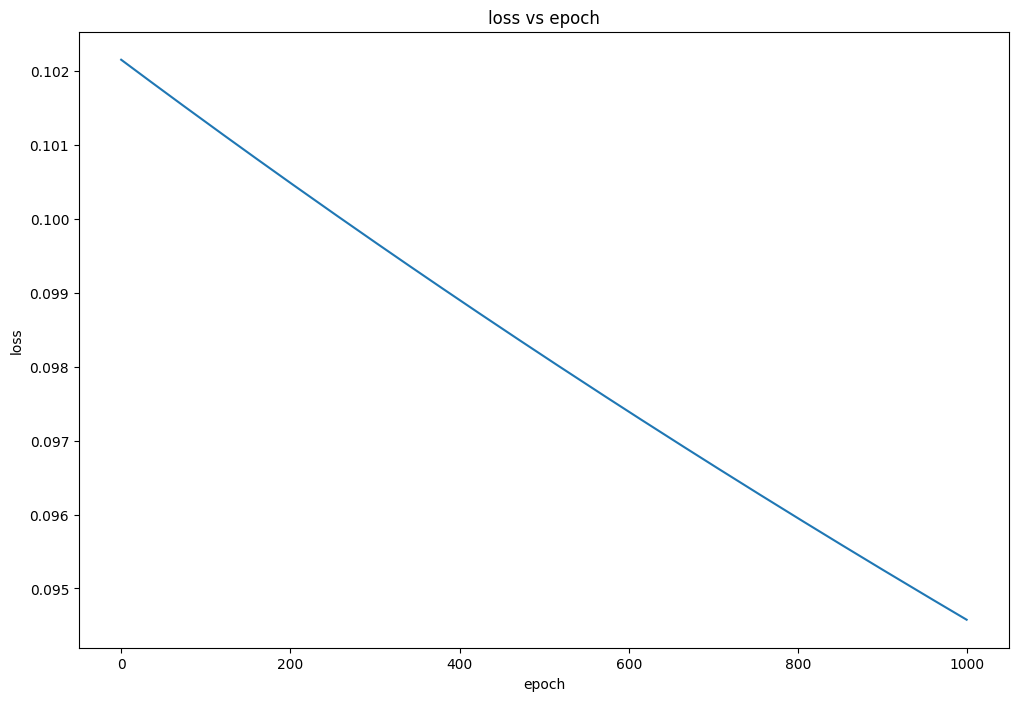

In [38]:
# Training loop
epochs = 1000
loss_list = []
for epoch in range(epochs):
    loss = train_step()
    loss_list.append(loss)

epoch = np.arange(epochs)
loss = np.array(loss_list)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show()  ## This graph indicates high learning rate (learning rate was lowered around 10^-8 to get correct plot)

In [39]:
# Best coefficients
best_coefficients = coefficients.numpy()
print("Best coefficients:", best_coefficients)

Best coefficients: [1.0503987 1.0448669 1.0058571 1.0034424 1.0393769 1.0184759 1.0329813]


In [40]:
p = best_coefficients[0] * F_11_2d + best_coefficients[1] * F_22_2d + best_coefficients[2] * F_33_2d + best_coefficients[3]  * F_44_2d + best_coefficients[4] * F_55_2d + best_coefficients[5] * F_66_2d + best_coefficients[6] * F_77_2d
p = p/np.max(best_coefficients) # To normalize P

## An array of 100 elements

In [41]:
# The final optimized coefficients after normalization (that are included in p)

coefficients_normalized = best_coefficients/np.max(best_coefficients)
print("Best coefficients after normalization:", coefficients_normalized)

Best coefficients after normalization: [1.         0.99473363 0.9575955  0.9552967  0.98950696 0.96960884
 0.9834183 ]


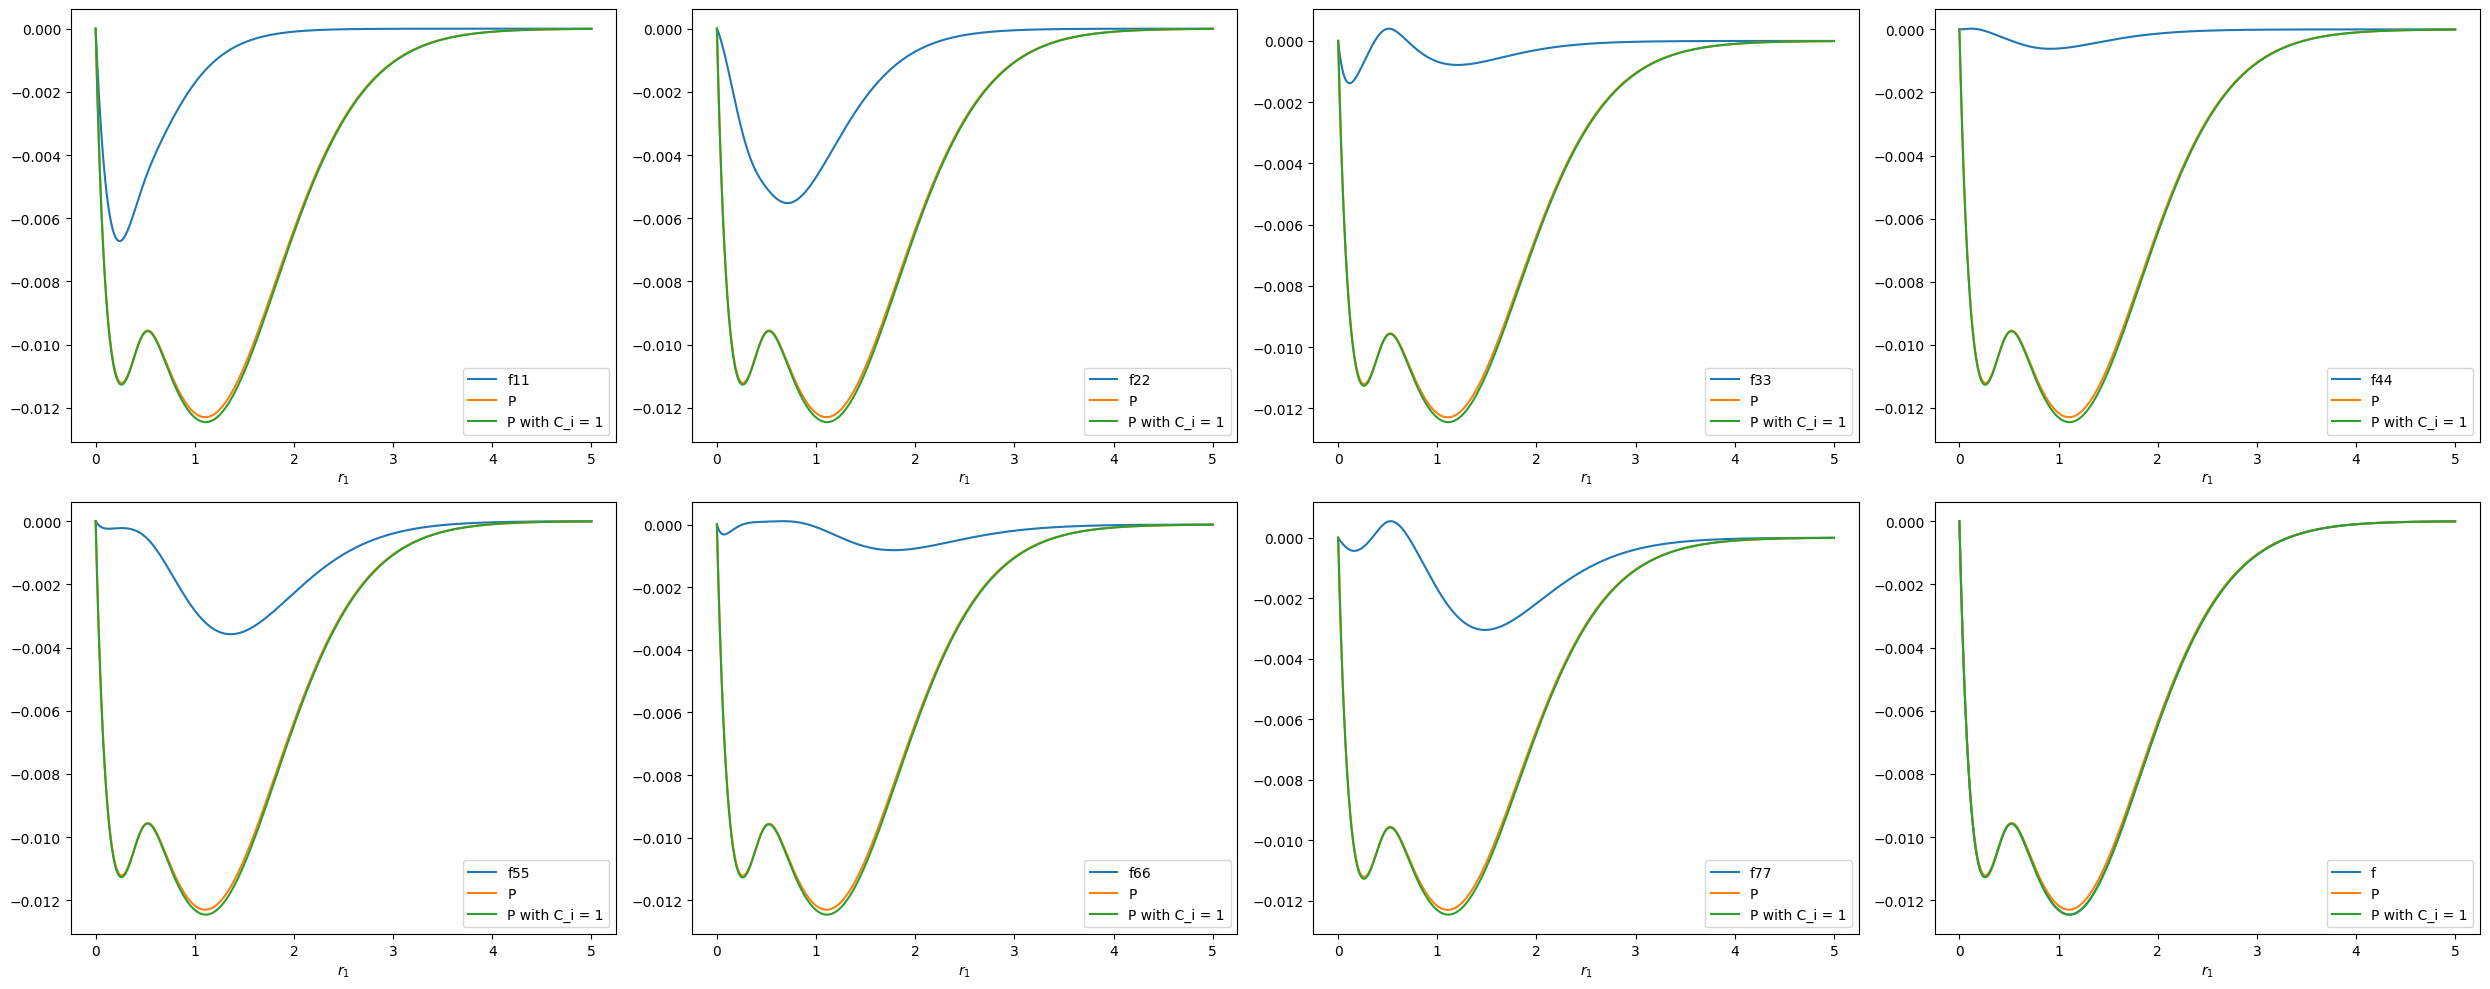

In [42]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p, label='P')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [43]:
f11_over_p = F_11_2d/p
f22_over_p = F_22_2d/p
f33_over_p = F_33_2d/p
f44_over_p = F_44_2d/p
f55_over_p = F_55_2d/p
f66_over_p = F_66_2d/p
f77_over_p = F_77_2d/p
f_over_p = F_2d/p

<ipython-input-43-9f2fa32ca026>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p = F_11_2d/p
<ipython-input-43-9f2fa32ca026>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p = F_22_2d/p
<ipython-input-43-9f2fa32ca026>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p = F_33_2d/p
<ipython-input-43-9f2fa32ca026>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p = F_44_2d/p
<ipython-input-43-9f2fa32ca026>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p = F_55_2d/p
<ipython-input-43-9f2fa32ca026>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p = F_66_2d/p
<ipython-input-43-9f2fa32ca026>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p = F_77_2d/p
<ipython-input-43-9f2fa32ca026>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p = F_2d/p


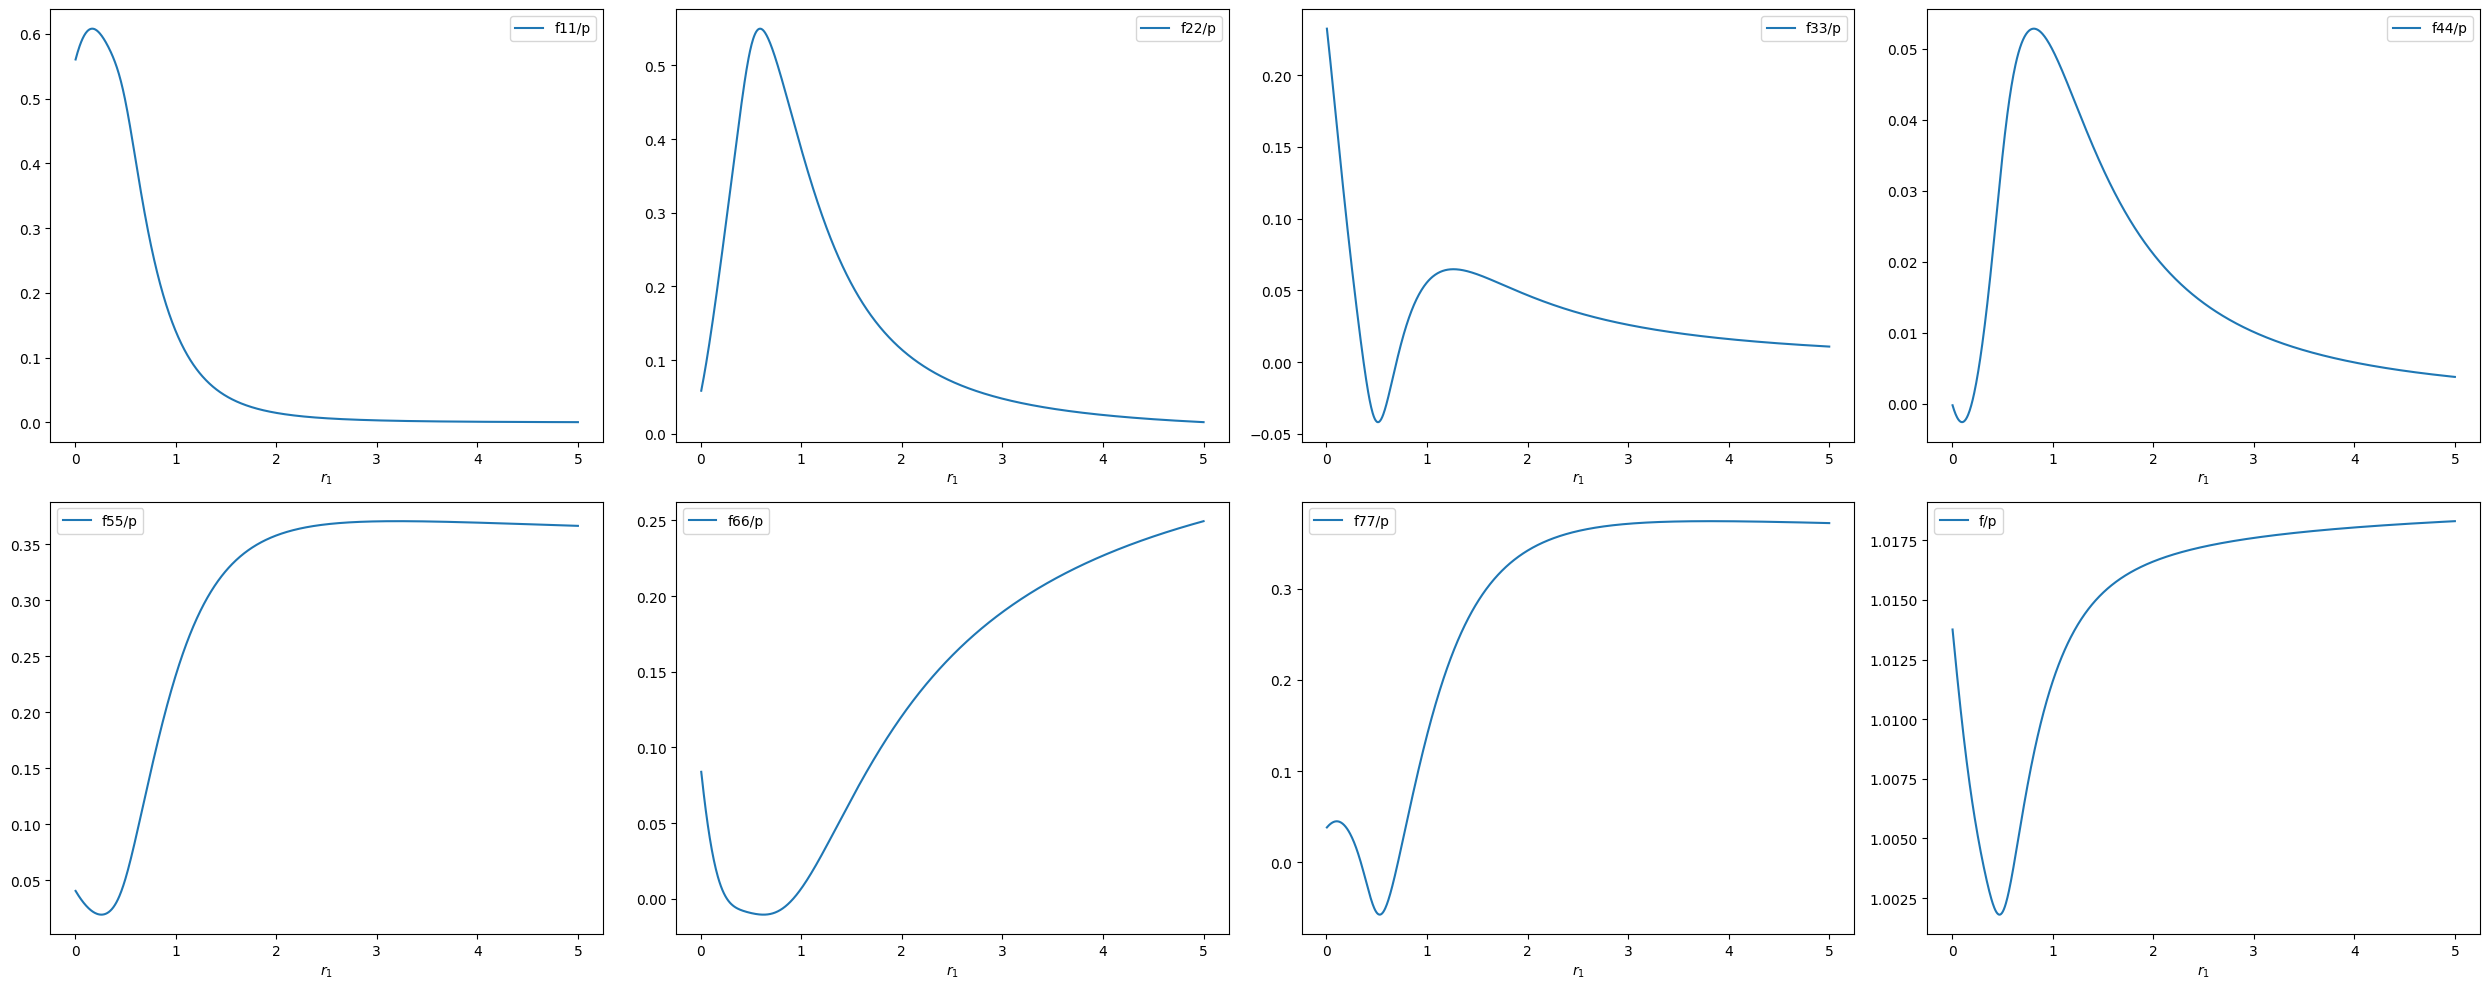

In [44]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p, f22_over_p, f33_over_p, f44_over_p, f55_over_p, f66_over_p, f77_over_p, f_over_p]
titles = ['f11/p', 'f22/p', 'f33/p', 'f44/p', 'f55/p', 'f66/p', 'f77/p', 'f/p']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [45]:
coefficients_1 = tf.Variable(-np.ones(7), dtype = tf.float32)
coefficients_1

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=array([-1., -1., -1., -1., -1., -1., -1.], dtype=float32)>

In [46]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer
# optimizer.build([coefficients])
# Training step
@tf.function
def train_step_1():

    with tf.GradientTape() as tape:

        p_1 = sampling_function(coefficients_1, f)
        loss_1 = variance_loss(f, p_1)

    gradients_1 = tape.gradient(loss_1, [coefficients_1])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_1]
    optimizer.apply_gradients(zip(gradients_1, [coefficients_1]))

    return loss_1

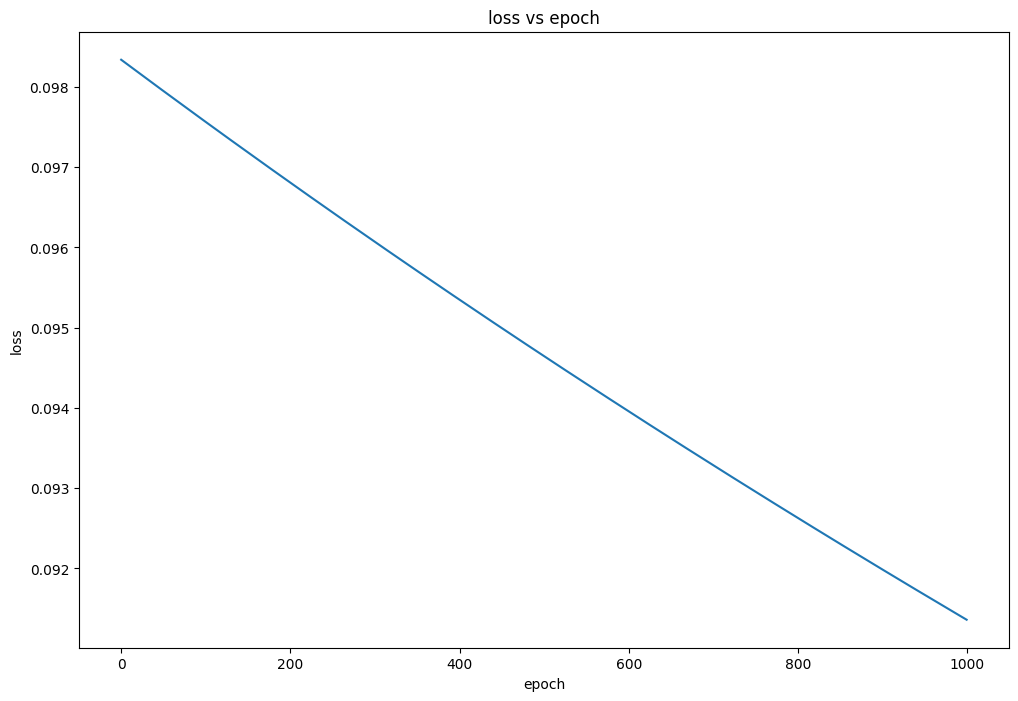

In [47]:
# Training loop
epochs = 1000
loss_list_1 = []
for epoch in range(epochs):
    loss_1 = train_step_1()
    loss_list_1.append(loss_1)

epoch = np.arange(epochs)
loss_1 = np.array(loss_list_1)
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss_1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show()

In [48]:
# Best coefficients
best_coefficients_1 = coefficients_1.numpy()
print("Best coefficients:", best_coefficients_1)

Best coefficients: [-1.0505806 -1.0453444 -1.0059106 -1.003502  -1.0354067 -1.0152258
 -1.0287975]


In [49]:
p_1 = best_coefficients_1[0] * F_11_2d + best_coefficients_1[1] * F_22_2d + best_coefficients_1[2] * F_33_2d + best_coefficients_1[3]  * F_44_2d + best_coefficients_1[4] * F_55_2d + best_coefficients_1[5] * F_66_2d + best_coefficients_1[6] * F_77_2d
p_1 = p_1/np.min(best_coefficients_1)
## An array of 100 elements

In [50]:
# The final optimized coefficients after normalization (that are included in p_1)

coefficients_normalized_1 = best_coefficients_1/np.min(best_coefficients_1)
print("Best coefficients after normalization:", coefficients_normalized_1)

Best coefficients after normalization: [1.         0.99501586 0.95748067 0.95518804 0.98555666 0.96634734
 0.97926563]


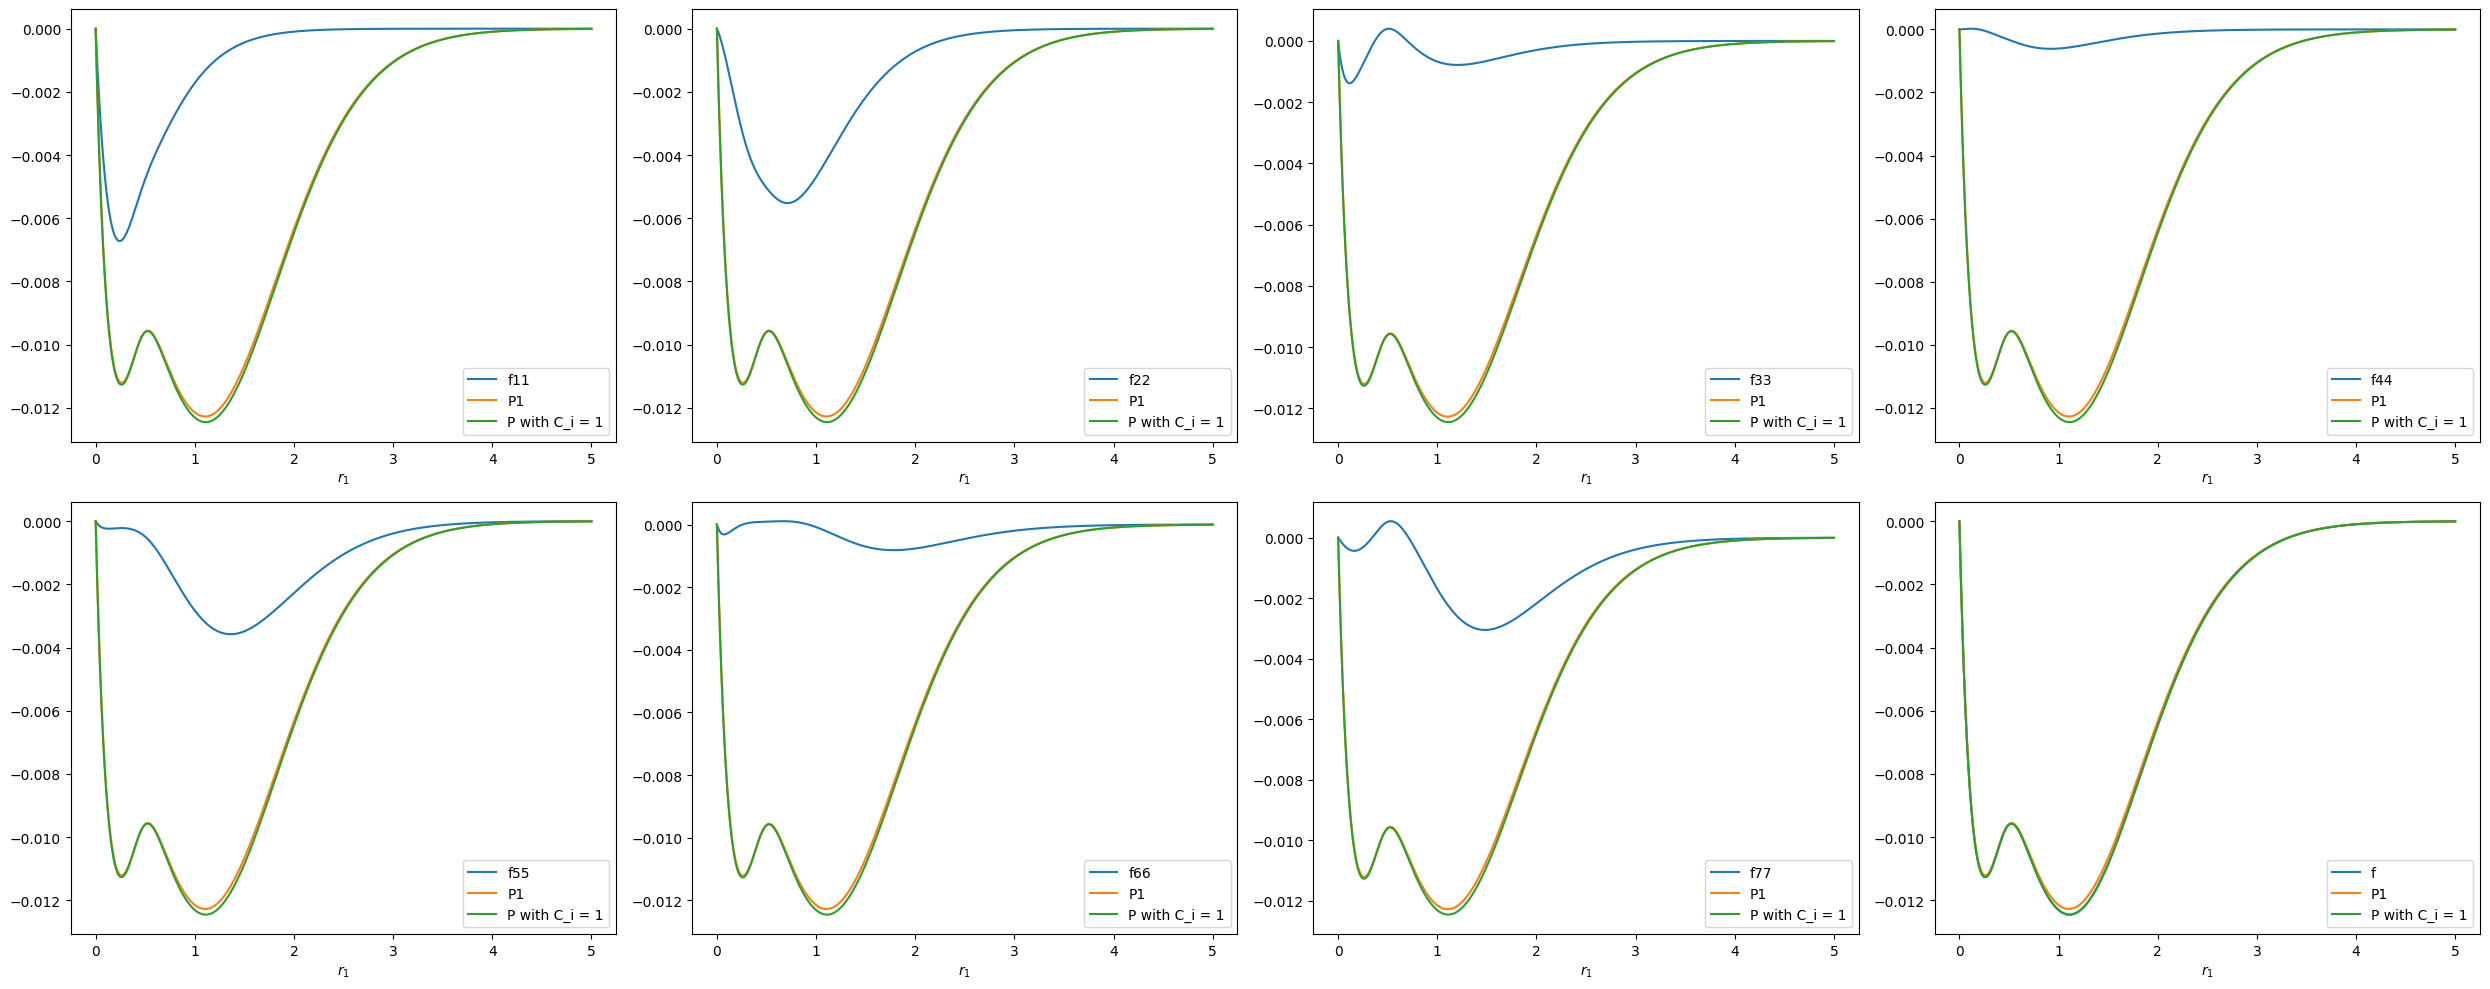

In [51]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_1, label='P1')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [52]:
f11_over_p1 = F_11_2d/p_1
f22_over_p1 = F_22_2d/p_1
f33_over_p1 = F_33_2d/p_1
f44_over_p1 = F_44_2d/p_1
f55_over_p1 = F_55_2d/p_1
f66_over_p1 = F_66_2d/p_1
f77_over_p1 = F_77_2d/p_1
f_over_p1 = F_2d/p_1

<ipython-input-52-c38ed65b6ef7>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p1 = F_11_2d/p_1
<ipython-input-52-c38ed65b6ef7>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p1 = F_22_2d/p_1
<ipython-input-52-c38ed65b6ef7>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p1 = F_33_2d/p_1
<ipython-input-52-c38ed65b6ef7>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p1 = F_44_2d/p_1
<ipython-input-52-c38ed65b6ef7>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p1 = F_55_2d/p_1
<ipython-input-52-c38ed65b6ef7>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p1 = F_66_2d/p_1
<ipython-input-52-c38ed65b6ef7>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p1 = F_77_2d/p_1
<ipython-input-52-c38ed65b6ef7>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p1 = F_2d/p_1


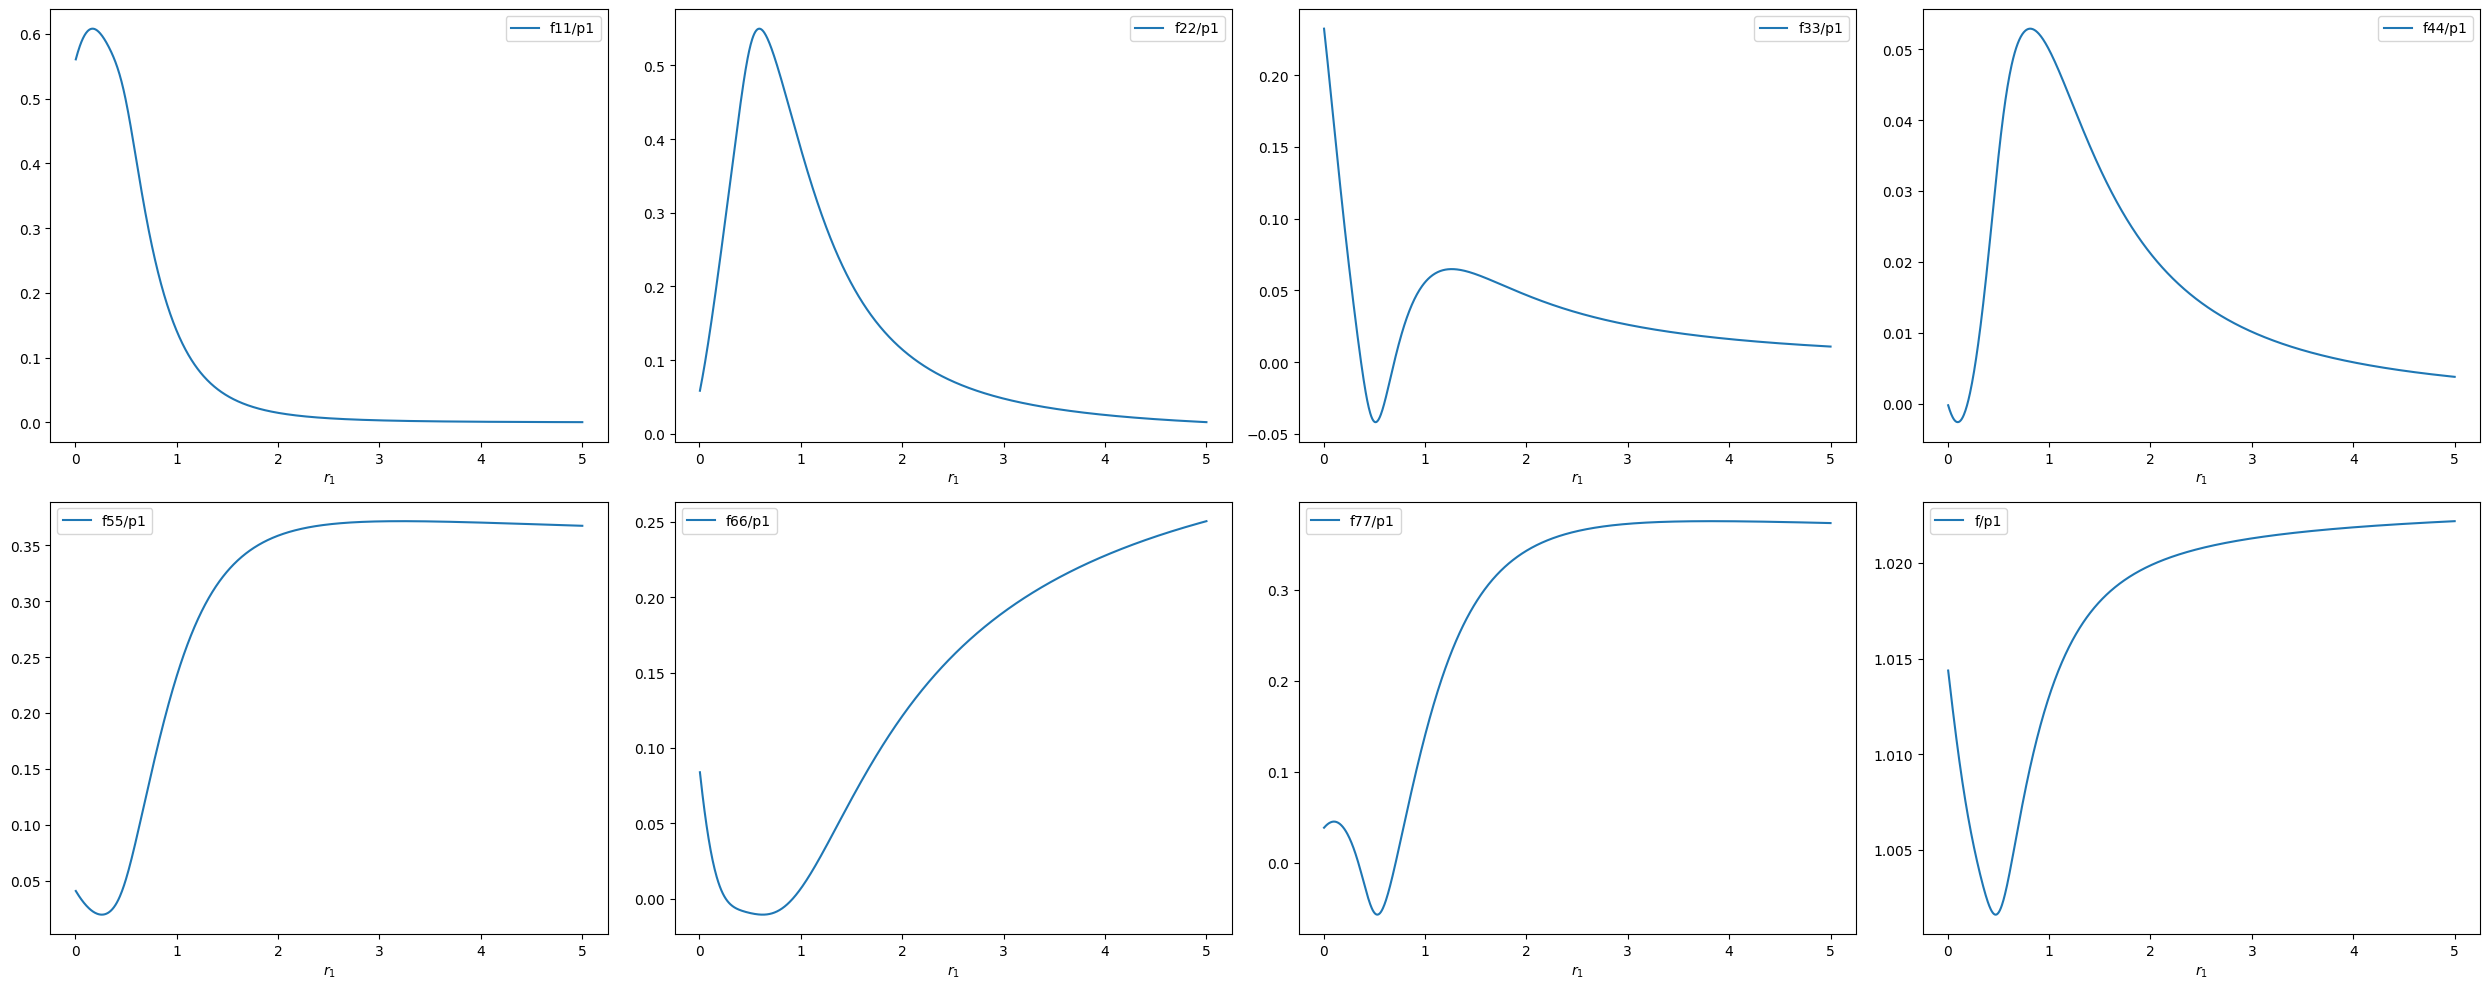

In [53]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p1, f22_over_p1, f33_over_p1, f44_over_p1, f55_over_p1, f66_over_p1, f77_over_p1, f_over_p1]
titles = ['f11/p1', 'f22/p1', 'f33/p1', 'f44/p1', 'f55/p1', 'f66/p1', 'f77/p1', 'f/p1']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [54]:
# coefficients_2 = tf.Variable(np.random.uniform(-1, 1, size=(7,)), dtype=tf.float32)
coefficients_2 = tf.Variable(([0.146807,-0.94657326,0.84620285,0.63871884,0.2678612,-0.63104206,0.84403706]), dtype=tf.float32)
coefficients_2 # Random coefficients between -1 to 1

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([ 0.146807  , -0.94657326,  0.84620285,  0.63871884,  0.2678612 ,
       -0.63104206,  0.84403706], dtype=float32)>

In [55]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_2():

    with tf.GradientTape() as tape:

        p_2 = sampling_function(coefficients_2, f)
        loss_2 = variance_loss(f, p_2)

    gradients_2 = tape.gradient(loss_2, [coefficients_2])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_2]
    optimizer.apply_gradients(zip(gradients_2, [coefficients_2]))

    return loss_2

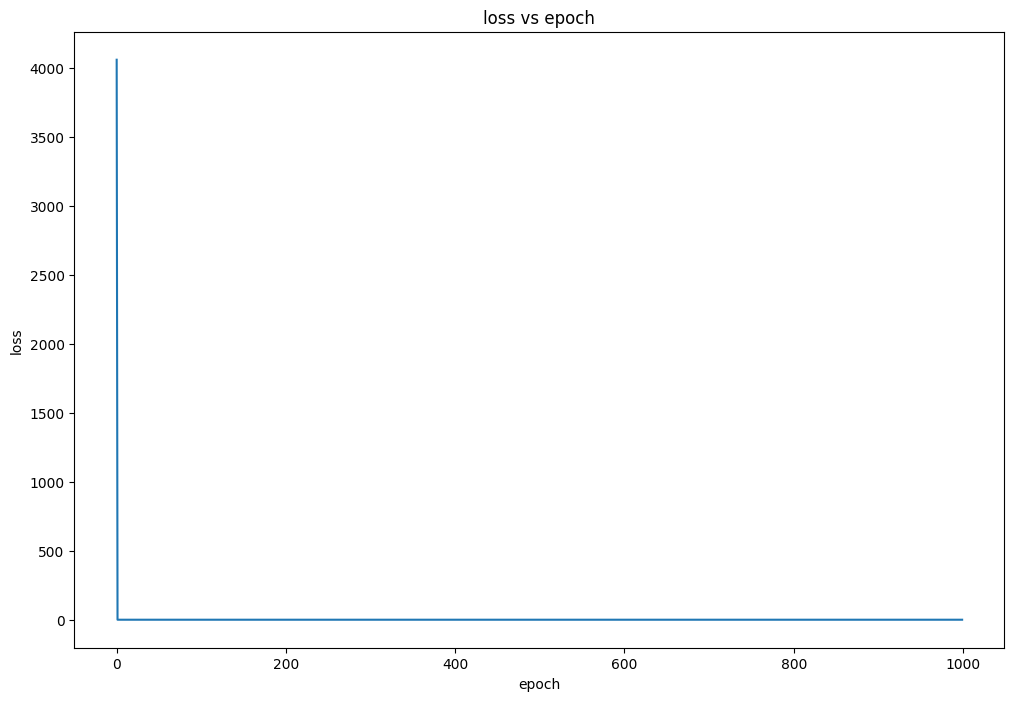

In [56]:
# Training loop
epochs = 1000
loss_list_2 = []
for epoch in range(epochs):
    loss_2 = train_step_2()
    loss_list_2.append(loss_2)

epoch = np.arange(epochs)
loss_2 = np.array(loss_list_2)
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss_2)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show()      ## This graph indicates high learning rate

In [57]:
# Best coefficients
best_coefficients_2 = coefficients_2.numpy()
print("Best coefficients:", best_coefficients_2)

Best coefficients: [-4484.452   -7109.9214  -1608.9427   -854.38306 -5008.5776   -403.9195
 -3635.335  ]


In [58]:
p_2 = best_coefficients_2[0] * F_11_2d + best_coefficients_2[1] * F_22_2d + best_coefficients_2[2] * F_33_2d + best_coefficients_2[3]  * F_44_2d + best_coefficients_2[4] * F_55_2d + best_coefficients_2[5] * F_66_2d + best_coefficients_2[6] * F_77_2d
p_2 = p_2/np.min(best_coefficients_2)
## An array of 100 elements

In [59]:
# The final optimized coefficients after normalization (that are included in p_2)

coefficients_normalized_2 = best_coefficients_2/np.min(best_coefficients_2)
print("Best coefficients after normalization:", coefficients_normalized_2)

Best coefficients after normalization: [0.6307316  1.         0.22629544 0.12016772 0.7044491  0.05681068
 0.5113045 ]


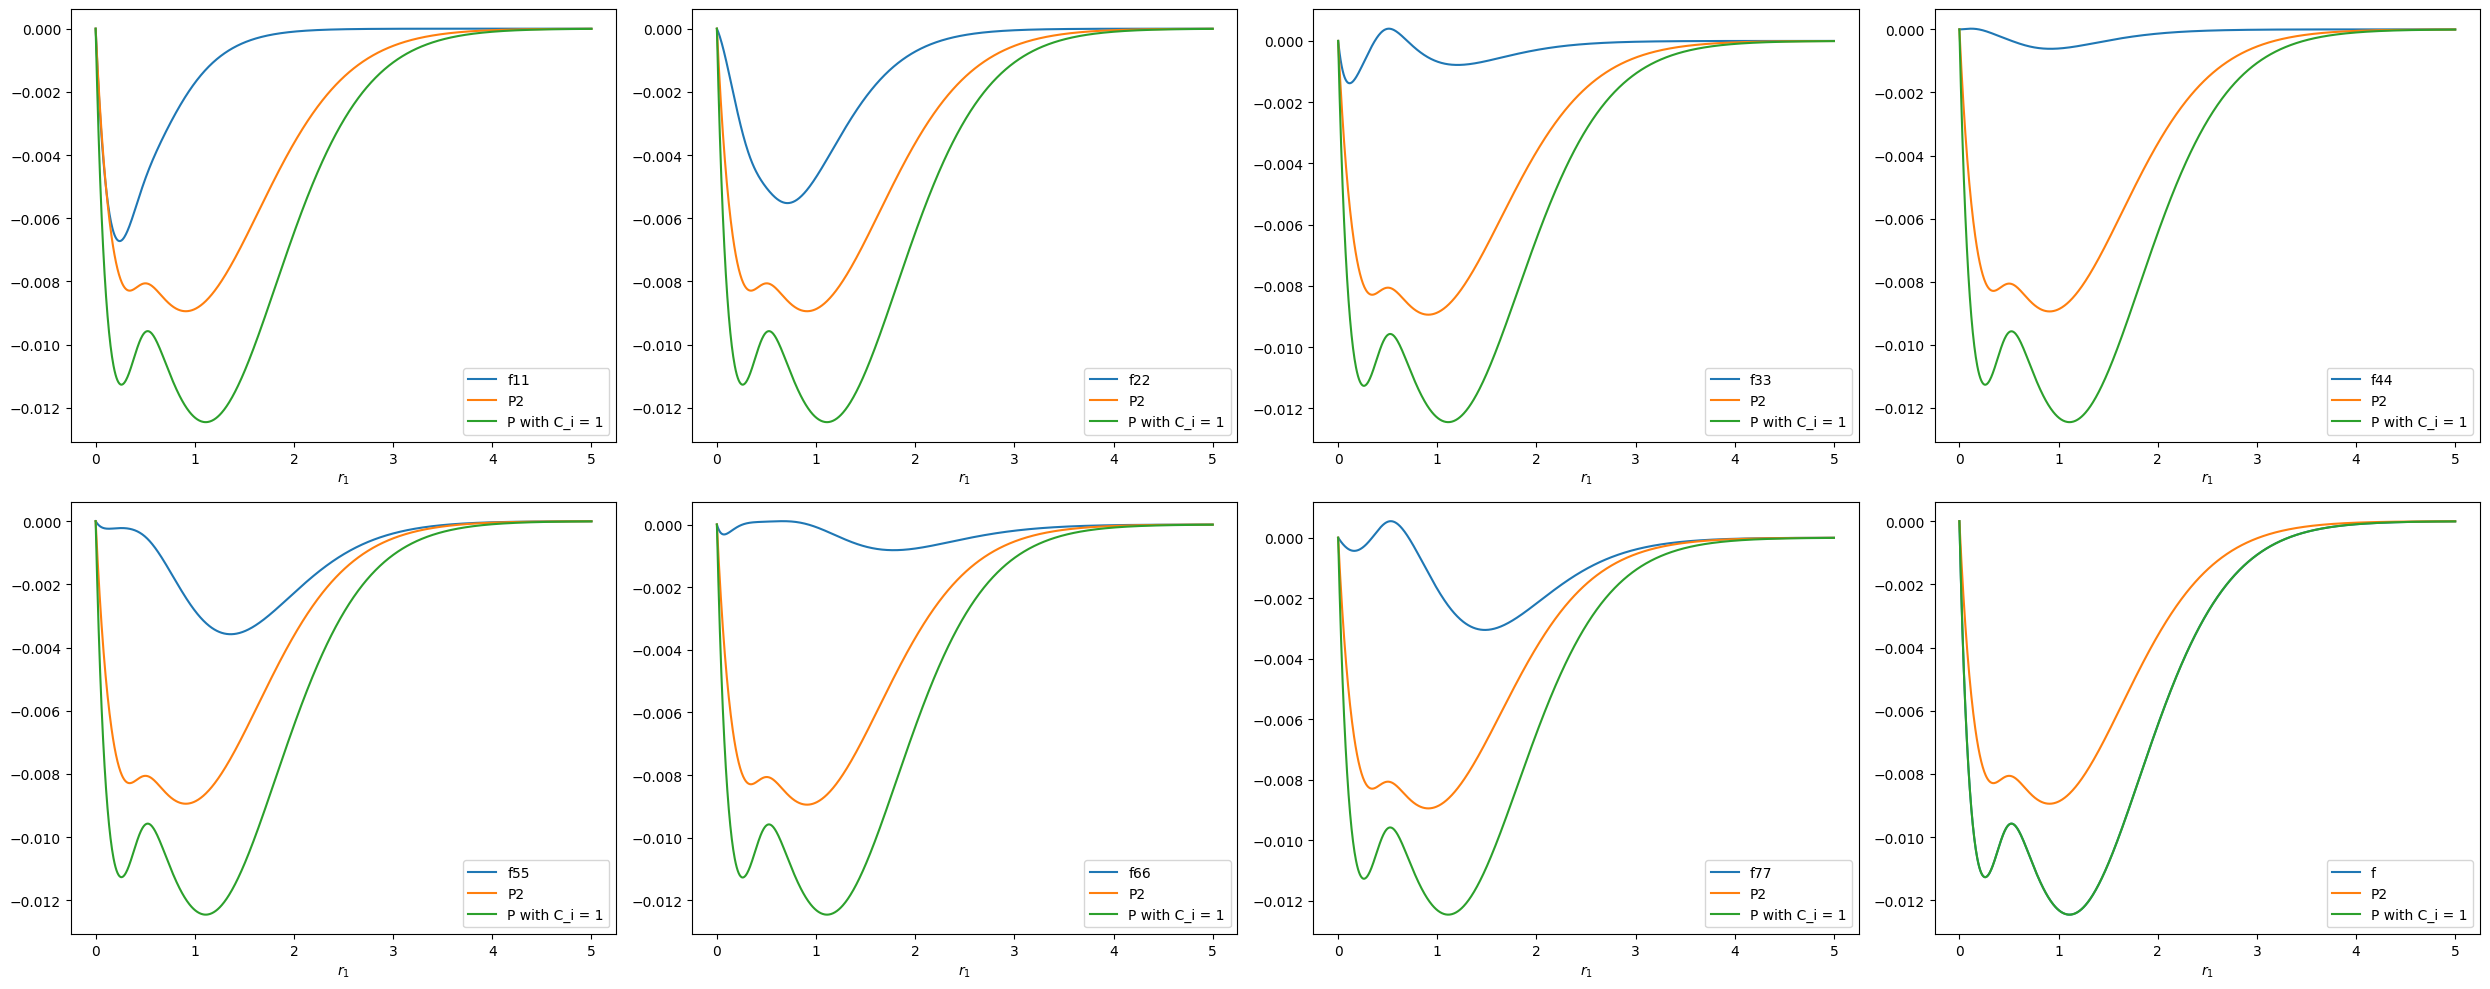

In [60]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_2, label='P2')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [61]:
f11_over_p2 = F_11_2d/p_2
f22_over_p2 = F_22_2d/p_2
f33_over_p2 = F_33_2d/p_2
f44_over_p2 = F_44_2d/p_2
f55_over_p2 = F_55_2d/p_2
f66_over_p2 = F_66_2d/p_2
f77_over_p2 = F_77_2d/p_2
f_over_p2 = F_2d/p_2

<ipython-input-61-fa2ee0e48d39>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p2 = F_11_2d/p_2
<ipython-input-61-fa2ee0e48d39>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p2 = F_22_2d/p_2
<ipython-input-61-fa2ee0e48d39>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p2 = F_33_2d/p_2
<ipython-input-61-fa2ee0e48d39>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p2 = F_44_2d/p_2
<ipython-input-61-fa2ee0e48d39>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p2 = F_55_2d/p_2
<ipython-input-61-fa2ee0e48d39>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p2 = F_66_2d/p_2
<ipython-input-61-fa2ee0e48d39>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p2 = F_77_2d/p_2
<ipython-input-61-fa2ee0e48d39>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p2 = F_2d/p_2


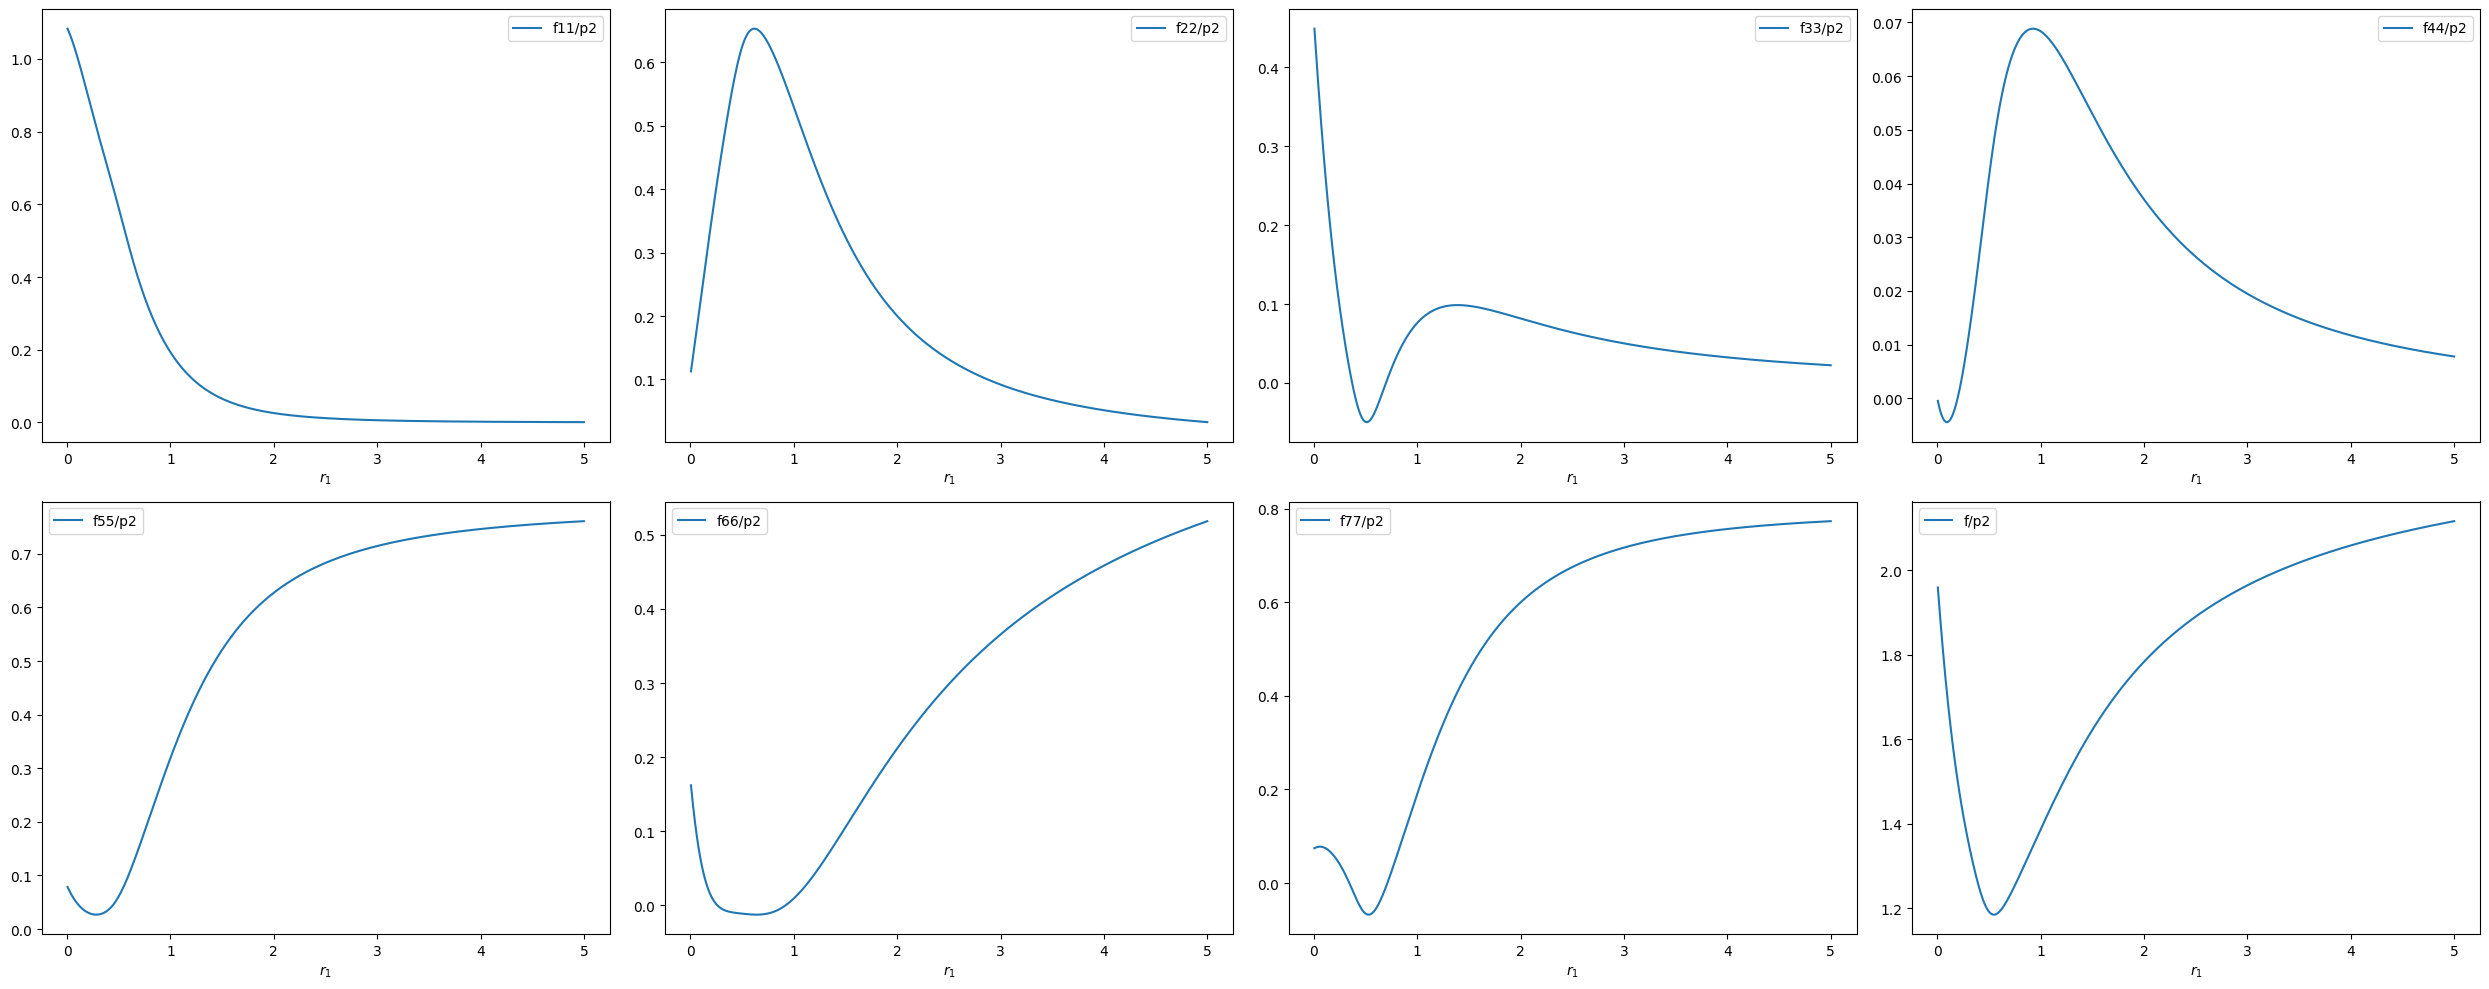

In [62]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p2, f22_over_p2, f33_over_p2, f44_over_p2, f55_over_p2, f66_over_p2, f77_over_p2, f_over_p2]
titles = ['f11/p2', 'f22/p2', 'f33/p2', 'f44/p2', 'f55/p2', 'f66/p2', 'f77/p2', 'f/p2']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [63]:
# coefficients_3 = tf.Variable(np.random.uniform(0.99, 1, size=(7,)), dtype=tf.float32)
coefficients_3 = tf.Variable(([0.9999949,0.99827474,0.999502,0.9912639,0.9921392,0.99232656, 0.9975646 ]), dtype=tf.float32)
coefficients_3 # The coefficients chosen are all very close to 1

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([0.9999949 , 0.99827474, 0.999502  , 0.9912639 , 0.9921392 ,
       0.99232656, 0.9975646 ], dtype=float32)>

In [64]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_3():

    with tf.GradientTape() as tape:

        p_3 = sampling_function(coefficients_3, f)
        loss_3 = variance_loss(f, p_3)

    gradients_3 = tape.gradient(loss_3, [coefficients_3])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_3]
    optimizer.apply_gradients(zip(gradients_3, [coefficients_3]))

    return loss_3

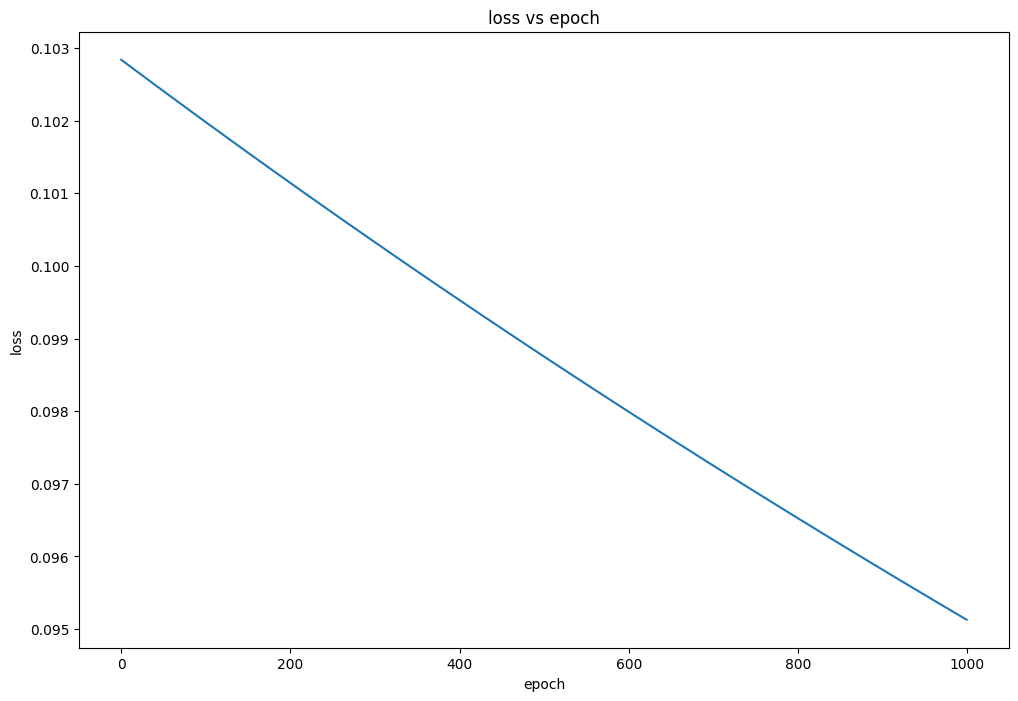

In [65]:
# Training loop
epochs = 1000
loss_list_3 = []
for epoch in range(epochs):
    loss_3 = train_step_3()
    loss_list_3.append(loss_3)

epoch = np.arange(epochs)
loss_3 = np.array(loss_list_3)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss_3)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show()  ## This graph indicates high learning rate

In [66]:
# Best coefficients
best_coefficients_3 = coefficients_3.numpy()
print("Best coefficients:", best_coefficients_3)

Best coefficients: [1.0505402 1.0433515 1.0053934 0.9947314 1.0320971 1.0111214 1.0310986]


In [67]:
p_3 = best_coefficients_3[0] * F_11_2d + best_coefficients_3[1] * F_22_2d + best_coefficients_3[2] * F_33_2d + best_coefficients_3[3]  * F_44_2d + best_coefficients_3[4] * F_55_2d + best_coefficients_3[5] * F_66_2d + best_coefficients_3[6] * F_77_2d
p_3 = p_3/np.max(best_coefficients_3)
## An array of 100 elements

In [68]:
# The final optimized coefficients after normalization (that are included in p_3)

coefficients_normalized_3 = best_coefficients_3/np.max(best_coefficients_3)
## An array of 100 elements
print("Best coefficients after normalization:", coefficients_normalized_3)

Best coefficients after normalization: [1.         0.99315715 0.9570251  0.9468761  0.98244417 0.96247756
 0.9814937 ]


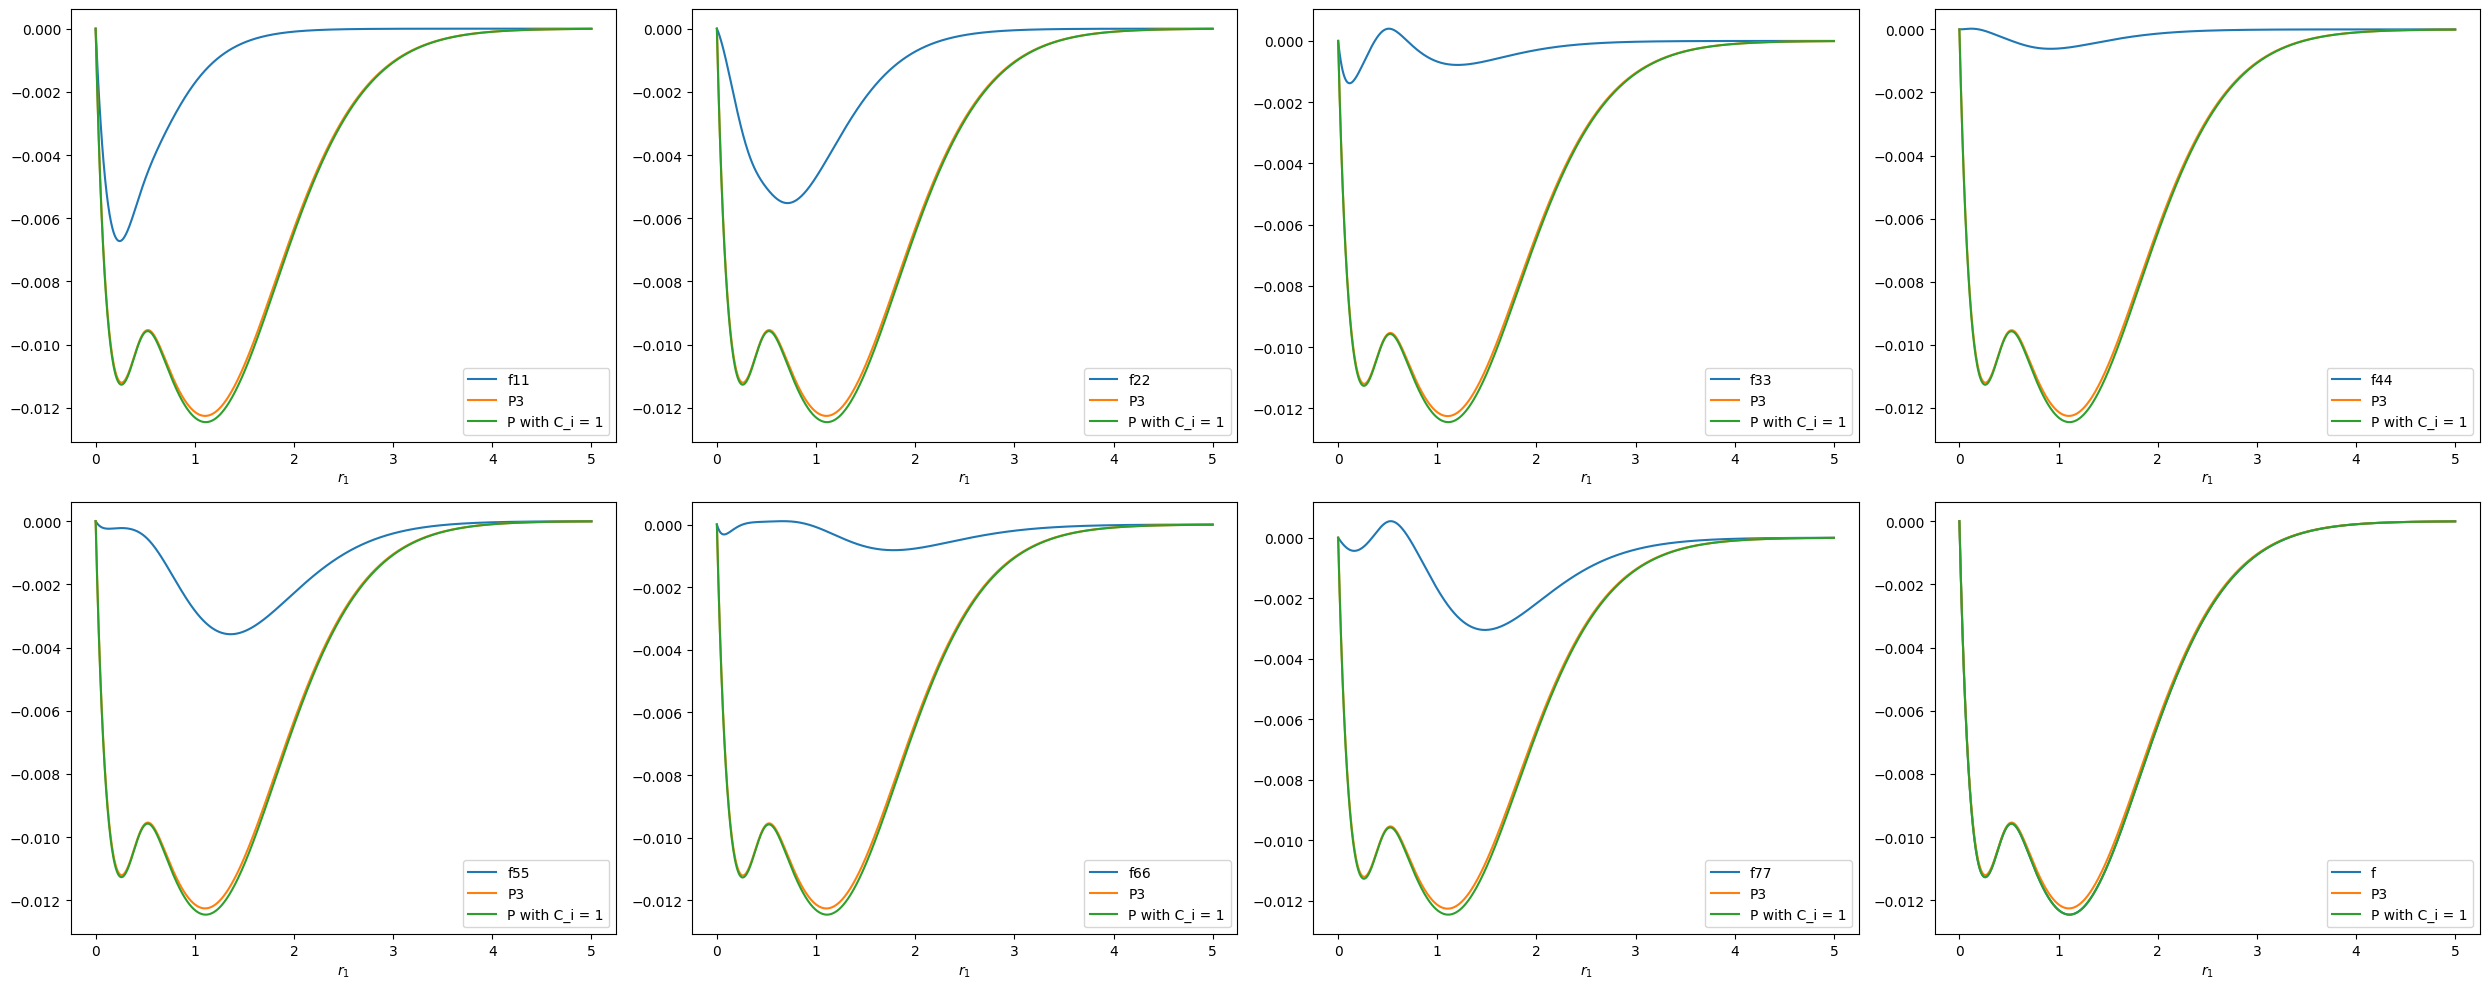

In [69]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_3, label='P3')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [70]:
f11_over_p3 = F_11_2d/p_3
f22_over_p3 = F_22_2d/p_3
f33_over_p3 = F_33_2d/p_3
f44_over_p3 = F_44_2d/p_3
f55_over_p3 = F_55_2d/p_3
f66_over_p3 = F_66_2d/p_3
f77_over_p3 = F_77_2d/p_3
f_over_p3 = F_2d/p_3

<ipython-input-70-e151a3f9b41e>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p3 = F_11_2d/p_3
<ipython-input-70-e151a3f9b41e>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p3 = F_22_2d/p_3
<ipython-input-70-e151a3f9b41e>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p3 = F_33_2d/p_3
<ipython-input-70-e151a3f9b41e>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p3 = F_44_2d/p_3
<ipython-input-70-e151a3f9b41e>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p3 = F_55_2d/p_3
<ipython-input-70-e151a3f9b41e>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p3 = F_66_2d/p_3
<ipython-input-70-e151a3f9b41e>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p3 = F_77_2d/p_3
<ipython-input-70-e151a3f9b41e>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p3 = F_2d/p_3


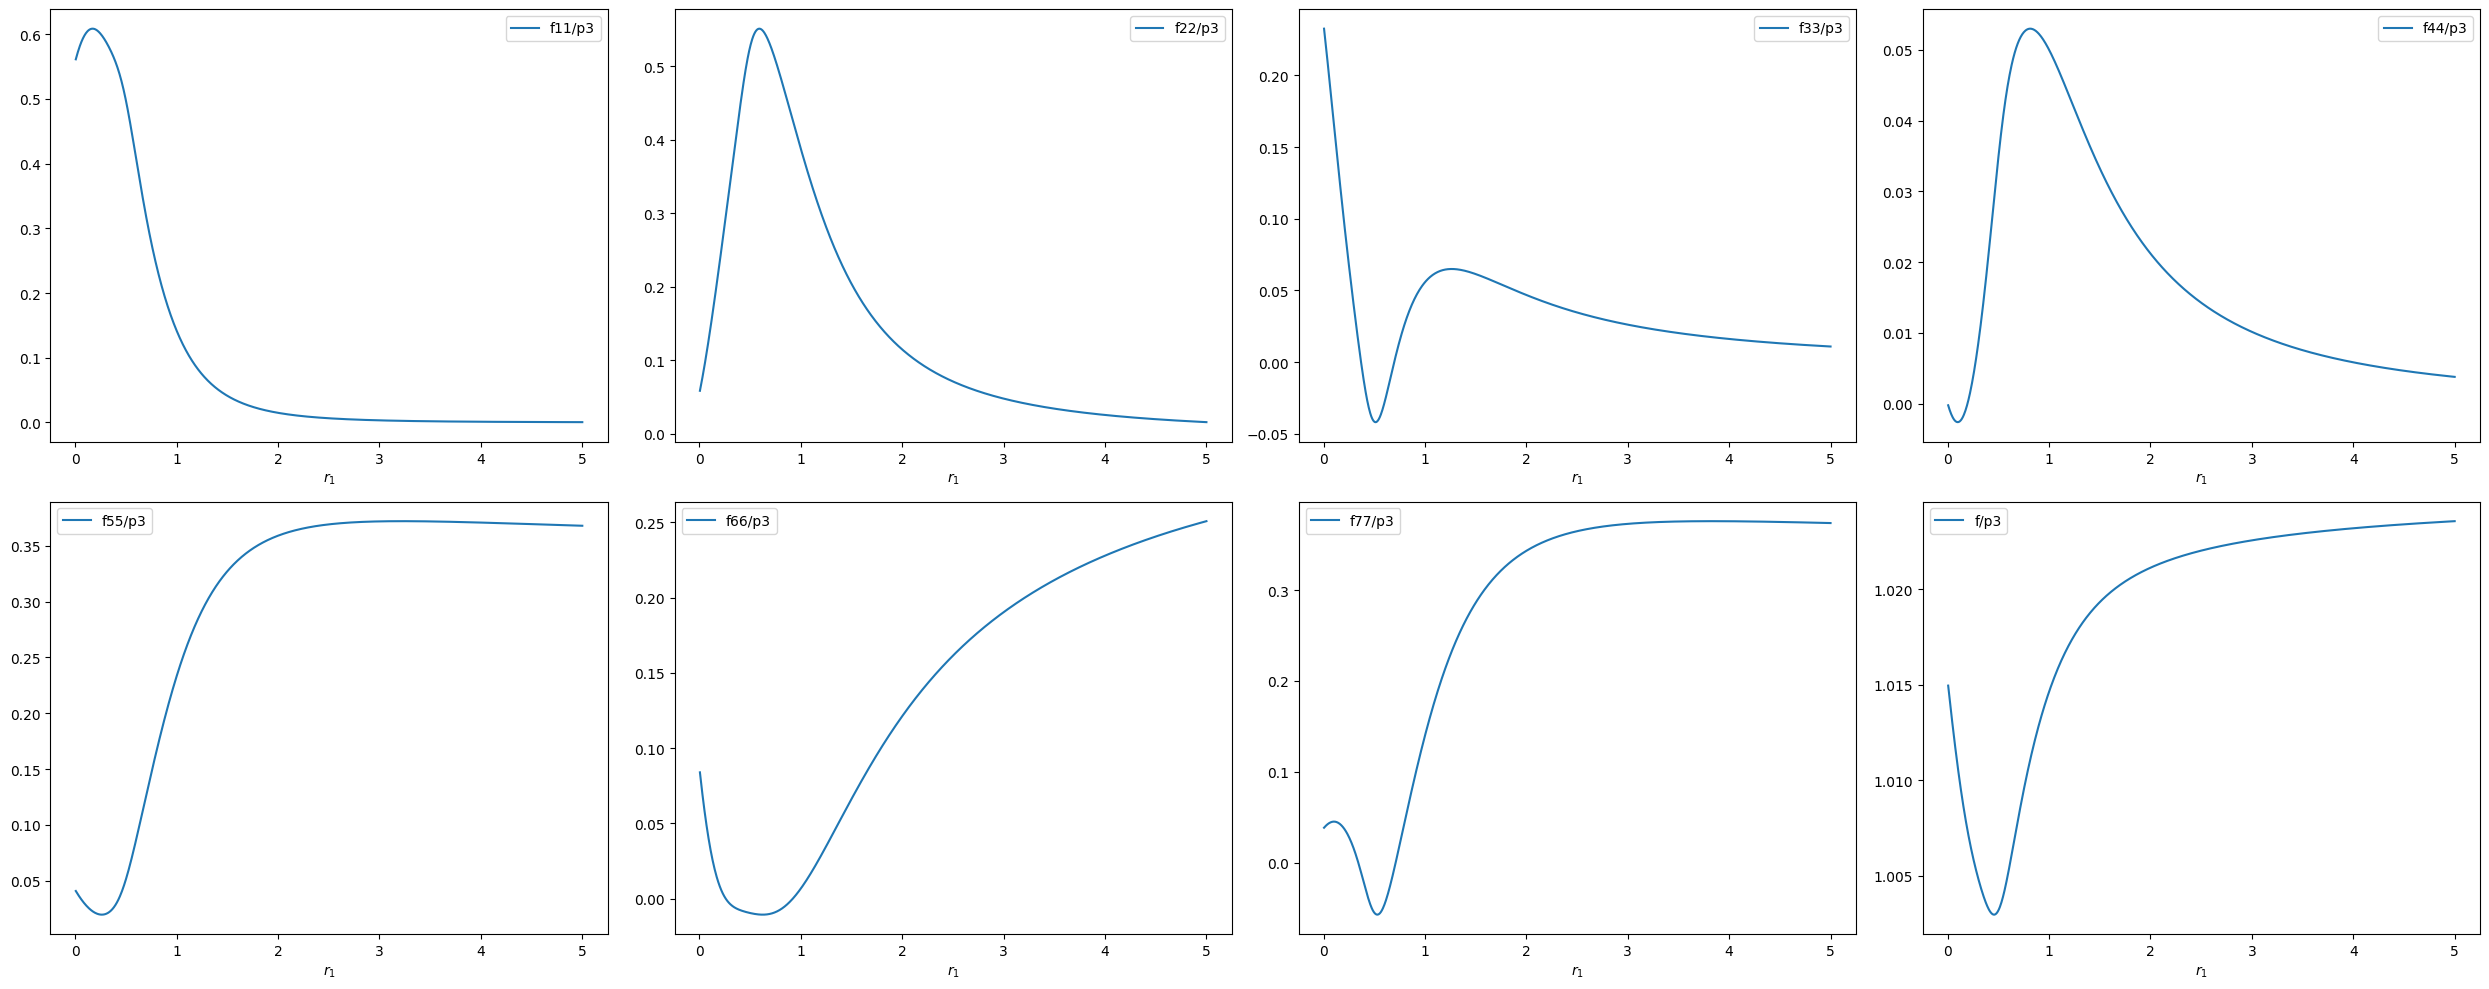

In [71]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p3, f22_over_p3, f33_over_p3, f44_over_p3, f55_over_p3, f66_over_p3, f77_over_p3, f_over_p3]
titles = ['f11/p3', 'f22/p3', 'f33/p3', 'f44/p3', 'f55/p3', 'f66/p3', 'f77/p3', 'f/p3']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [72]:
# coefficients_4 = tf.Variable(np.random.uniform(-1, -0.99, size=(7,)), dtype=tf.float32)
coefficients_4 = tf.Variable(([-0.9924467,-0.99632615,-0.99968684,-0.9968151,-0.9970218,-0.9980759,-0.99841034]), dtype=tf.float32)
coefficients_4  # The coefficients chosen are all very close to -1

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([-0.9924467 , -0.99632615, -0.99968684, -0.9968151 , -0.9970218 ,
       -0.9980759 , -0.99841034], dtype=float32)>

In [73]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_4():

    with tf.GradientTape() as tape:

        p_4 = sampling_function(coefficients_4, f)
        loss_4 = variance_loss(f, p_4)

    gradients_4 = tape.gradient(loss_4, [coefficients_4])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_4]
    optimizer.apply_gradients(zip(gradients_4, [coefficients_4]))

    return loss_4

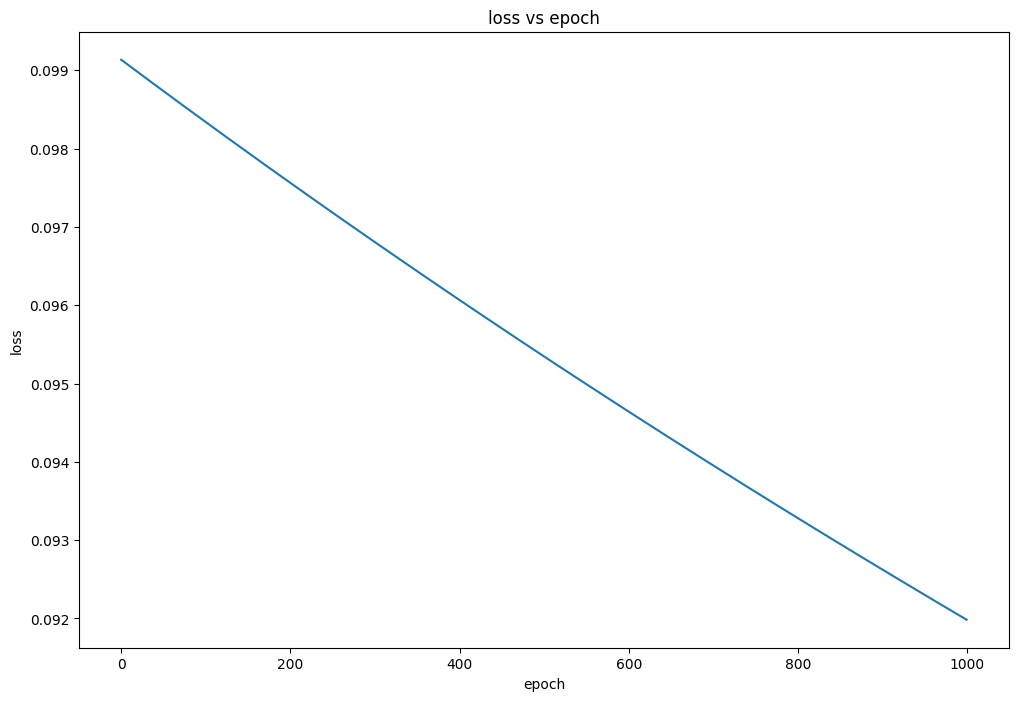

In [74]:
# Training loop
epochs = 1000
loss_list_4 = []
for epoch in range(epochs):
    loss_4 = train_step_4()
    loss_list_4.append(loss_4)


epoch = np.arange(epochs)
loss_4 = np.array(loss_list_4)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss_4)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show()

In [75]:
# Best coefficients
best_coefficients_4 = coefficients_4.numpy()
print("Best coefficients:", best_coefficients_4)

Best coefficients: [-1.0438141 -1.0423235 -1.0056677 -1.0003585 -1.0326899 -1.0133896
 -1.0273744]


In [76]:
p_4 = best_coefficients_4[0] * F_11_2d + best_coefficients_4[1] * F_22_2d + best_coefficients_4[2] * F_33_2d + best_coefficients_4[3]  * F_44_2d + best_coefficients_4[4] * F_55_2d + best_coefficients_4[5] * F_66_2d + best_coefficients_4[6] * F_77_2d
p_4 = p_4/np.min(best_coefficients_4)
## An array of 100 elements

In [77]:
# The final optimized coefficients after normalization (that are included in p_4)

coefficients_normalized_4 = best_coefficients_4/np.min(best_coefficients_4)
print("Best coefficients after normalization:", coefficients_normalized_4)

Best coefficients after normalization: [1.         0.998572   0.96345484 0.9583684  0.9893428  0.9708526
 0.98425037]


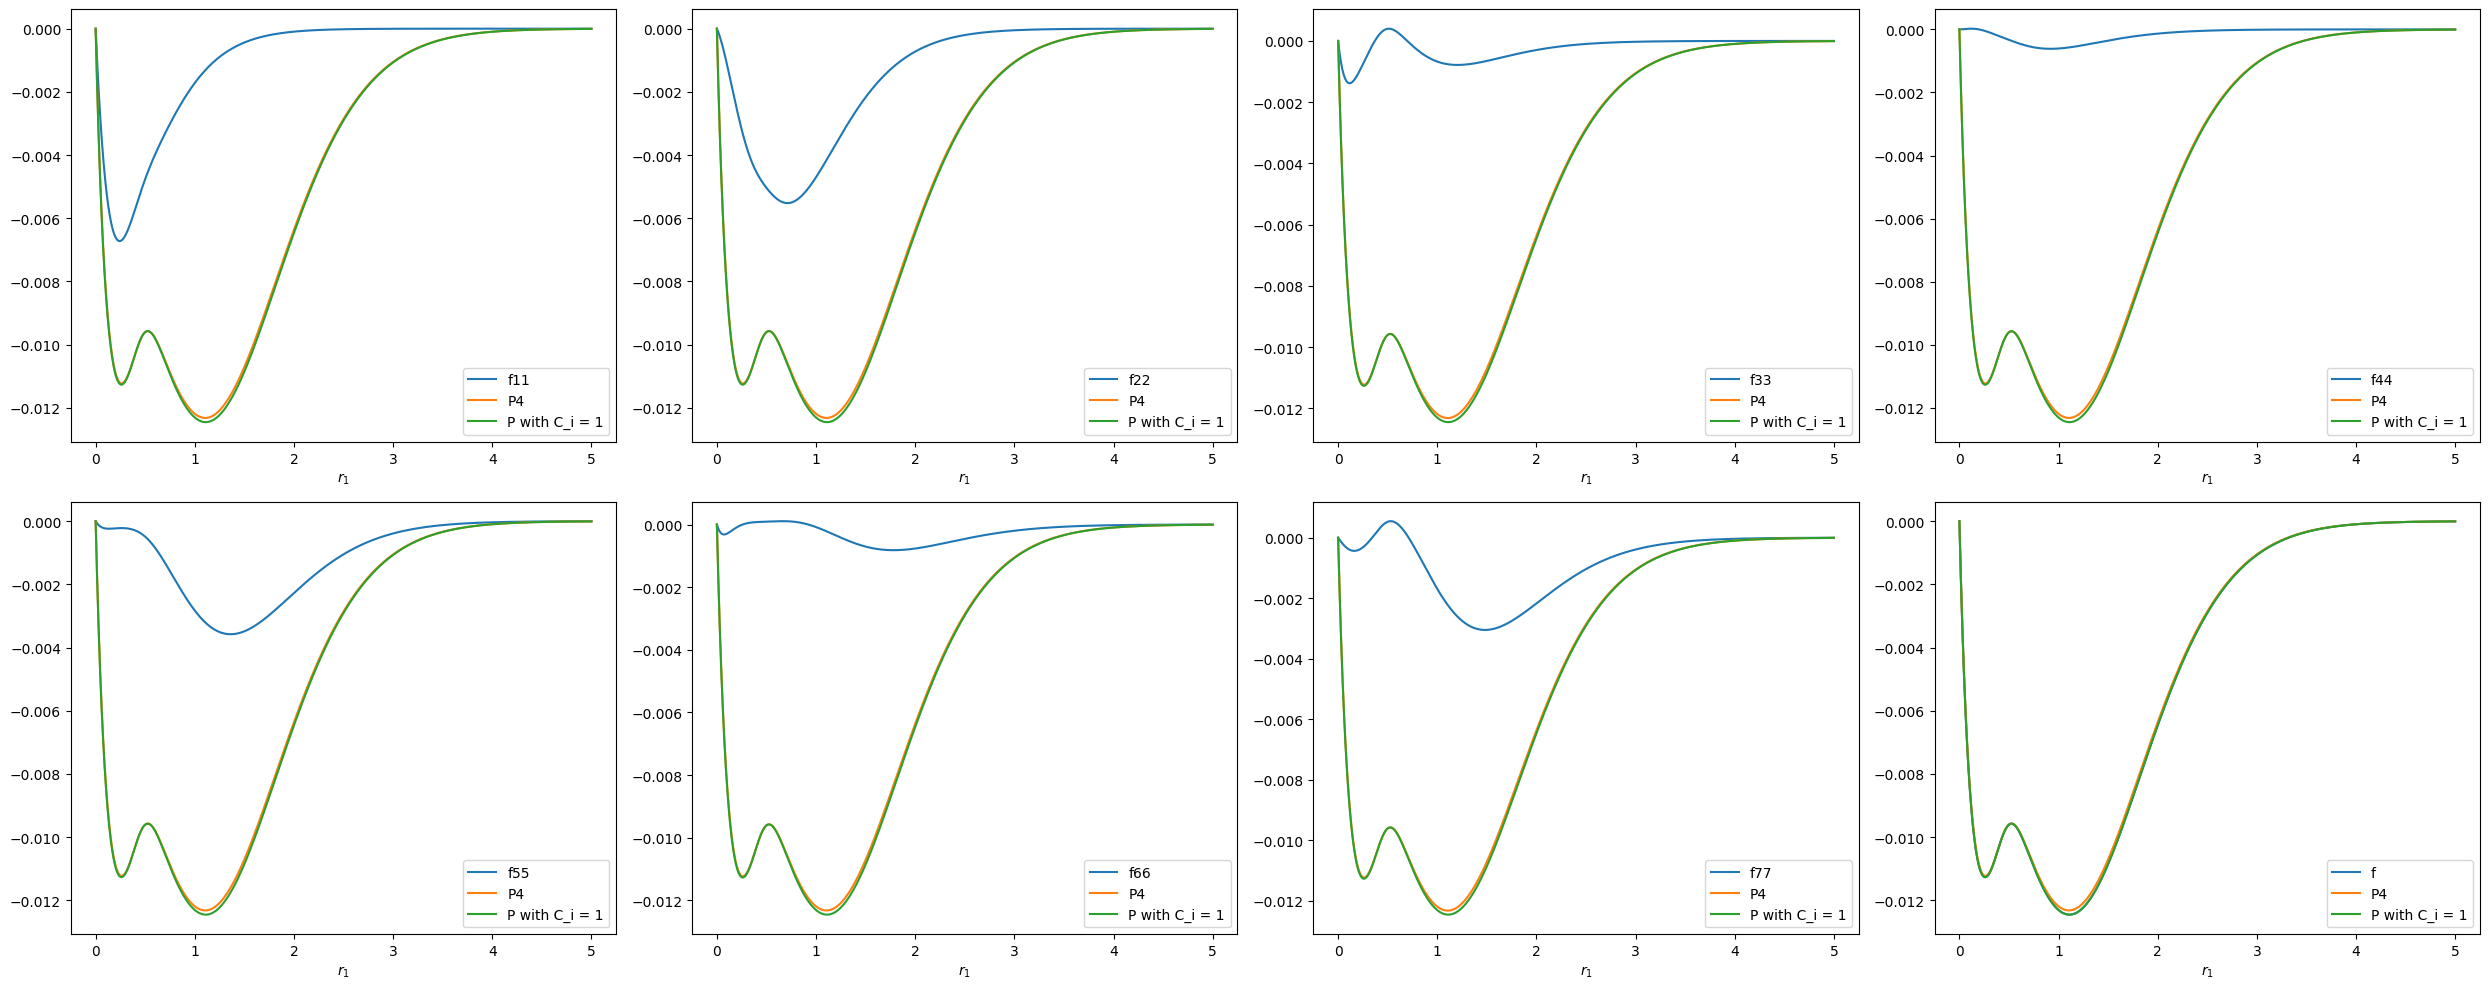

In [78]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_4, label='P4')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [79]:
f11_over_p4 = F_11_2d/p_4
f22_over_p4 = F_22_2d/p_4
f33_over_p4 = F_33_2d/p_4
f44_over_p4 = F_44_2d/p_4
f55_over_p4 = F_55_2d/p_4
f66_over_p4 = F_66_2d/p_4
f77_over_p4 = F_77_2d/p_4
f_over_p4 = F_2d/p_4

<ipython-input-79-4c95b8a9003b>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p4 = F_11_2d/p_4
<ipython-input-79-4c95b8a9003b>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p4 = F_22_2d/p_4
<ipython-input-79-4c95b8a9003b>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p4 = F_33_2d/p_4
<ipython-input-79-4c95b8a9003b>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p4 = F_44_2d/p_4
<ipython-input-79-4c95b8a9003b>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p4 = F_55_2d/p_4
<ipython-input-79-4c95b8a9003b>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p4 = F_66_2d/p_4
<ipython-input-79-4c95b8a9003b>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p4 = F_77_2d/p_4
<ipython-input-79-4c95b8a9003b>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p4 = F_2d/p_4


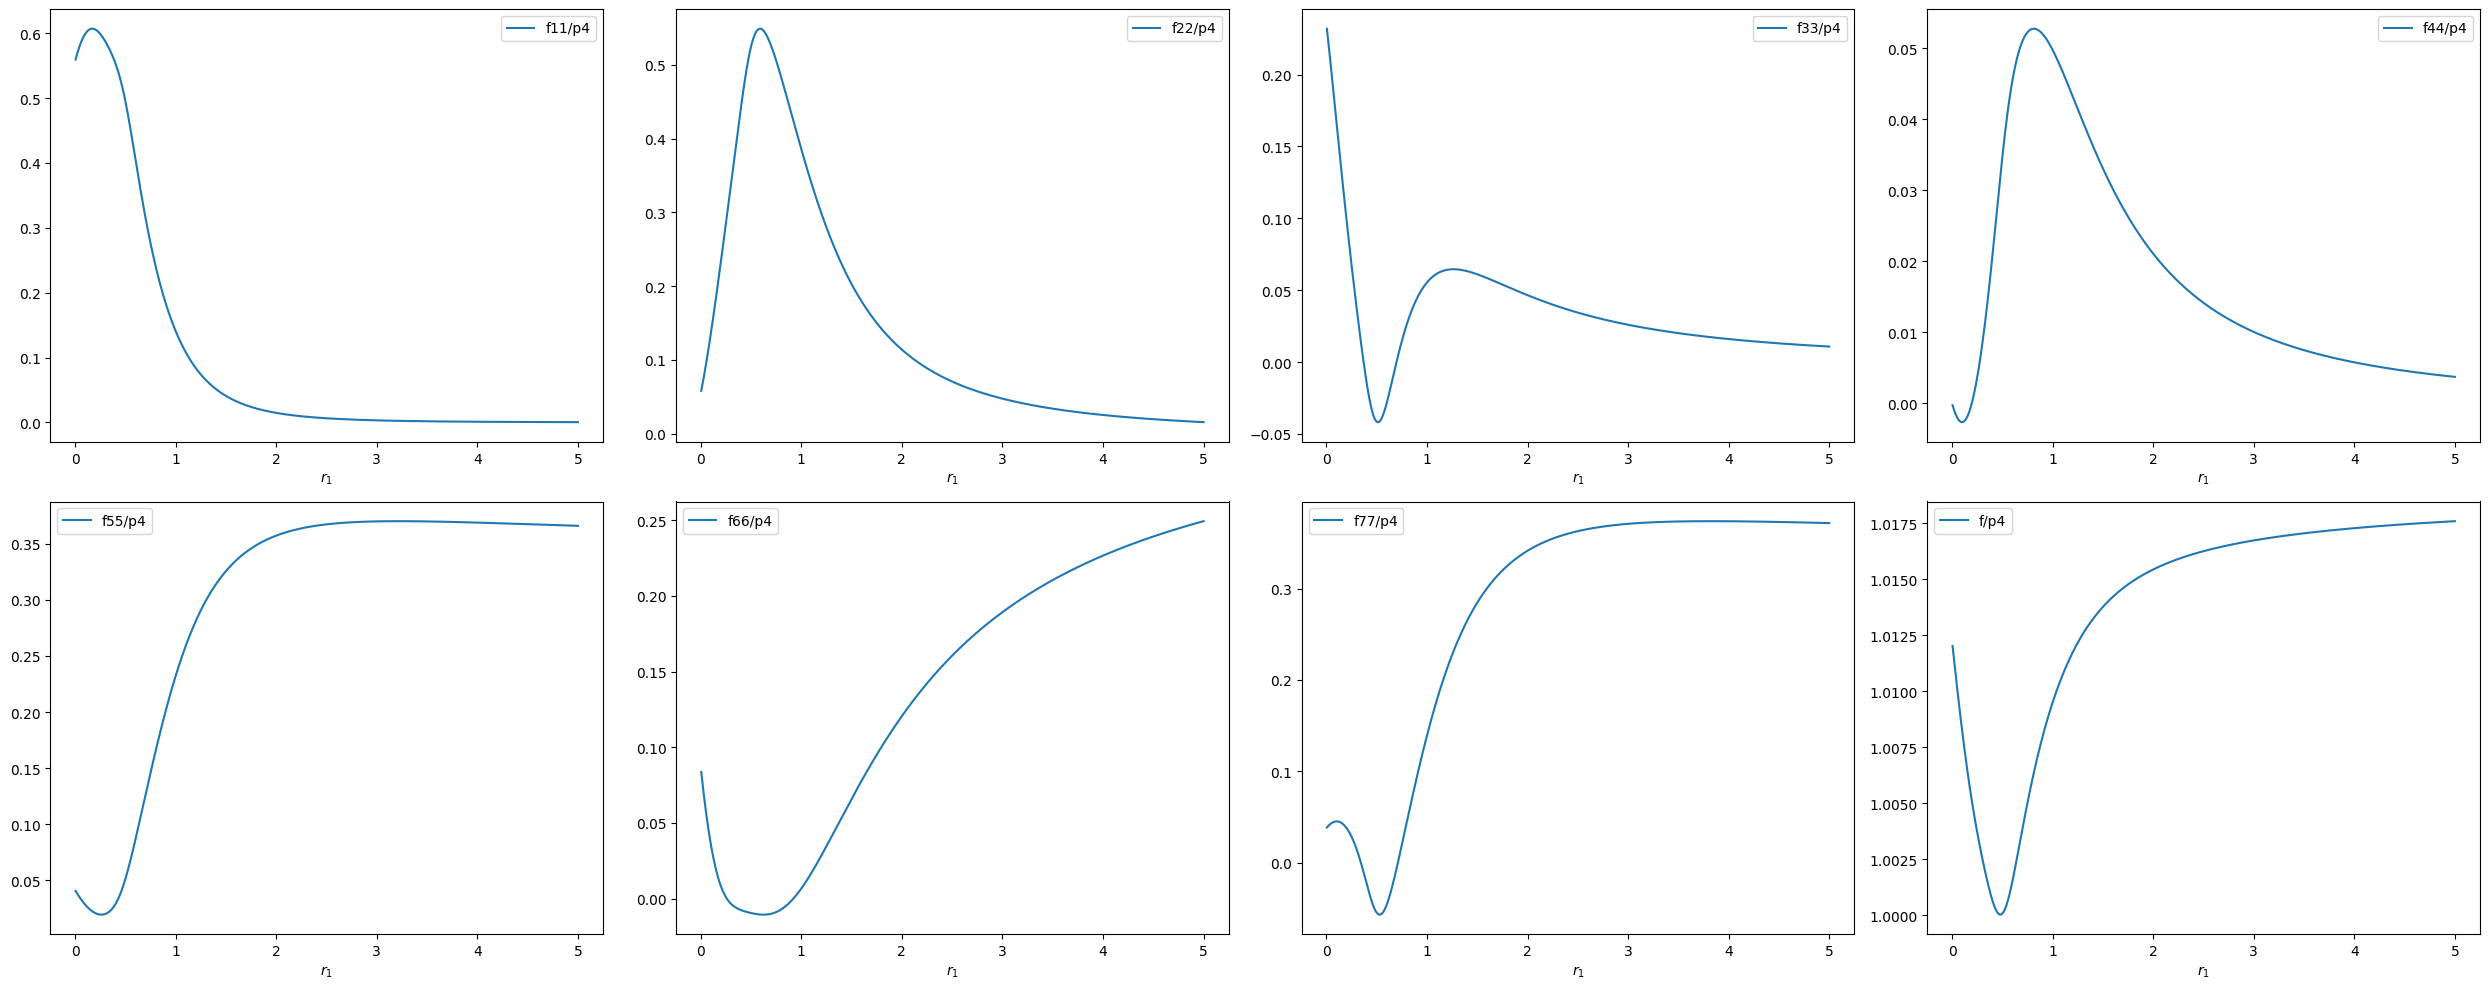

In [80]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p4, f22_over_p4, f33_over_p4, f44_over_p4, f55_over_p4, f66_over_p4, f77_over_p4, f_over_p4]
titles = ['f11/p4', 'f22/p4', 'f33/p4', 'f44/p4', 'f55/p4', 'f66/p4', 'f77/p4', 'f/p4']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [81]:
# # Generate random numbers in the interval (-1, -0.99)
# lower_interval = np.random.uniform(-1, -0.99, size=3)

# # Generate random numbers in the interval (0.99, 1)
# upper_interval = np.random.uniform(0.99, 1, size=4)

# # Combine the two arrays
# combined_array = np.concatenate((lower_interval, upper_interval))
# np.random.shuffle(combined_array)

# # Shuffle the array
# coefficients_5 = tf.Variable(combined_array, dtype = tf.float32)
coefficients_5 = tf.Variable(([0.9961922,-0.9919074,0.99361825,-0.9926872,-0.9988762,0.9999964,0.9983883 ]), dtype = tf.float32)
coefficients_5

## 3 coefficients are close to -1 and 4 coefficients are close to 1.

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([ 0.9961922 , -0.9919074 ,  0.99361825, -0.9926872 , -0.9988762 ,
        0.9999964 ,  0.9983883 ], dtype=float32)>

In [82]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_5():

    with tf.GradientTape() as tape:

        p_5 = sampling_function(coefficients_5, f)
        loss_5 = variance_loss(f, p_5)

    gradients_5 = tape.gradient(loss_5, [coefficients_5])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_5]
    optimizer.apply_gradients(zip(gradients_5, [coefficients_5]))

    return loss_5

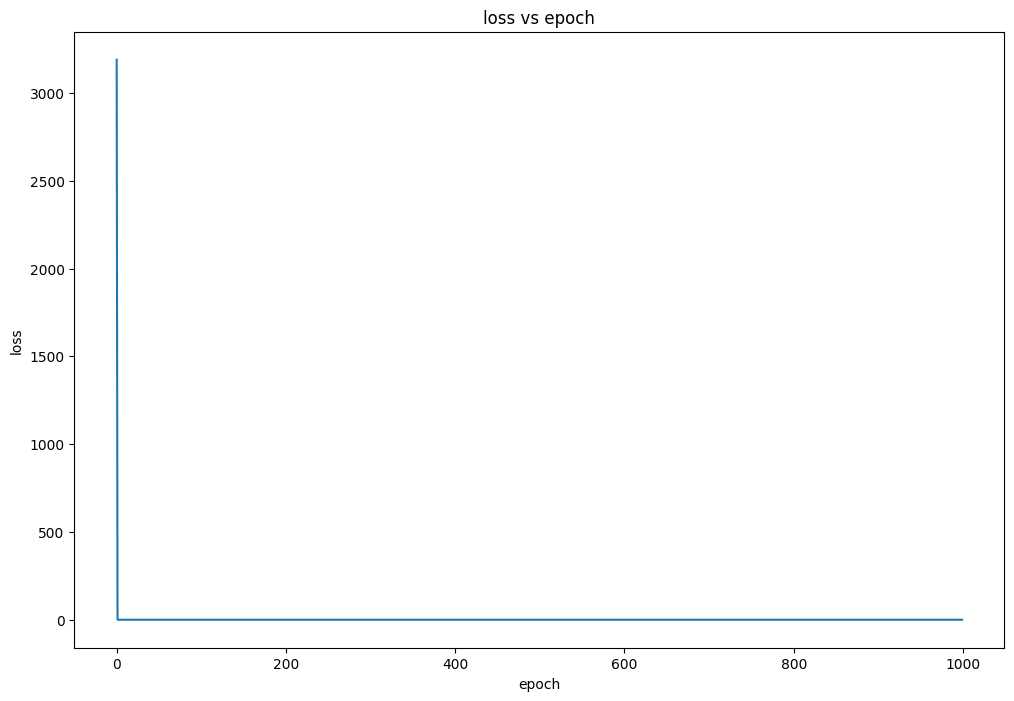

In [83]:
# Training loop
epochs = 1000
loss_list_5 = []
for epoch in range(epochs):
    loss_5 = train_step_5()
    loss_list_5.append(loss_5)

epoch = np.arange(epochs)
loss_5 = np.array(loss_list_5)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss_5)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show() ## This graph indicates high learning rate

In [84]:
# Best coefficients
best_coefficients_5 = coefficients_5.numpy()
print("Best coefficients:", best_coefficients_5)

Best coefficients: [ 280.49423 1915.9362   733.30225  343.37436 5094.8296  1551.9127
 4793.403  ]


In [85]:
p_5 = best_coefficients_5[0] * F_11_2d + best_coefficients_5[1] * F_22_2d + best_coefficients_5[2] * F_33_2d + best_coefficients_5[3]  * F_44_2d + best_coefficients_5[4] * F_55_2d + best_coefficients_5[5] * F_66_2d + best_coefficients_5[6] * F_77_2d
p_5 = p_5/np.max(best_coefficients_5)
## An array of 100 elements

In [86]:
# The final optimized coefficients after normalization (that are included in p_5)

coefficients_normalized_5 = best_coefficients_5/np.max(best_coefficients_5)
print("Best coefficients after normalization:", coefficients_normalized_5)

Best coefficients after normalization: [0.05505468 0.376055   0.14393067 0.06739663 1.         0.30460542
 0.9408367 ]


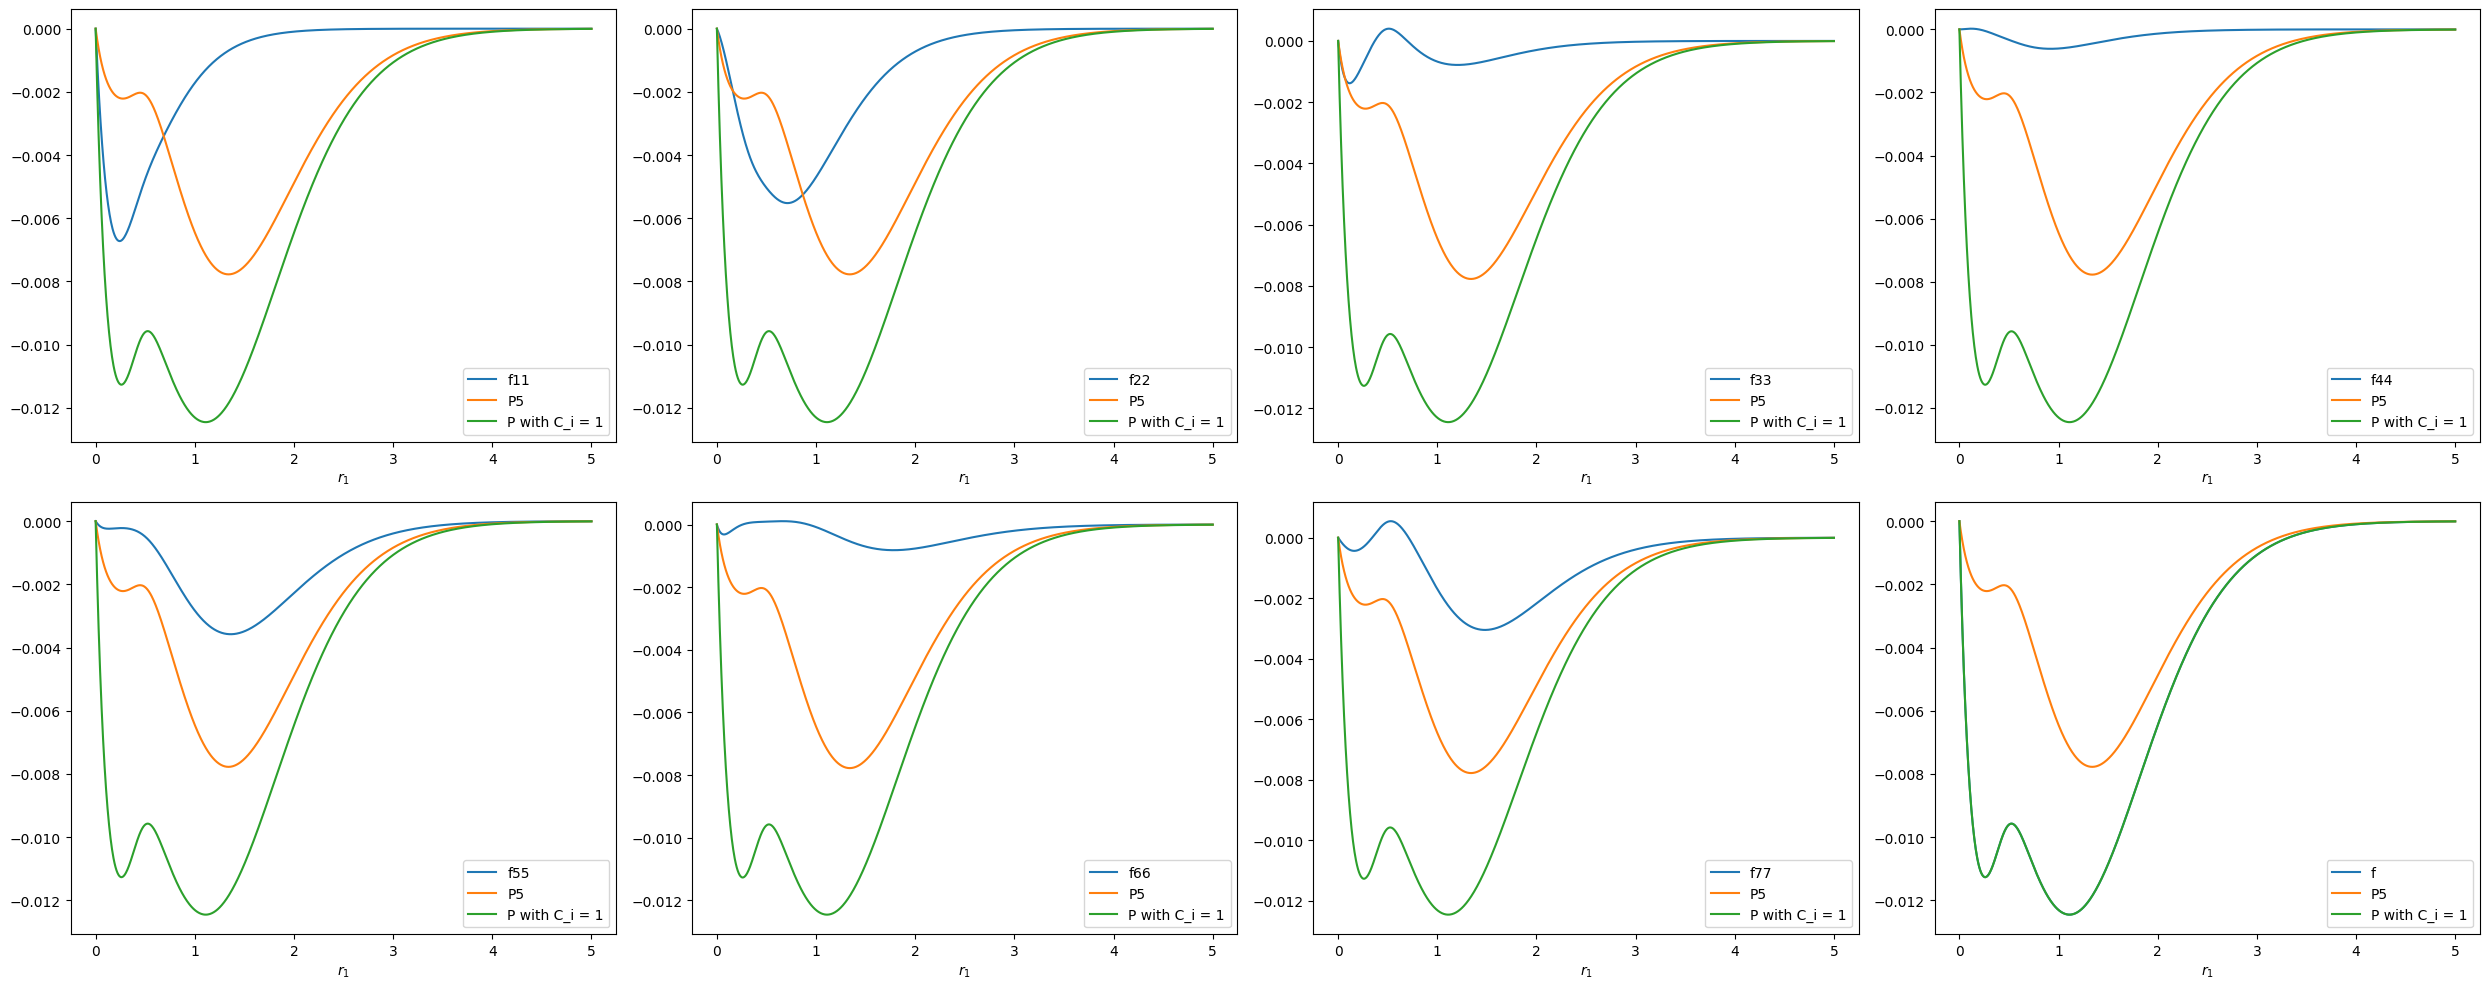

In [87]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_5, label='P5')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [88]:
f11_over_p5 = F_11_2d/p_5
f22_over_p5 = F_22_2d/p_5
f33_over_p5 = F_33_2d/p_5
f44_over_p5 = F_44_2d/p_5
f55_over_p5 = F_55_2d/p_5
f66_over_p5 = F_66_2d/p_5
f77_over_p5 = F_77_2d/p_5
f_over_p5 = F_2d/p_5

<ipython-input-88-4eb8625ef15a>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p5 = F_11_2d/p_5
<ipython-input-88-4eb8625ef15a>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p5 = F_22_2d/p_5
<ipython-input-88-4eb8625ef15a>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p5 = F_33_2d/p_5
<ipython-input-88-4eb8625ef15a>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p5 = F_44_2d/p_5
<ipython-input-88-4eb8625ef15a>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p5 = F_55_2d/p_5
<ipython-input-88-4eb8625ef15a>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p5 = F_66_2d/p_5
<ipython-input-88-4eb8625ef15a>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p5 = F_77_2d/p_5
<ipython-input-88-4eb8625ef15a>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p5 = F_2d/p_5


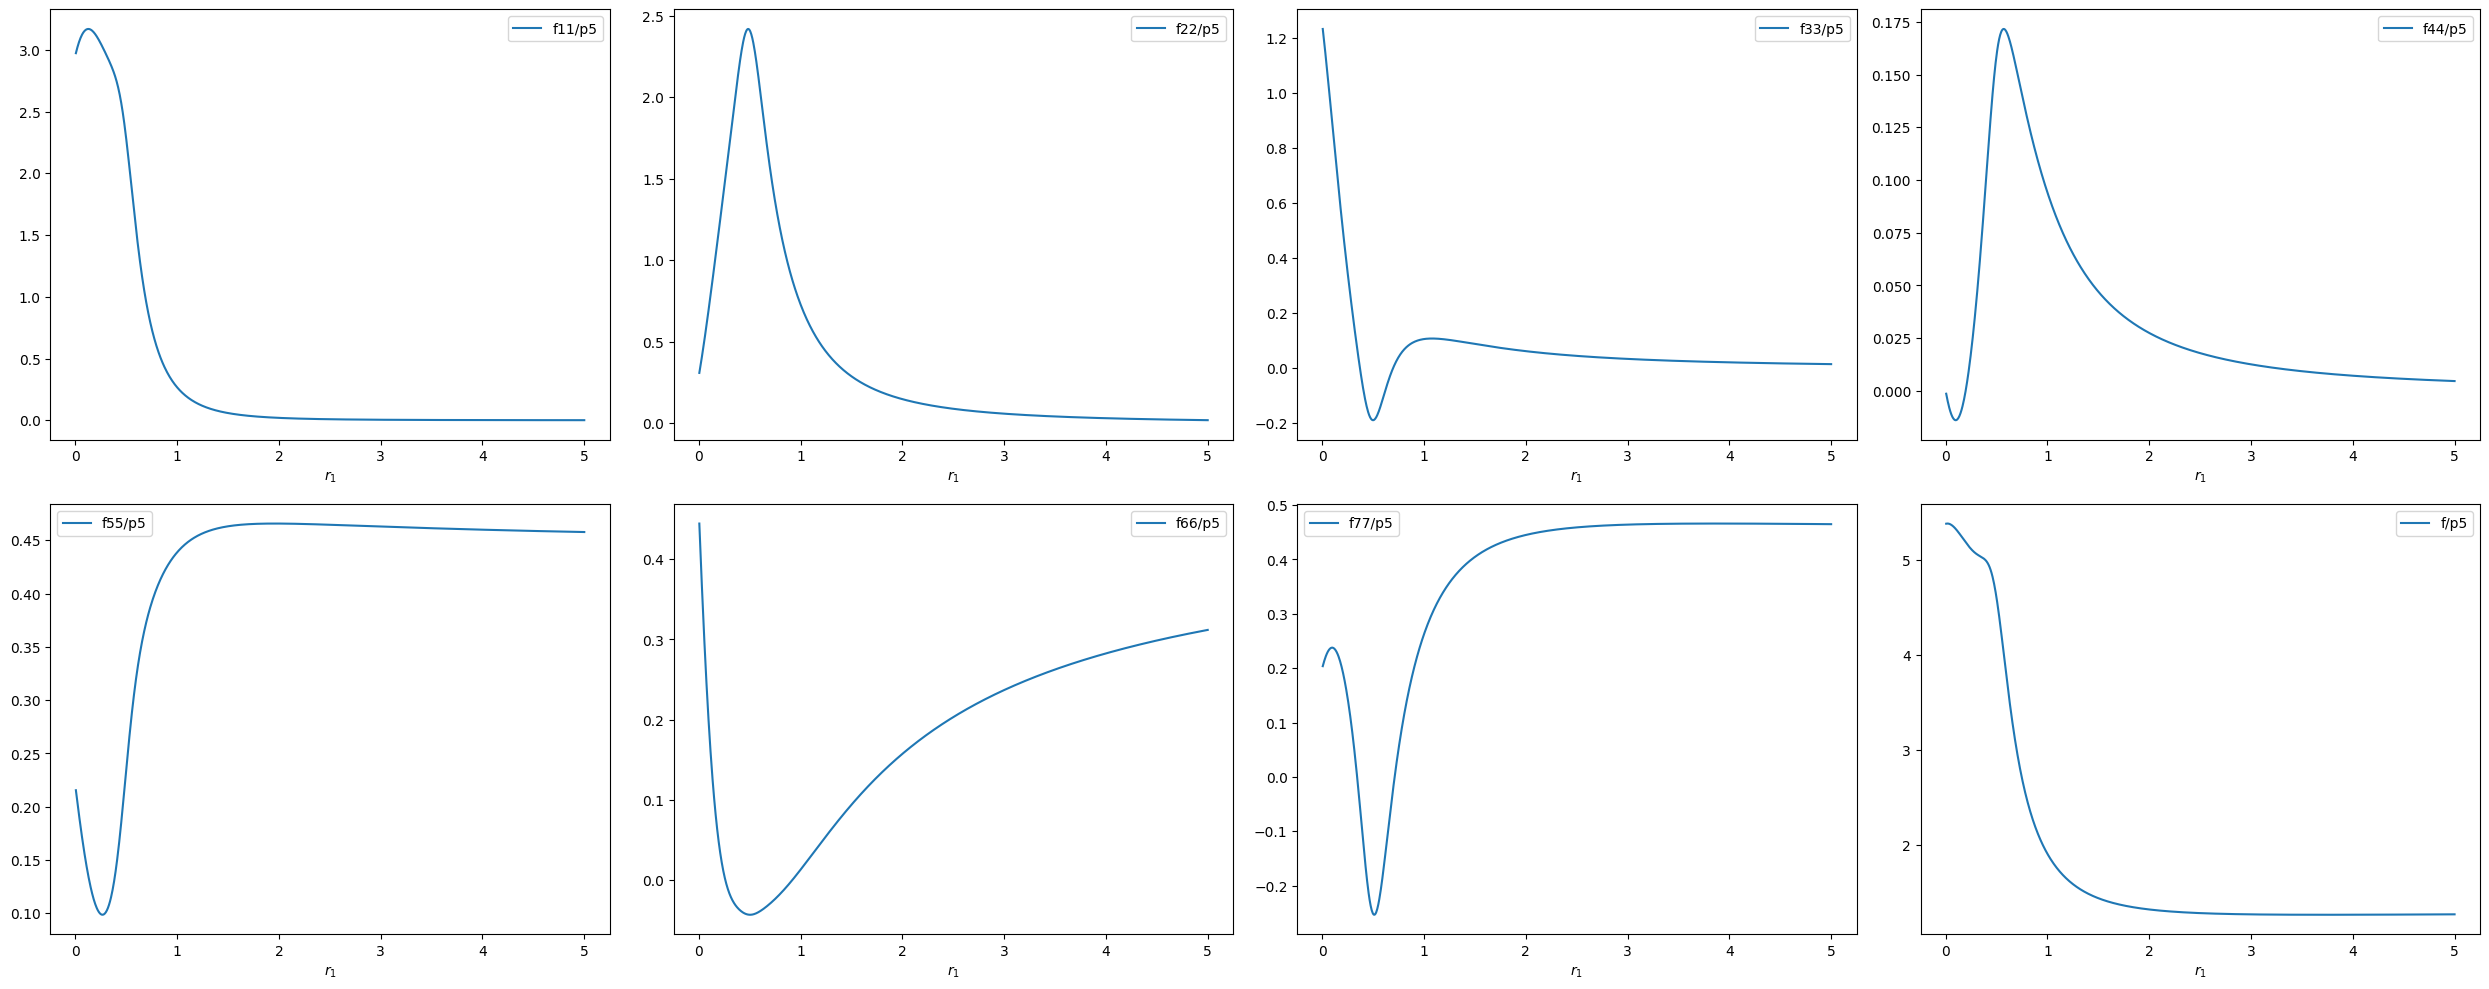

In [89]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p5, f22_over_p5, f33_over_p5, f44_over_p5, f55_over_p5, f66_over_p5, f77_over_p5, f_over_p5]
titles = ['f11/p5', 'f22/p5', 'f33/p5', 'f44/p5', 'f55/p5', 'f66/p5', 'f77/p5', 'f/p5']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [90]:
# # Generate random numbers in the interval (-1, -0.99)
# lower_interval = np.random.uniform(-1, -0.99, size=4)

# # Generate random numbers in the interval (0.99, 1)
# upper_interval = np.random.uniform(0.99, 1, size=3)

# # Combine the two arrays
# combined_array = np.concatenate((lower_interval, upper_interval))
# np.random.shuffle(combined_array)

# # Shuffle the array
# coefficients_6 = tf.Variable(combined_array, dtype = tf.float32)
coefficients_6 = tf.Variable(([0.9902443,-0.99802333,-0.99829364,-0.99760246,-0.9956192,0.9954314,0.99988735]), dtype = tf.float32)
coefficients_6

## 4 coefficients are close to -1 and 3 coefficients are close to 1.

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([ 0.9902443 , -0.99802333, -0.99829364, -0.99760246, -0.9956192 ,
        0.9954314 ,  0.99988735], dtype=float32)>

In [91]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_6():

    with tf.GradientTape() as tape:

        p_6 = sampling_function(coefficients_6, f)
        loss_6 = variance_loss(f, p_6)

    gradients_6 = tape.gradient(loss_6, [coefficients_6])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_6]
    optimizer.apply_gradients(zip(gradients_6, [coefficients_6]))

    return loss_6

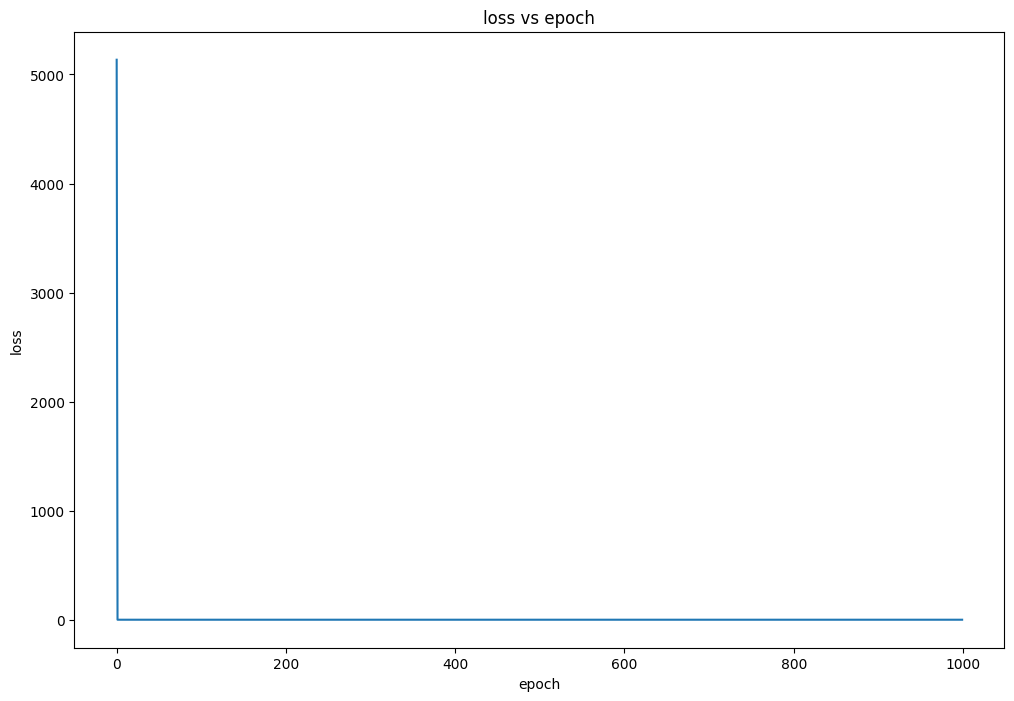

In [92]:
# Training loop
epochs = 1000
loss_list_6 = []
for epoch in range(epochs):
    loss_6 = train_step_6()
    loss_list_6.append(loss_6)


epoch = np.arange(epochs)
loss_6 = np.array(loss_list_6)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss_6)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show() ## This graph indicates high learning rate

In [93]:
# Best coefficients
best_coefficients_6 = coefficients_6.numpy()
print("Best coefficients:", best_coefficients_6)

Best coefficients: [  243.95255  2500.0945   1141.7747    486.66434 10472.692    4124.309
 10225.313  ]


In [94]:
p_6 = best_coefficients_6[0] * F_11_2d + best_coefficients_6[1] * F_22_2d + best_coefficients_6[2] * F_33_2d + best_coefficients_6[3]  * F_44_2d + best_coefficients_6[4] * F_55_2d + best_coefficients_6[5] * F_66_2d + best_coefficients_6[6] * F_77_2d
p_6 = p_6/np.max(best_coefficients_6)

## An array of 100 elements

In [95]:
# The final optimized coefficients after normalization (that are included in p_6)

coefficients_normalized_6 = best_coefficients_6/np.max(best_coefficients_6)
print("Best coefficients after normalization:", coefficients_normalized_6)

Best coefficients after normalization: [0.02329416 0.2387251  0.10902399 0.04646984 1.         0.39381555
 0.9763787 ]


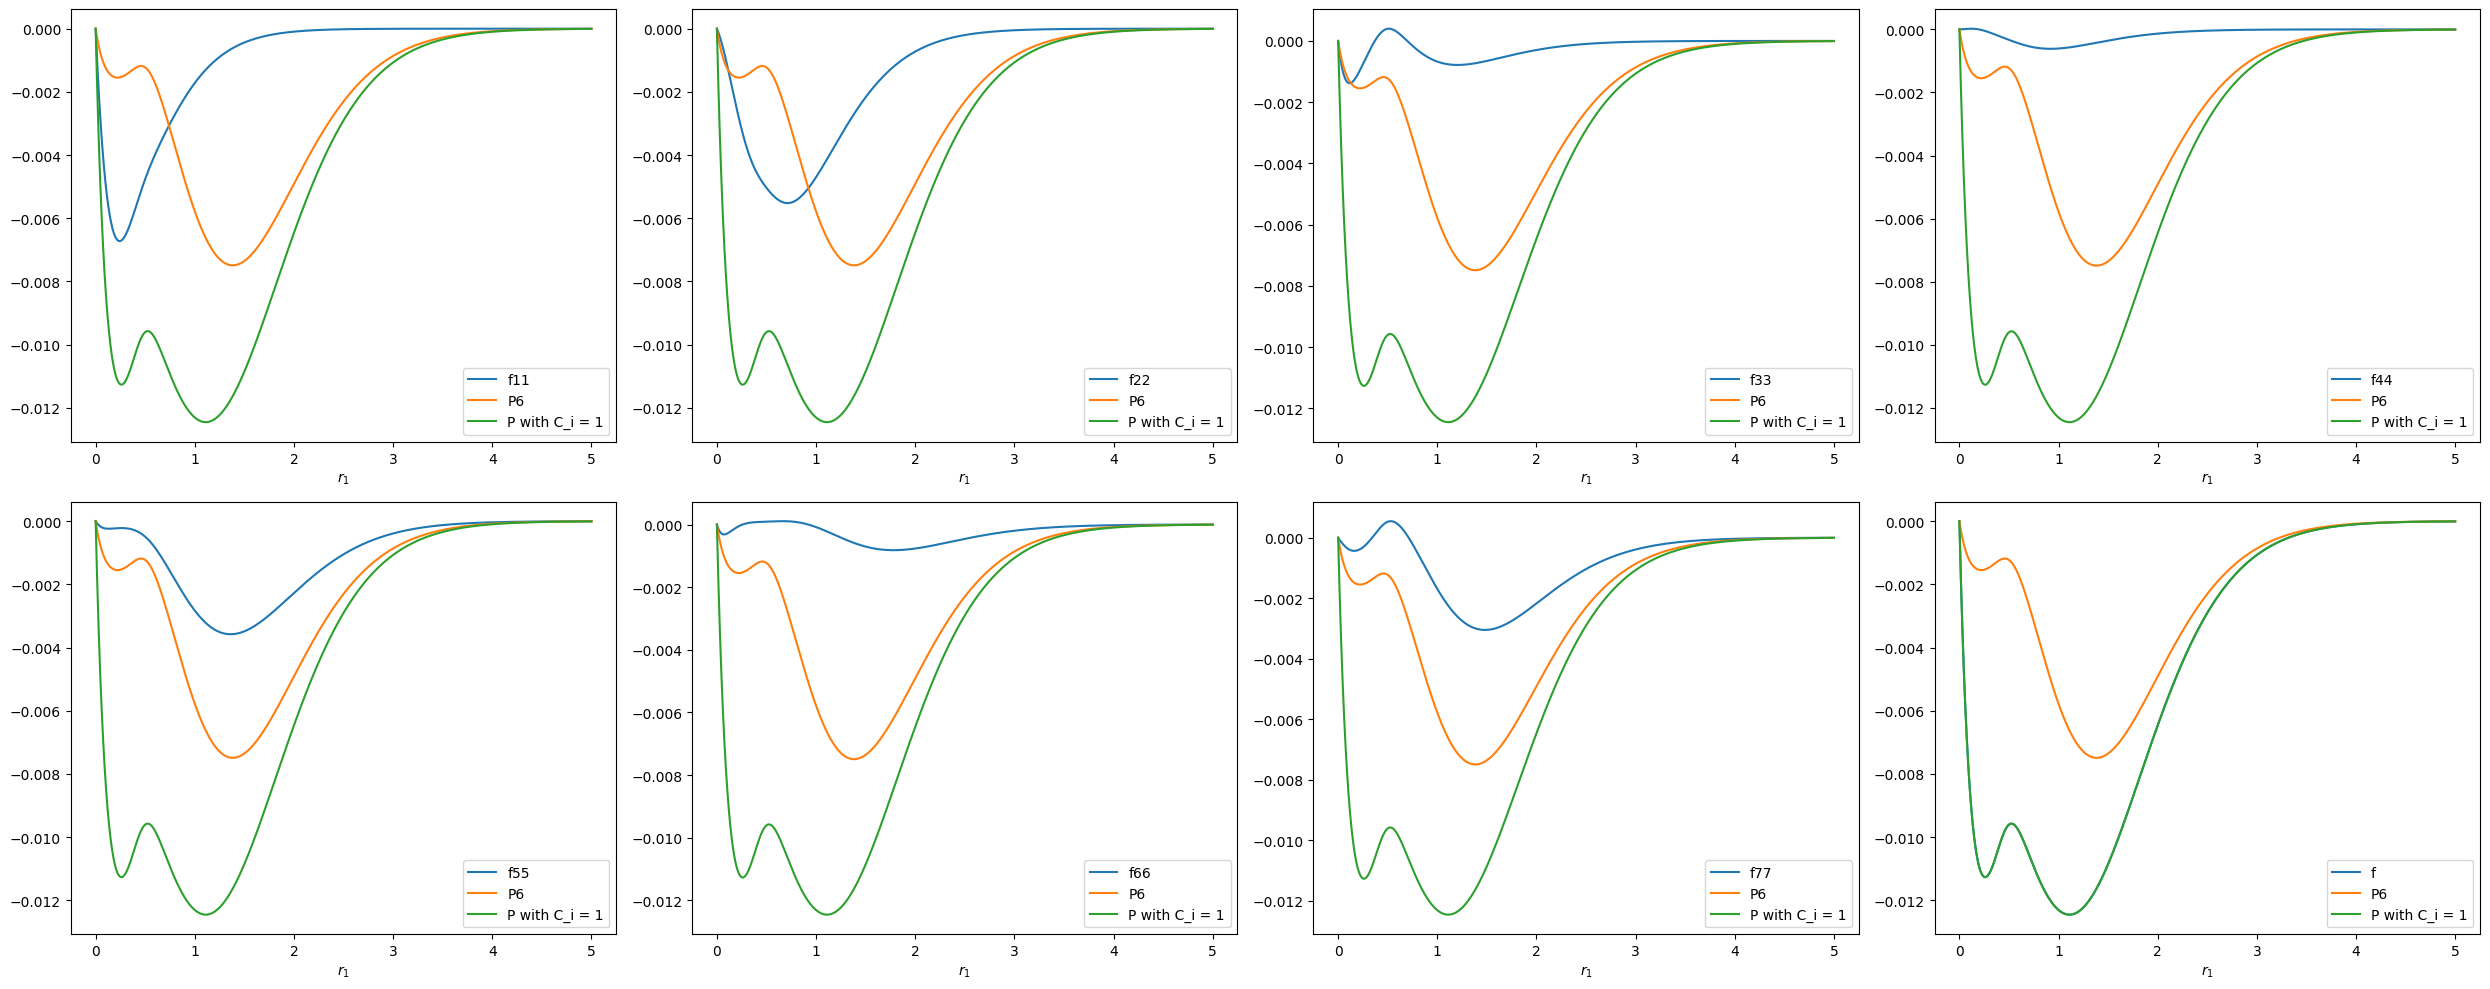

In [96]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_6, label='P6')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [97]:
f11_over_p6 = F_11_2d/p_6
f22_over_p6 = F_22_2d/p_6
f33_over_p6 = F_33_2d/p_6
f44_over_p6 = F_44_2d/p_6
f55_over_p6 = F_55_2d/p_6
f66_over_p6 = F_66_2d/p_6
f77_over_p6 = F_77_2d/p_6
f_over_p6 = F_2d/p_6

<ipython-input-97-b49082f8c6a2>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p6 = F_11_2d/p_6
<ipython-input-97-b49082f8c6a2>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p6 = F_22_2d/p_6
<ipython-input-97-b49082f8c6a2>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p6 = F_33_2d/p_6
<ipython-input-97-b49082f8c6a2>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p6 = F_44_2d/p_6
<ipython-input-97-b49082f8c6a2>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p6 = F_55_2d/p_6
<ipython-input-97-b49082f8c6a2>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p6 = F_66_2d/p_6
<ipython-input-97-b49082f8c6a2>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p6 = F_77_2d/p_6
<ipython-input-97-b49082f8c6a2>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p6 = F_2d/p_6


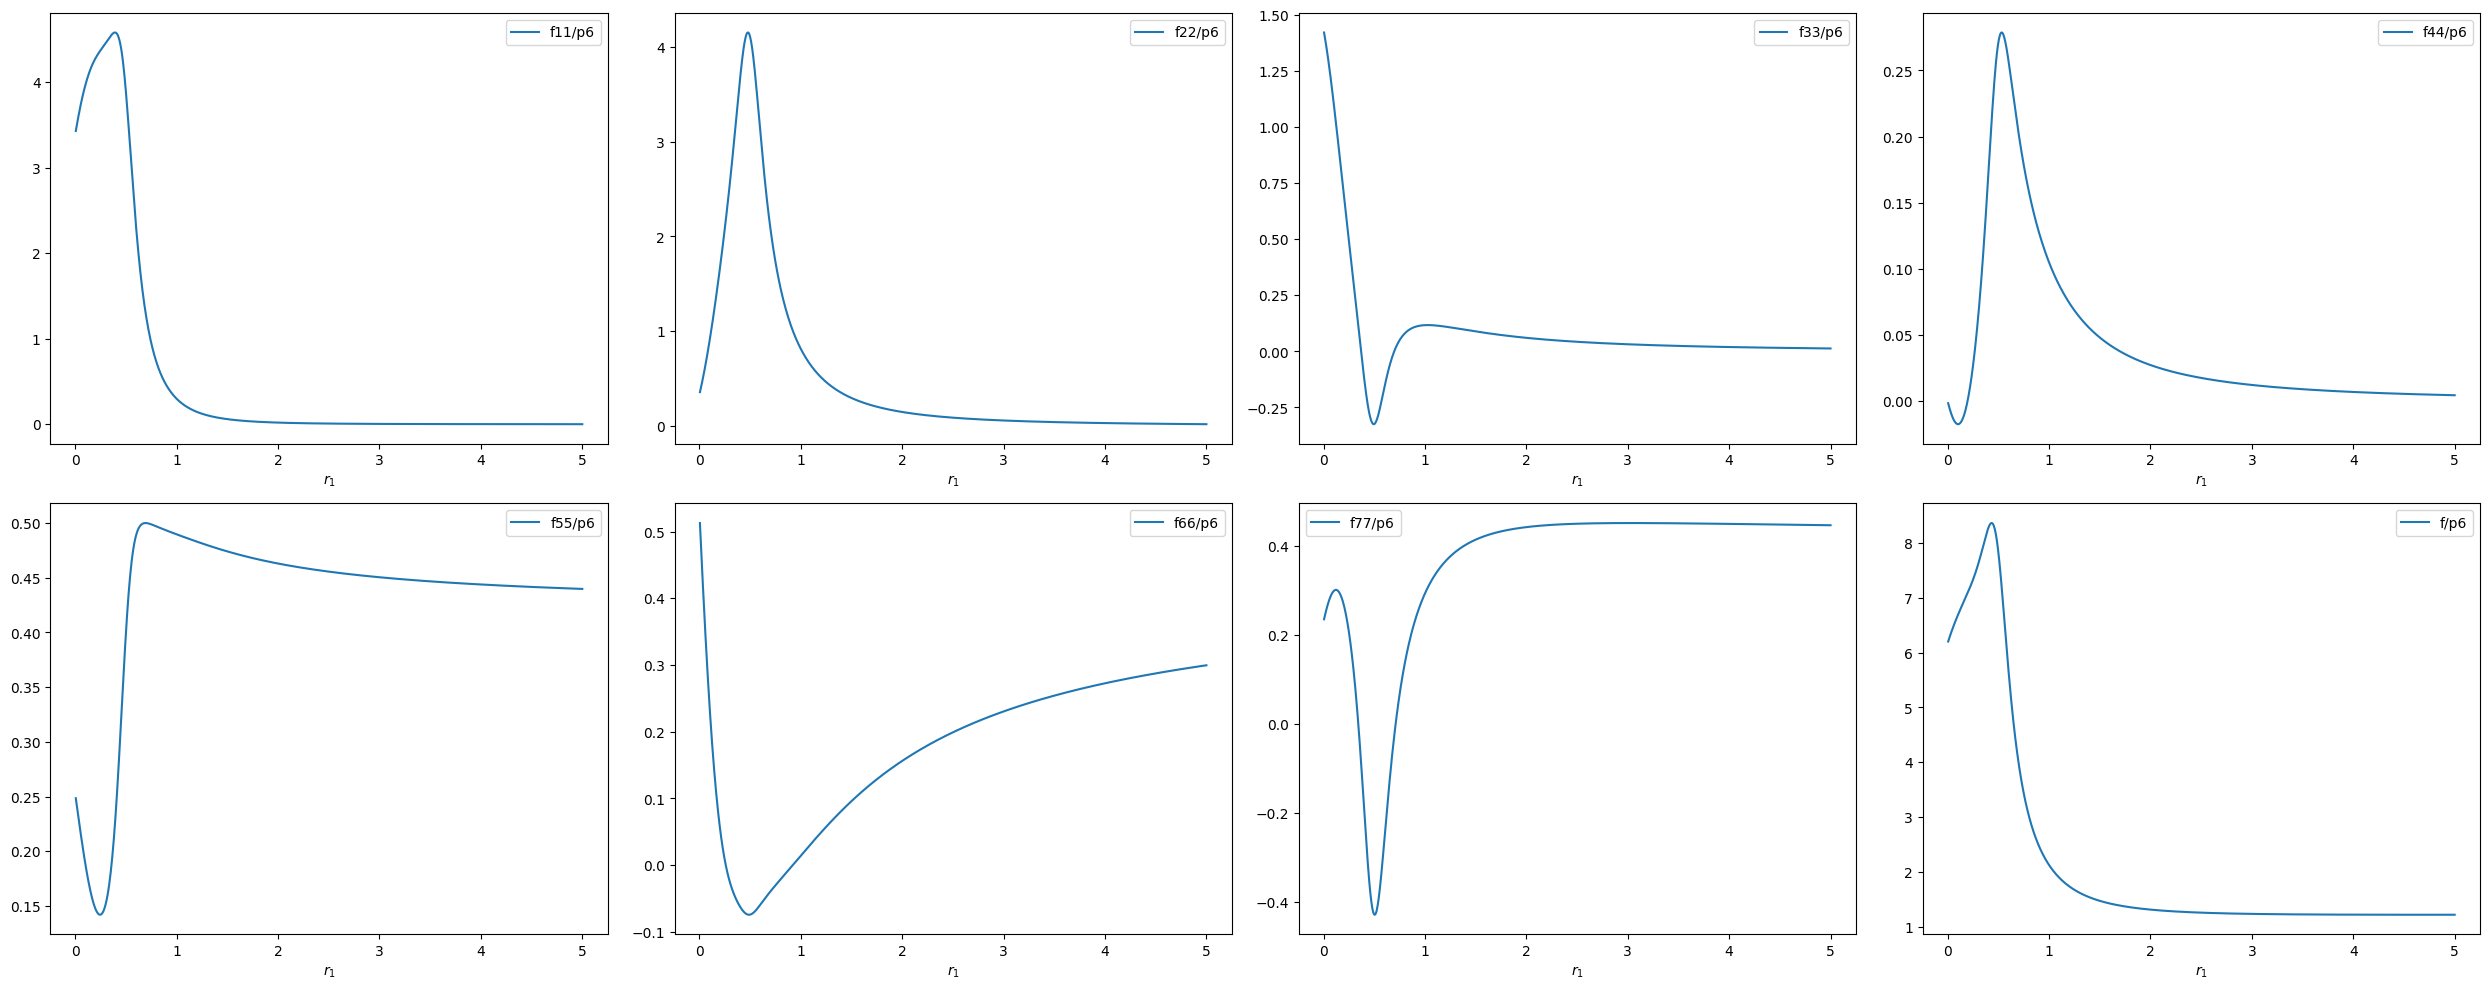

In [98]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p6, f22_over_p6, f33_over_p6, f44_over_p6, f55_over_p6, f66_over_p6, f77_over_p6, f_over_p6]
titles = ['f11/p6', 'f22/p6', 'f33/p6', 'f44/p6', 'f55/p6', 'f66/p6', 'f77/p6', 'f/p6']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [99]:
coefficients_7 = tf.Variable(np.zeros(7), dtype=tf.float32)
coefficients_7

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [100]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_7():

    with tf.GradientTape() as tape:

        p_7 = sampling_function(coefficients_7, f)
        loss_7 = variance_loss(f, p_7)

    gradients_7 = tape.gradient(loss_7, [coefficients_7])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_7]
    optimizer.apply_gradients(zip(gradients_7, [coefficients_7]))

    return loss_7

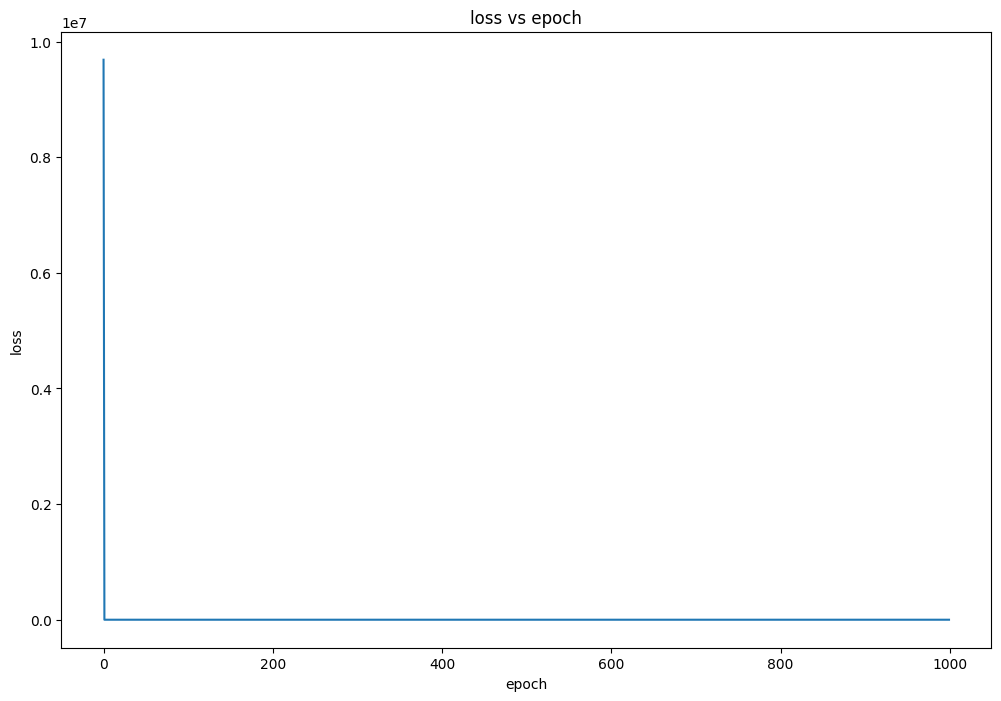

In [101]:
# Training loop
epochs = 1000
loss_list_7 = []
for epoch in range(epochs):
    loss_7 = train_step_7()
    loss_list_7.append(loss_7)

epoch = np.arange(epochs)
loss_7 = np.array(loss_list_7)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss_7)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show() ## This graph indicates high learning rate

In [102]:
# Best coefficients
best_coefficients_7 = coefficients_7.numpy()
print("Best coefficients:", best_coefficients_7)

Best coefficients: [-63593208.  -73150640.   -7927721.5  -6613319.5 -32773774.   -3385773.
 -19783134. ]


In [103]:
p_7 = best_coefficients_7[0] * F_11_2d + best_coefficients_7[1] * F_22_2d + best_coefficients_7[2] * F_33_2d + best_coefficients_7[3]  * F_44_2d + best_coefficients_7[4] * F_55_2d + best_coefficients_7[5] * F_66_2d + best_coefficients_7[6] * F_77_2d
p_7 = p_7/np.min(best_coefficients_7)
## An array of 100 elements

In [104]:
# The final optimized coefficients after normalization (that are included in p_7)

coefficients_normalized_7 = best_coefficients_7/np.min(best_coefficients_7)
print("Best coefficients after normalization:", coefficients_normalized_7)

Best coefficients after normalization: [0.8693459  1.         0.10837529 0.09040686 0.44803128 0.04628494
 0.27044377]


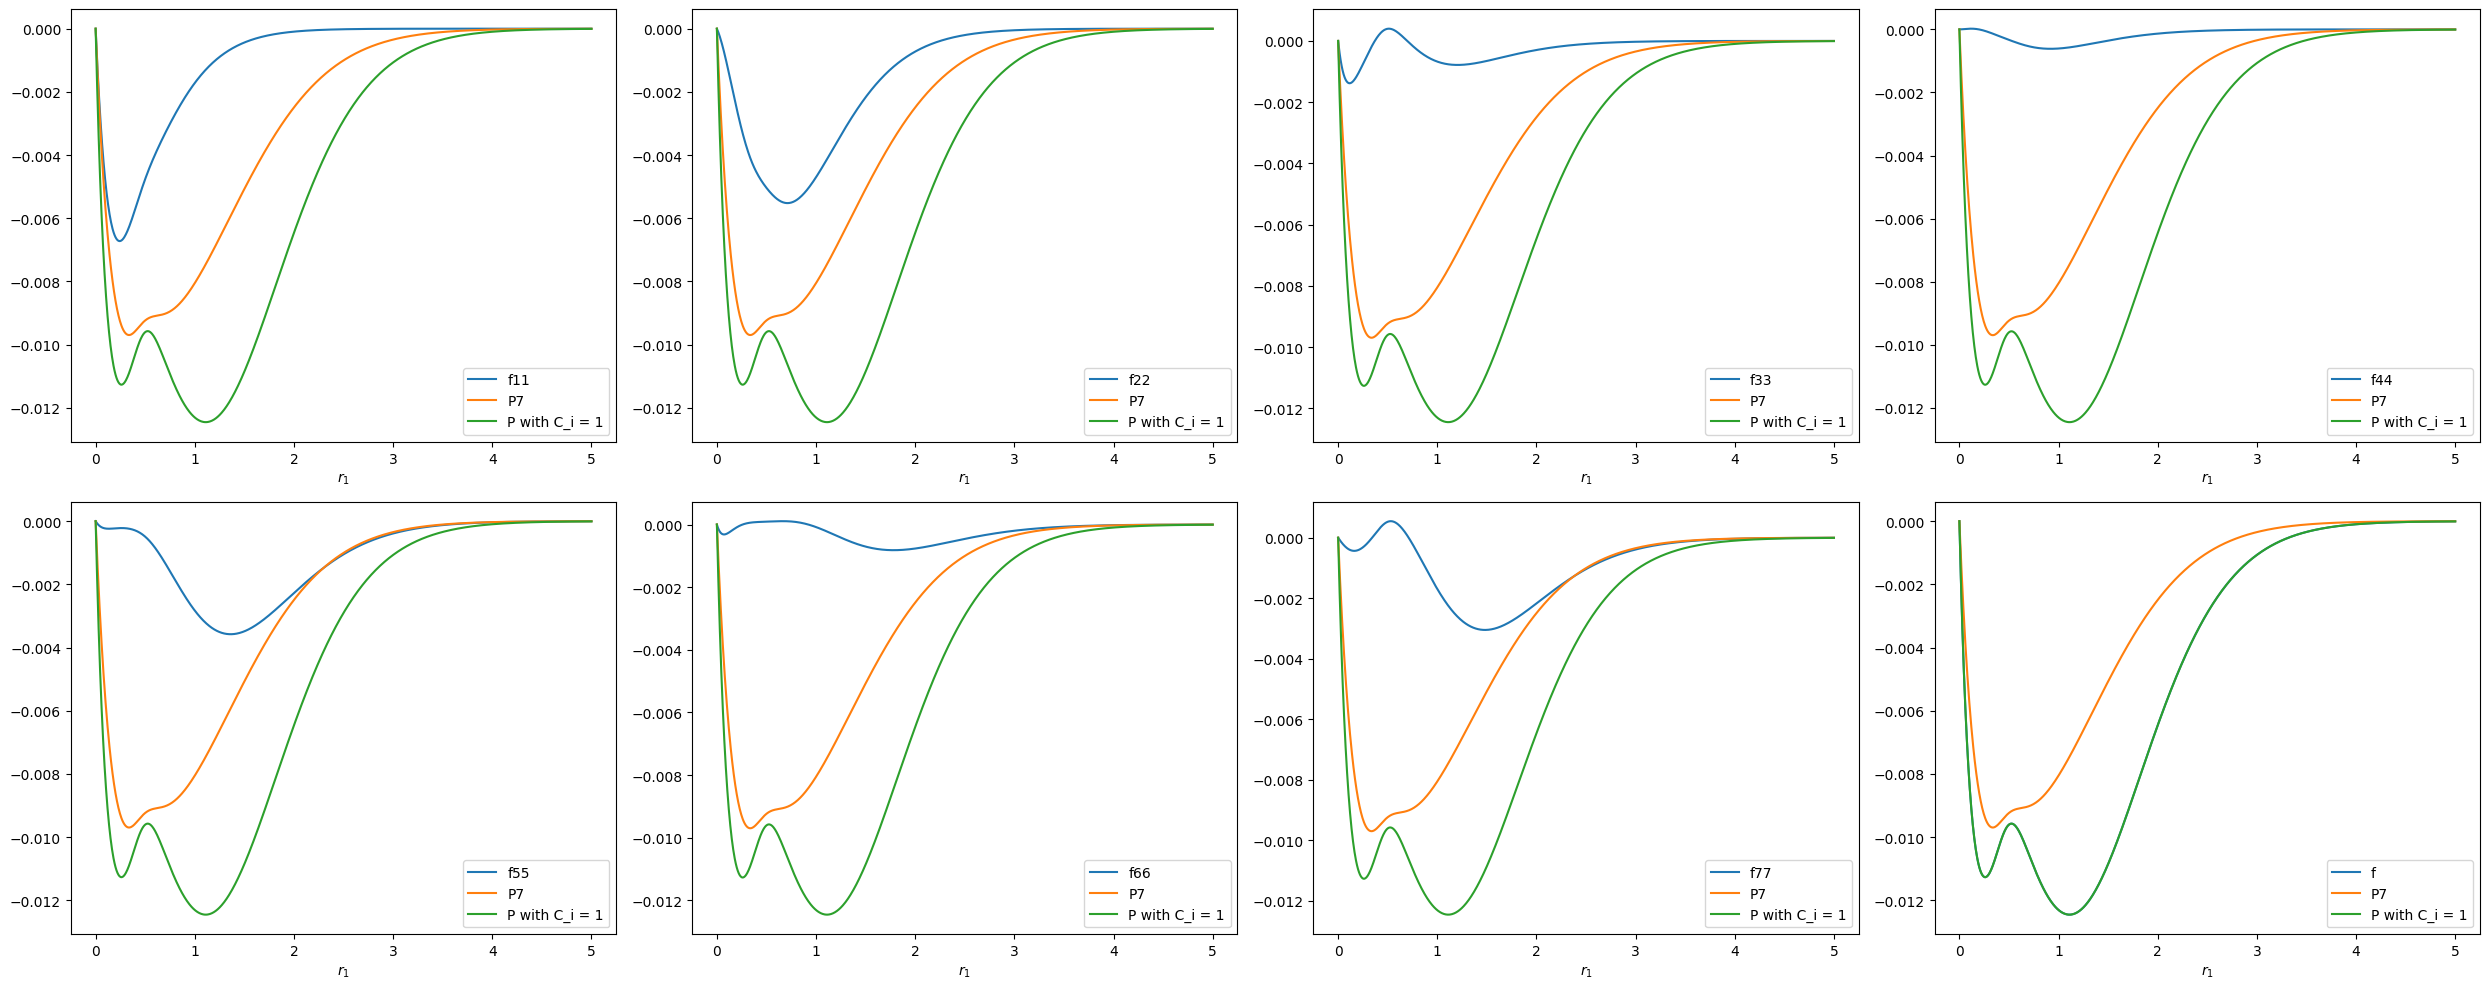

In [105]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_7, label='P7')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [106]:
f11_over_p7 = F_11_2d/p_7
f22_over_p7 = F_22_2d/p_7
f33_over_p7 = F_33_2d/p_7
f44_over_p7 = F_44_2d/p_7
f55_over_p7 = F_55_2d/p_7
f66_over_p7 = F_66_2d/p_7
f77_over_p7 = F_77_2d/p_7
f_over_p7 = F_2d/p_7

<ipython-input-106-25601c36698f>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p7 = F_11_2d/p_7
<ipython-input-106-25601c36698f>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p7 = F_22_2d/p_7
<ipython-input-106-25601c36698f>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p7 = F_33_2d/p_7
<ipython-input-106-25601c36698f>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p7 = F_44_2d/p_7
<ipython-input-106-25601c36698f>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p7 = F_55_2d/p_7
<ipython-input-106-25601c36698f>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p7 = F_66_2d/p_7
<ipython-input-106-25601c36698f>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p7 = F_77_2d/p_7
<ipython-input-106-25601c36698f>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p7 = F_2d/p_7


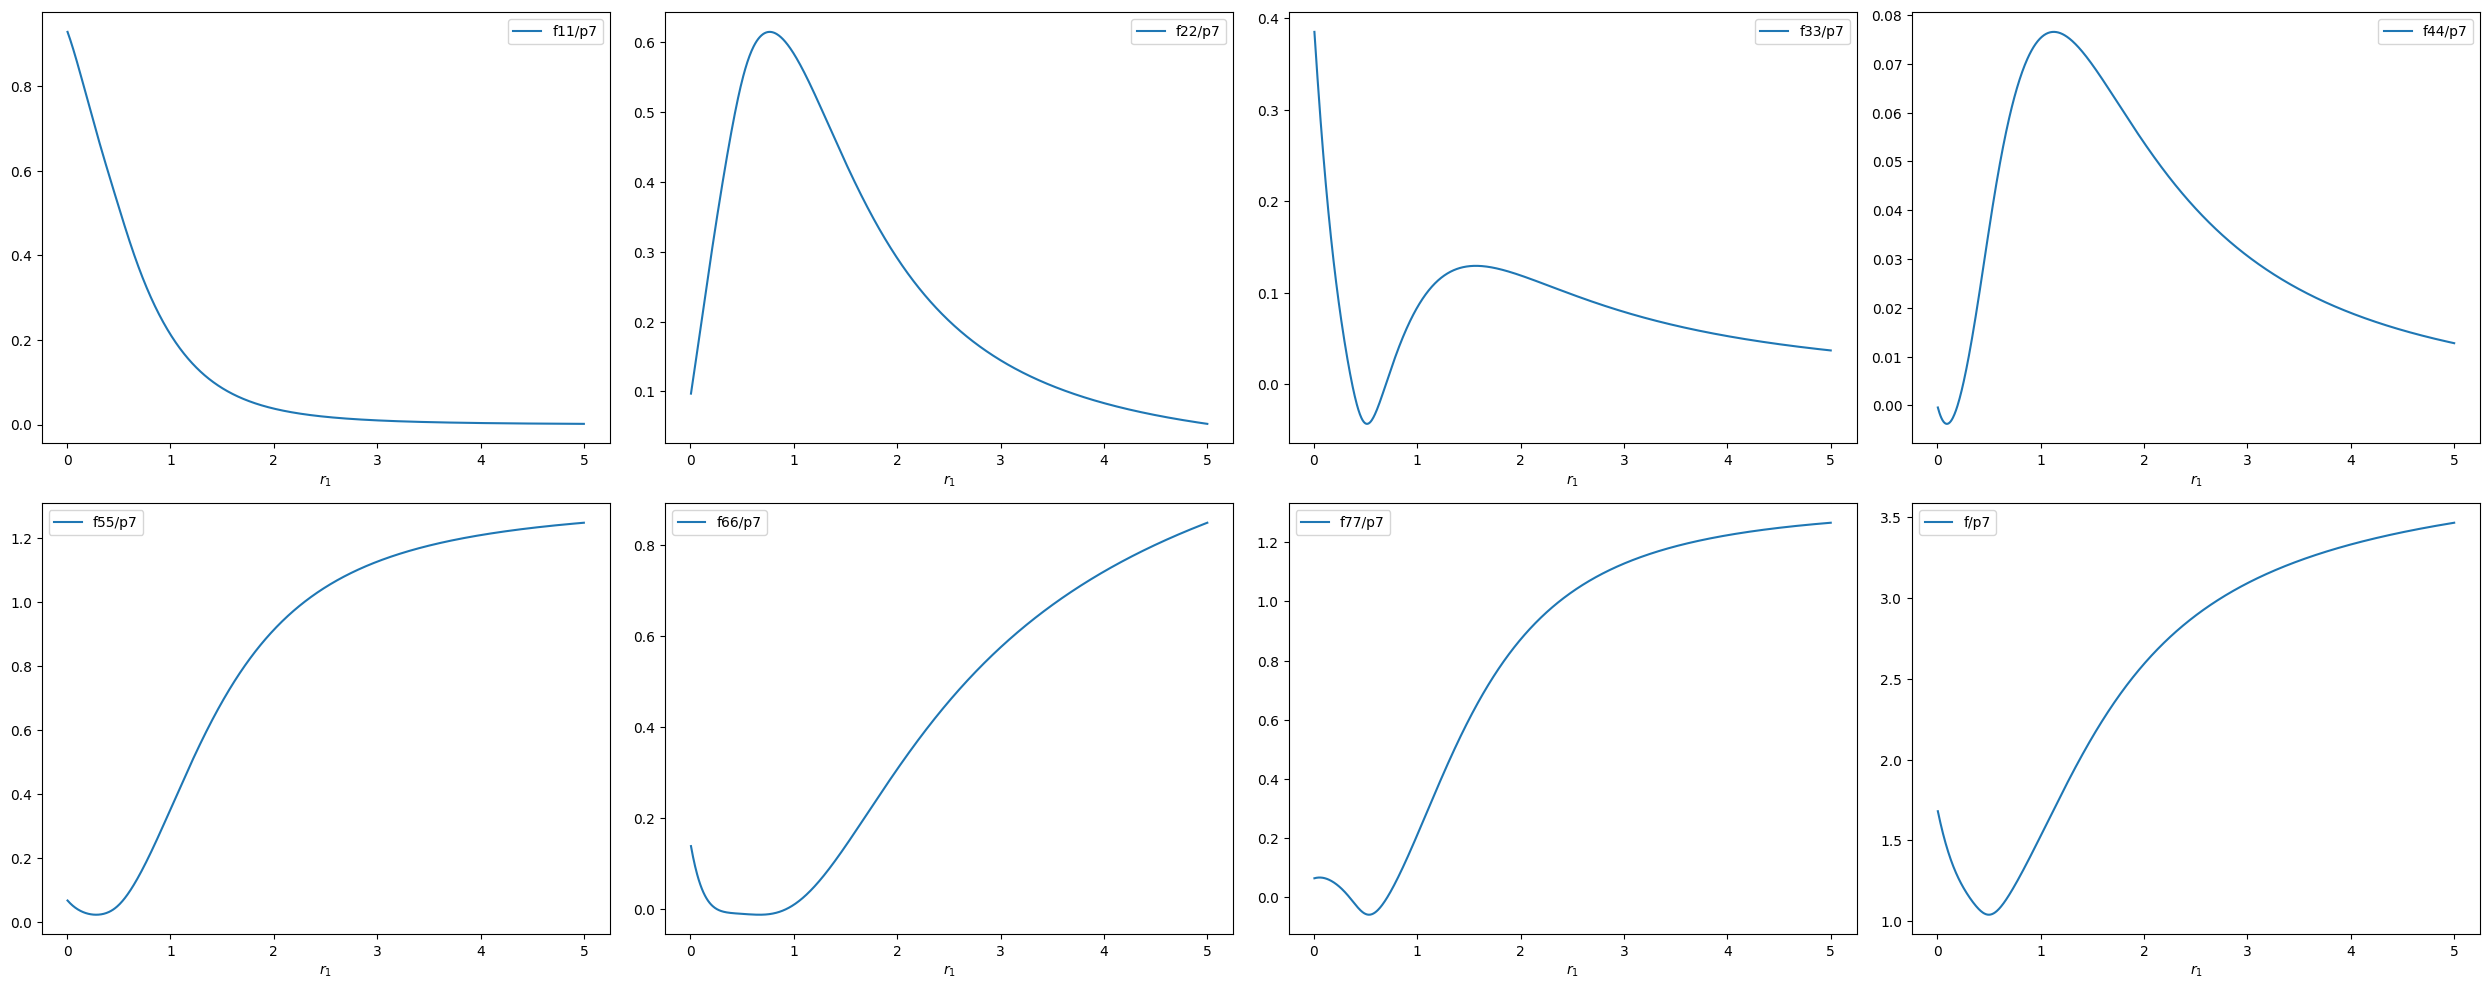

In [107]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p7, f22_over_p7, f33_over_p7, f44_over_p7, f55_over_p7, f66_over_p7, f77_over_p7, f_over_p7]
titles = ['f11/p7', 'f22/p7', 'f33/p7', 'f44/p7', 'f55/p7', 'f66/p7', 'f77/p7', 'f/p7']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [108]:
# # Generate random numbers in the interval (-1, -0.5)
# lower_interval = np.random.uniform(-1, -0.5, size=3)

# # Generate random numbers in the interval (0.5, 1)
# upper_interval = np.random.uniform(0.5, 1, size=4)

# # Combine the two arrays
# combined_array = np.concatenate((lower_interval, upper_interval))
# np.random.shuffle(combined_array)

# # Shuffle the array
# coefficients_8 = tf.Variable(combined_array, dtype = tf.float32)
coefficients_8 = tf.Variable(([0.7505131,0.71827275,-0.9103026,-0.8095249,0.7147169,0.8776106,-0.85607976]), dtype = tf.float32)
coefficients_8

## 3 coefficients lie between (-1, -0.5) and 4 coefficients lie between (0.5, 1)

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([ 0.7505131 ,  0.71827275, -0.9103026 , -0.8095249 ,  0.7147169 ,
        0.8776106 , -0.85607976], dtype=float32)>

In [109]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer
# optimizer.build([coefficients])
# Training step
@tf.function
def train_step_8():

    with tf.GradientTape() as tape:

        p_8 = sampling_function(coefficients_8, f)
        loss_8 = variance_loss(f, p_8)

    gradients_8 = tape.gradient(loss_8, [coefficients_8])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_8]
    optimizer.apply_gradients(zip(gradients_8, [coefficients_8]))

    return loss_8

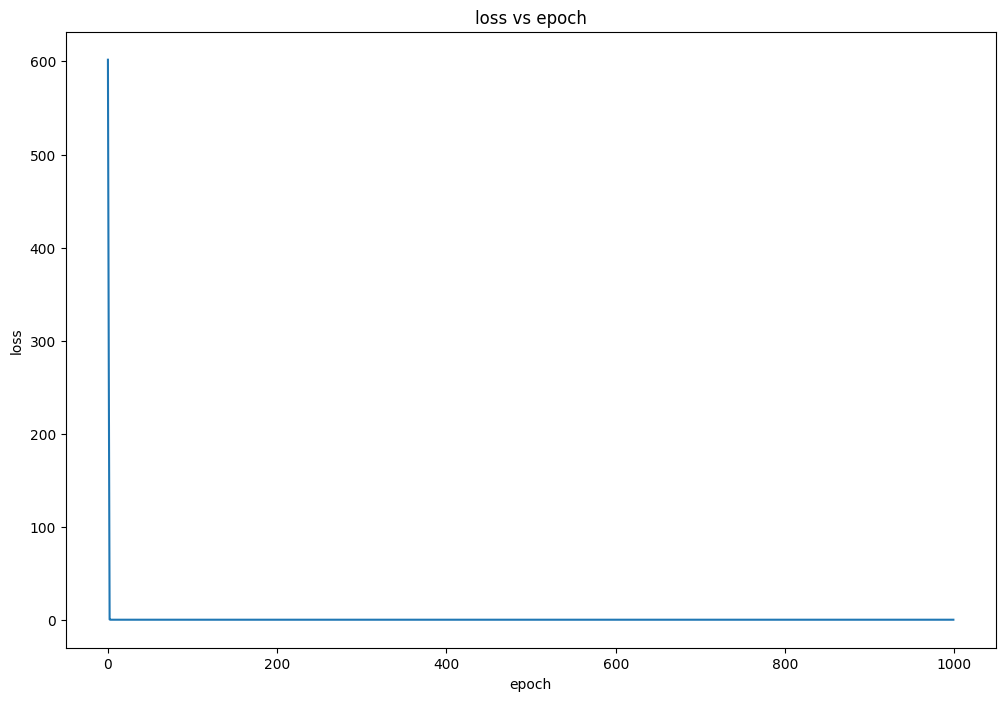

In [110]:
# Training loop
epochs = 1000
loss_list_8 = []
for epoch in range(epochs):
    loss_8 = train_step_8()
    loss_list_8.append(loss_8)

epoch = np.arange(epochs)
loss_8 = np.array(loss_list_8)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss_8)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show() ## This graph indicates high learning rate

In [111]:
# Best coefficients
best_coefficients_8 = coefficients_8.numpy()
print("Best coefficients:", best_coefficients_8)

Best coefficients: [229.949     154.08113     3.5457942   4.39671   -10.176246  -15.073448
 -21.602196 ]


In [112]:
p_8 = best_coefficients_8[0] * F_11_2d + best_coefficients_8[1] * F_22_2d + best_coefficients_8[2] * F_33_2d + best_coefficients_8[3]  * F_44_2d + best_coefficients_8[4] * F_55_2d + best_coefficients_8[5] * F_66_2d + best_coefficients_8[6] * F_77_2d
p_8 = p_8/np.max(best_coefficients_8)
## An array of 100 elements

In [113]:
# The final optimized coefficients after normalization (that are included in p_8)

coefficients_normalized_8 = best_coefficients_8/np.max(best_coefficients_8)
print("Best coefficients after normalization:", coefficients_normalized_8)

Best coefficients after normalization: [ 1.          0.67006654  0.01541992  0.01912037 -0.04425436 -0.06555127
 -0.09394342]


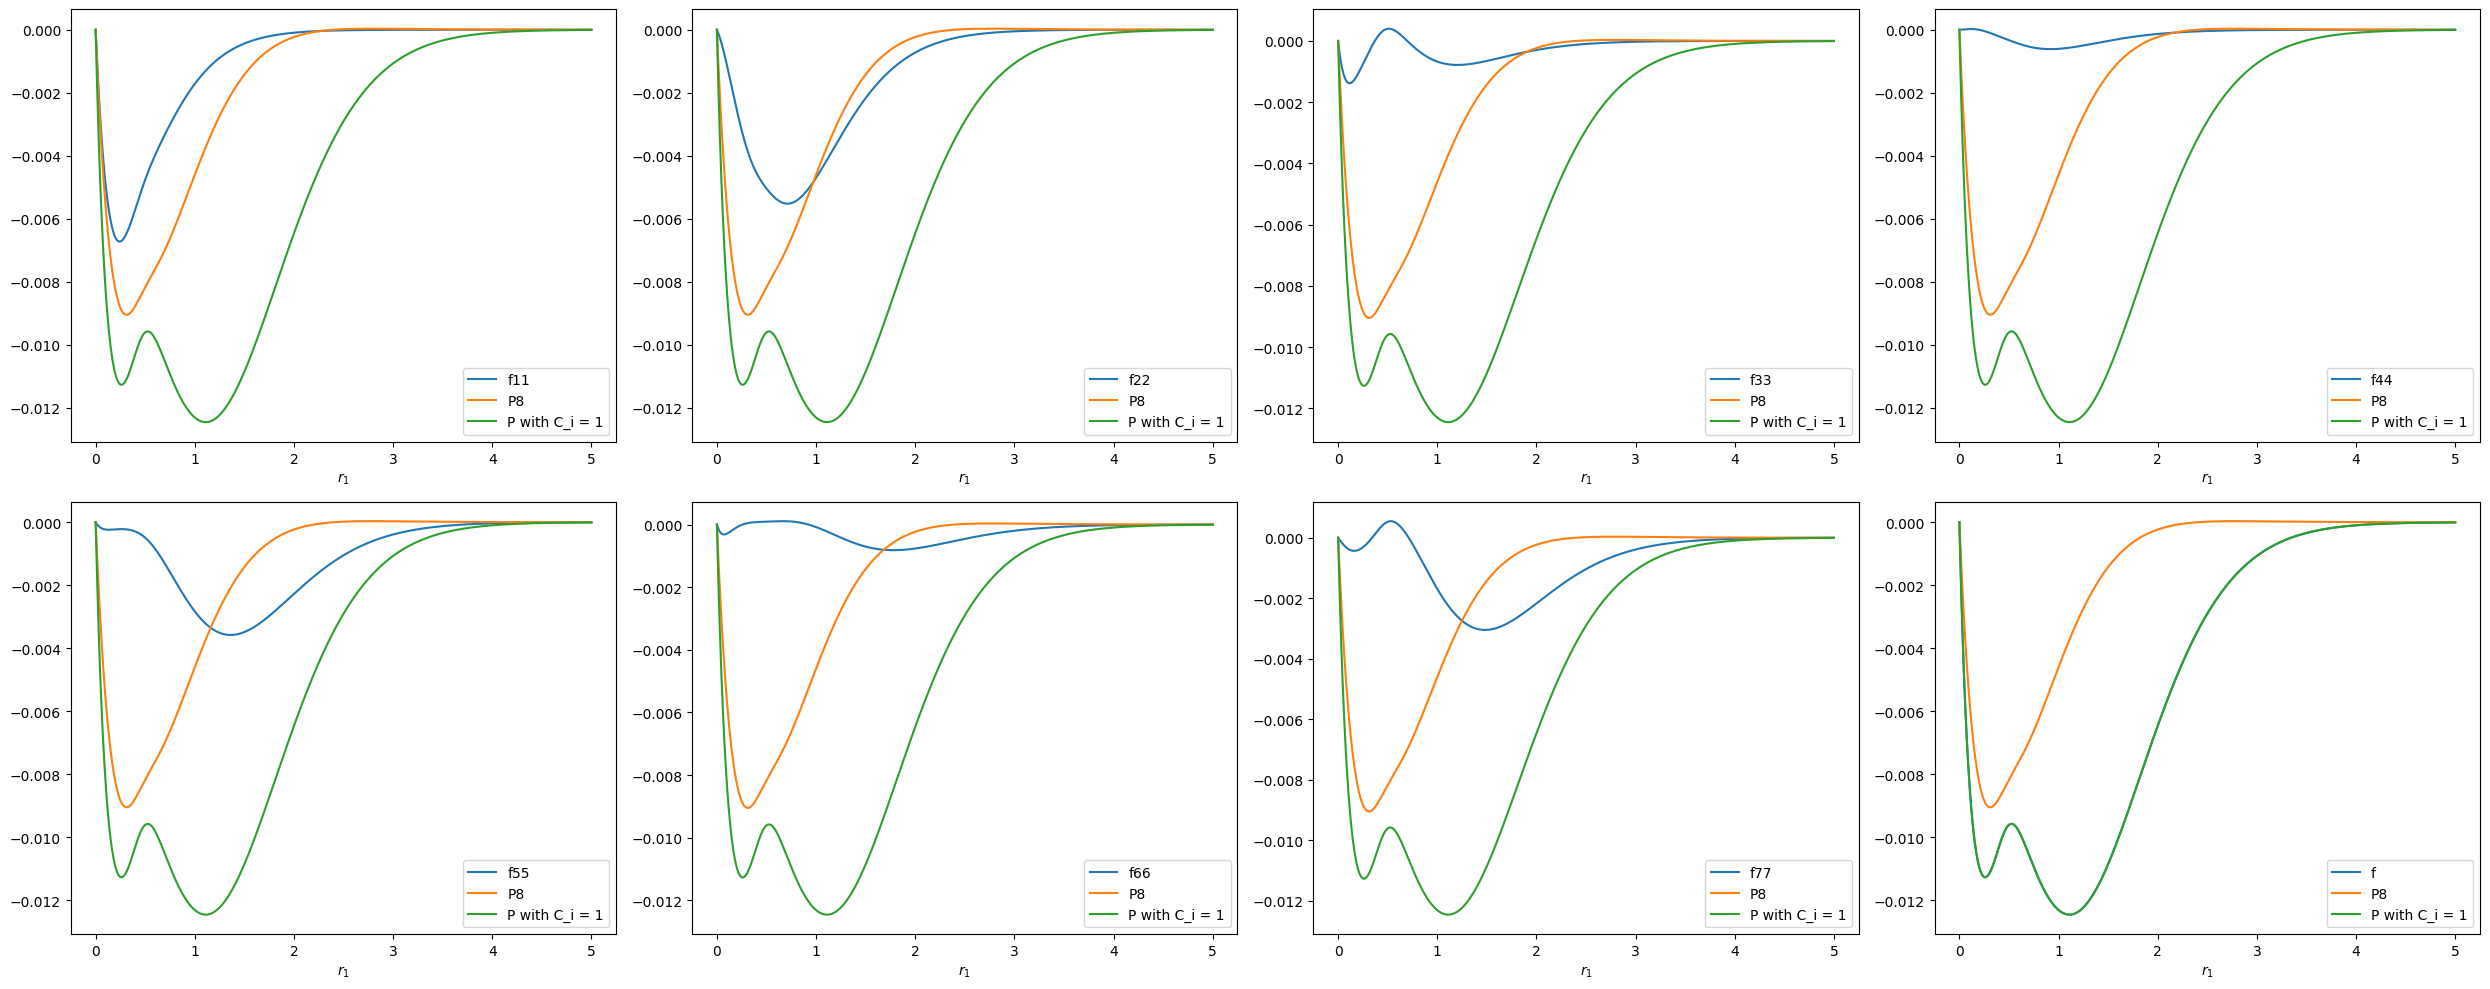

In [114]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_8, label='P8')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [115]:
f11_over_p8 = F_11_2d/p_8
f22_over_p8 = F_22_2d/p_8
f33_over_p8 = F_33_2d/p_8
f44_over_p8 = F_44_2d/p_8
f55_over_p8 = F_55_2d/p_8
f66_over_p8 = F_66_2d/p_8
f77_over_p8 = F_77_2d/p_8
f_over_p8 = F_2d/p_8

<ipython-input-115-fac33cc441d5>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p8 = F_11_2d/p_8
<ipython-input-115-fac33cc441d5>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p8 = F_22_2d/p_8
<ipython-input-115-fac33cc441d5>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p8 = F_33_2d/p_8
<ipython-input-115-fac33cc441d5>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p8 = F_44_2d/p_8
<ipython-input-115-fac33cc441d5>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p8 = F_55_2d/p_8
<ipython-input-115-fac33cc441d5>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p8 = F_66_2d/p_8
<ipython-input-115-fac33cc441d5>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p8 = F_77_2d/p_8
<ipython-input-115-fac33cc441d5>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p8 = F_2d/p_8


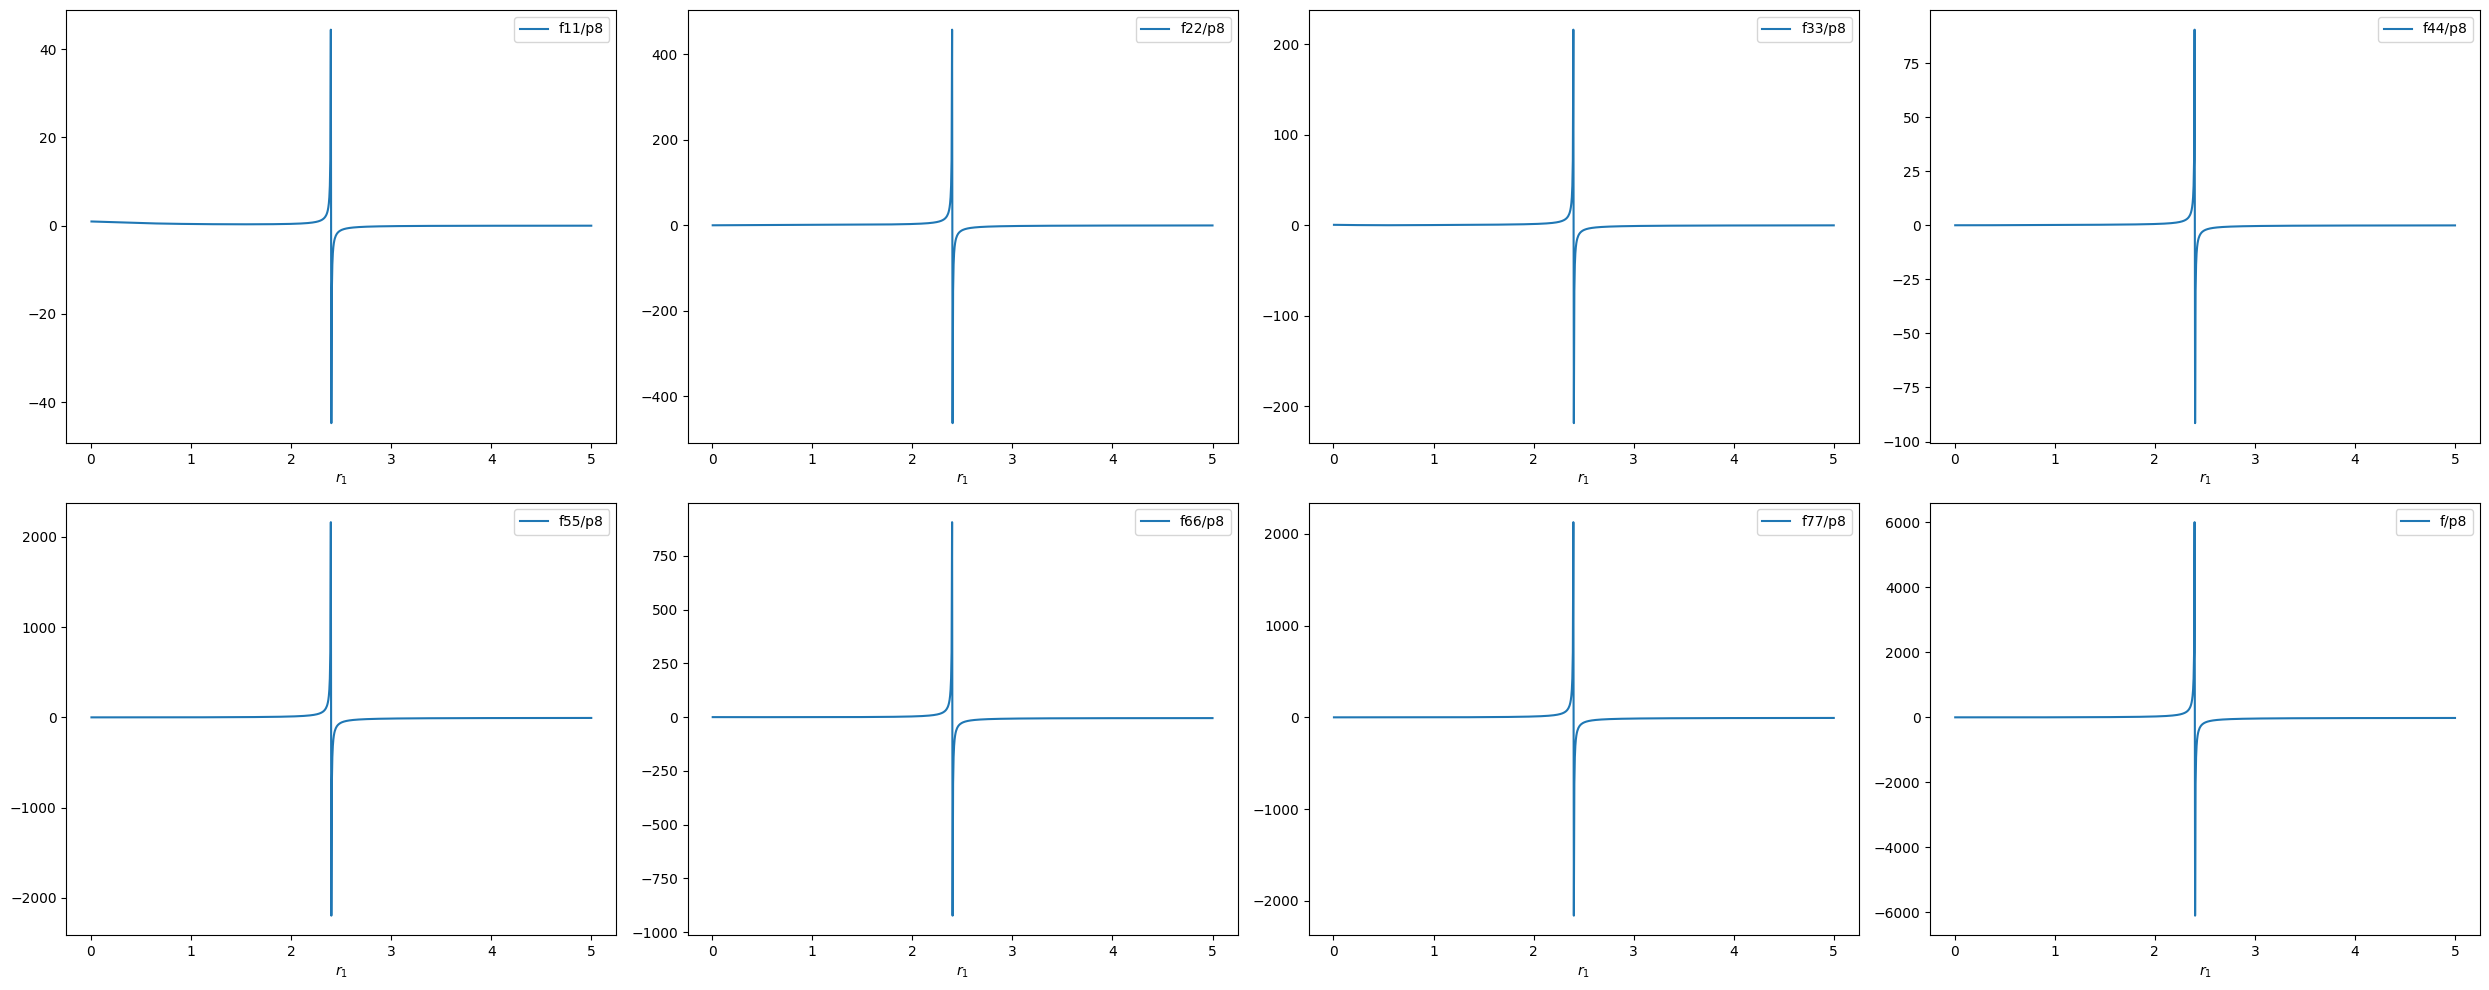

In [116]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p8, f22_over_p8, f33_over_p8, f44_over_p8, f55_over_p8, f66_over_p8, f77_over_p8, f_over_p8]
titles = ['f11/p8', 'f22/p8', 'f33/p8', 'f44/p8', 'f55/p8', 'f66/p8', 'f77/p8', 'f/p8']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [117]:
# coefficients_9 = tf.Variable(np.random.uniform(-0.5, 0.5, size=(7,)), dtype=tf.float32)
coefficients_9 = tf.Variable(([-0.24960595,0.26147076,0.46795717,0.36635998,-0.09018998,0.08156269,-0.4375707 ]), dtype = tf.float32)
coefficients_9

## The 7 coefficients lies between (-0.5, 0.5)

<tf.Variable 'Variable:0' shape=(7,) dtype=float32, numpy=
array([-0.24960595,  0.26147076,  0.46795717,  0.36635998, -0.09018998,
        0.08156269, -0.4375707 ], dtype=float32)>

In [118]:
optimizer = tf.keras.optimizers.SGD(learning_rate= 0.001)  # Using Stochastic Gradient Descent(SGD) as an optimizer

# Training step
@tf.function
def train_step_9():

    with tf.GradientTape() as tape:

        p_9 = sampling_function(coefficients_9, f)
        loss_9 = variance_loss(f, p_9)

    gradients_9 = tape.gradient(loss_9, [coefficients_9])
    clipped_gradients = [tf.clip_by_value(grad, -1,1) for grad in gradients_9]
    optimizer.apply_gradients(zip(gradients_9, [coefficients_9]))

    return loss_9

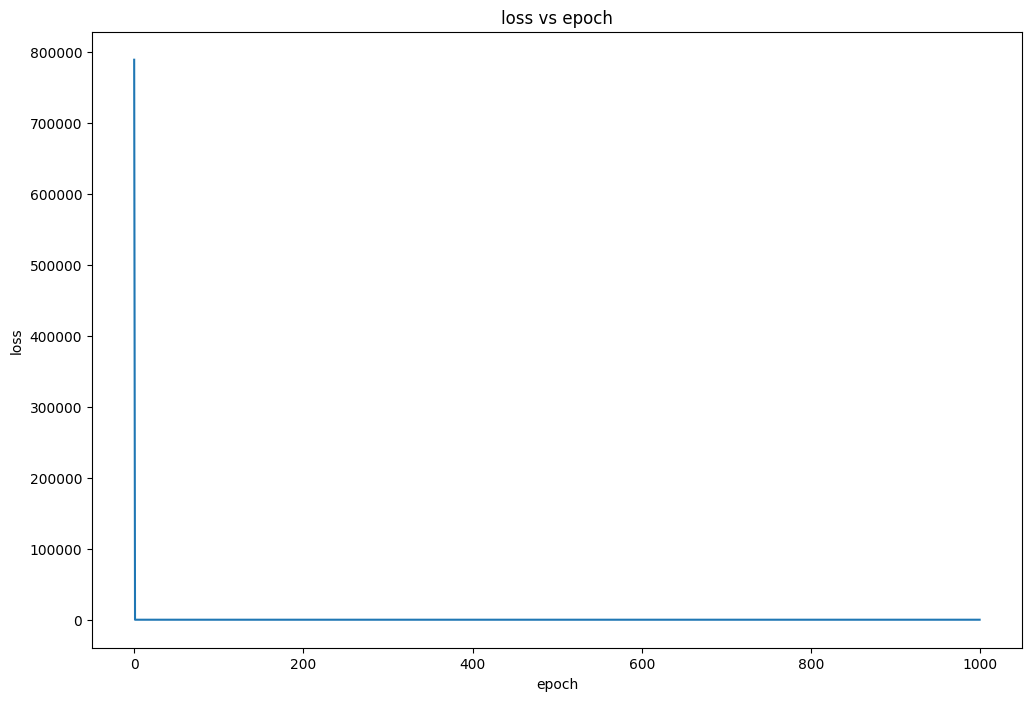

In [119]:
# Training loop
epochs = 1000
loss_list_9 = []
for epoch in range(epochs):
    loss_9 = train_step_9()
    loss_list_9.append(loss_9)

epoch = np.arange(epochs)
loss_9 = np.array(loss_list_9)

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(epoch, loss_9)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('loss vs epoch')

plt.show() ## This graph indicates low learning rate

In [120]:
# Best coefficients
best_coefficients_9 = coefficients_9.numpy()
print("Best coefficients:", best_coefficients_9)

Best coefficients: [ -9108156.  -29947774.   -5803907.   -4194869.5 -24689238.   -1942005.2
 -17678470. ]


In [121]:
p_9 = best_coefficients_9[0] * F_11_2d + best_coefficients_9[1] * F_22_2d + best_coefficients_9[2] * F_33_2d + best_coefficients_9[3]  * F_44_2d + best_coefficients_9[4] * F_55_2d + best_coefficients_9[5] * F_66_2d + best_coefficients_9[6] * F_77_2d
p_9 = p_9/np.max(best_coefficients_9)
## An array of 100 elements

In [122]:
# The final optimized coefficients after normalization (that are included in p_9)

coefficients_normalized_9 = best_coefficients_9/np.max(best_coefficients_9)
print("Best coefficients after normalization:", coefficients_normalized_9)

Best coefficients after normalization: [ 4.690078  15.421057   2.9886155  2.1600711 12.71327    1.
  9.103204 ]


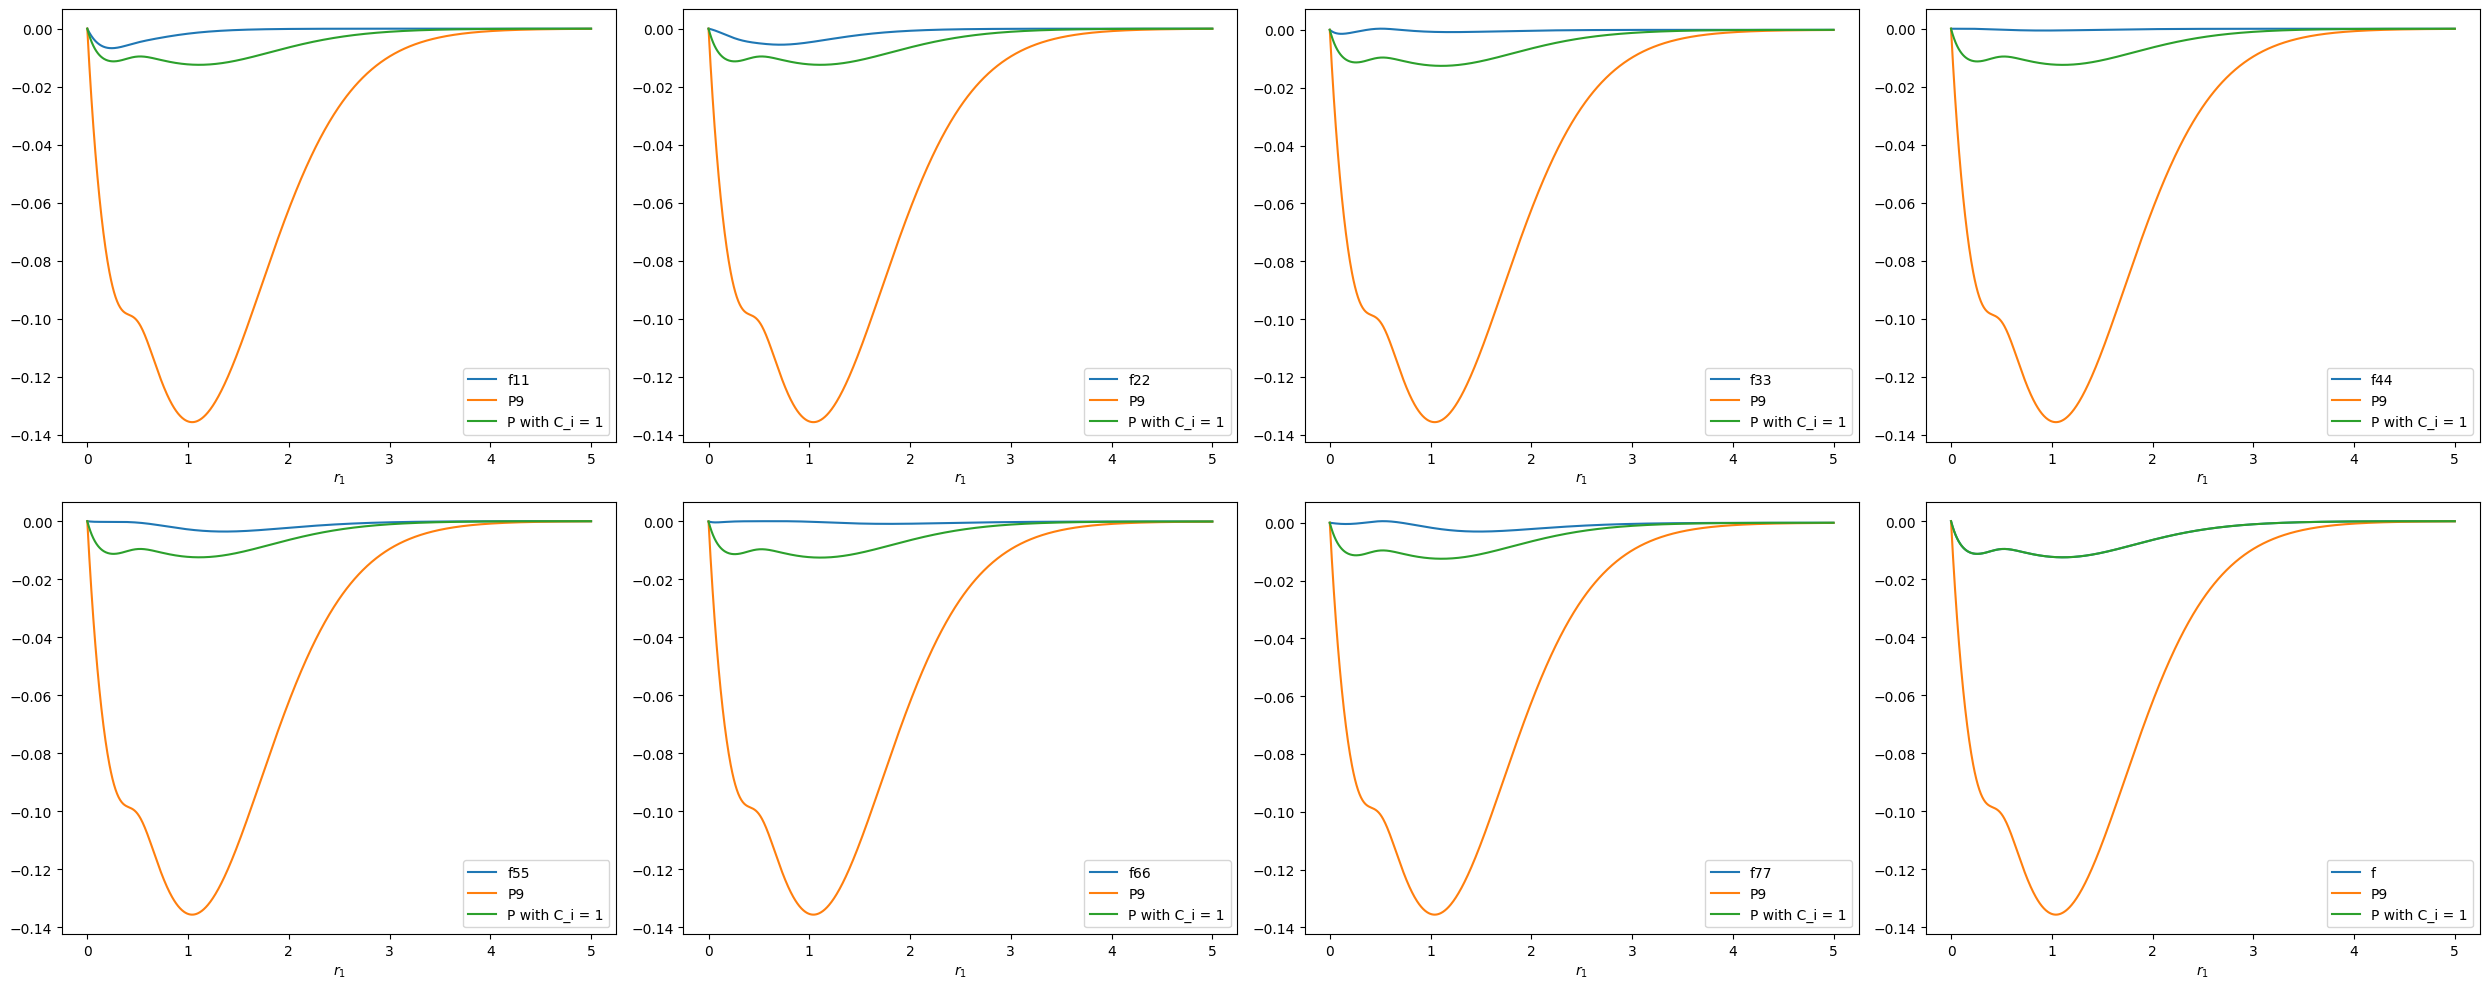

In [123]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [F_11_2d, F_22_2d, F_33_2d, F_44_2d, F_55_2d, F_66_2d, F_77_2d, F_2d]
titles = ['f11', 'f22', 'f33', 'f44', 'f55', 'f66', 'f77', 'f']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    # ax = fig.add_subplot(projection='3d')
    ax.plot(r1, functions[i], label =titles[i])
    ax.plot(r1, p_9, label='P9')
    ax.plot(r1, F_2d, label='P with C_i = 1')
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [124]:
f11_over_p9 = F_11_2d/p_9
f22_over_p9 = F_22_2d/p_9
f33_over_p9 = F_33_2d/p_9
f44_over_p9 = F_44_2d/p_9
f55_over_p9 = F_55_2d/p_9
f66_over_p9 = F_66_2d/p_9
f77_over_p9 = F_77_2d/p_9
f_over_p9 = F_2d/p_9

<ipython-input-124-8cc2eead7e7f>:1: RuntimeWarning: invalid value encountered in divide
  f11_over_p9 = F_11_2d/p_9
<ipython-input-124-8cc2eead7e7f>:2: RuntimeWarning: invalid value encountered in divide
  f22_over_p9 = F_22_2d/p_9
<ipython-input-124-8cc2eead7e7f>:3: RuntimeWarning: invalid value encountered in divide
  f33_over_p9 = F_33_2d/p_9
<ipython-input-124-8cc2eead7e7f>:4: RuntimeWarning: invalid value encountered in divide
  f44_over_p9 = F_44_2d/p_9
<ipython-input-124-8cc2eead7e7f>:5: RuntimeWarning: invalid value encountered in divide
  f55_over_p9 = F_55_2d/p_9
<ipython-input-124-8cc2eead7e7f>:6: RuntimeWarning: invalid value encountered in divide
  f66_over_p9 = F_66_2d/p_9
<ipython-input-124-8cc2eead7e7f>:7: RuntimeWarning: invalid value encountered in divide
  f77_over_p9 = F_77_2d/p_9
<ipython-input-124-8cc2eead7e7f>:8: RuntimeWarning: invalid value encountered in divide
  f_over_p9 = F_2d/p_9


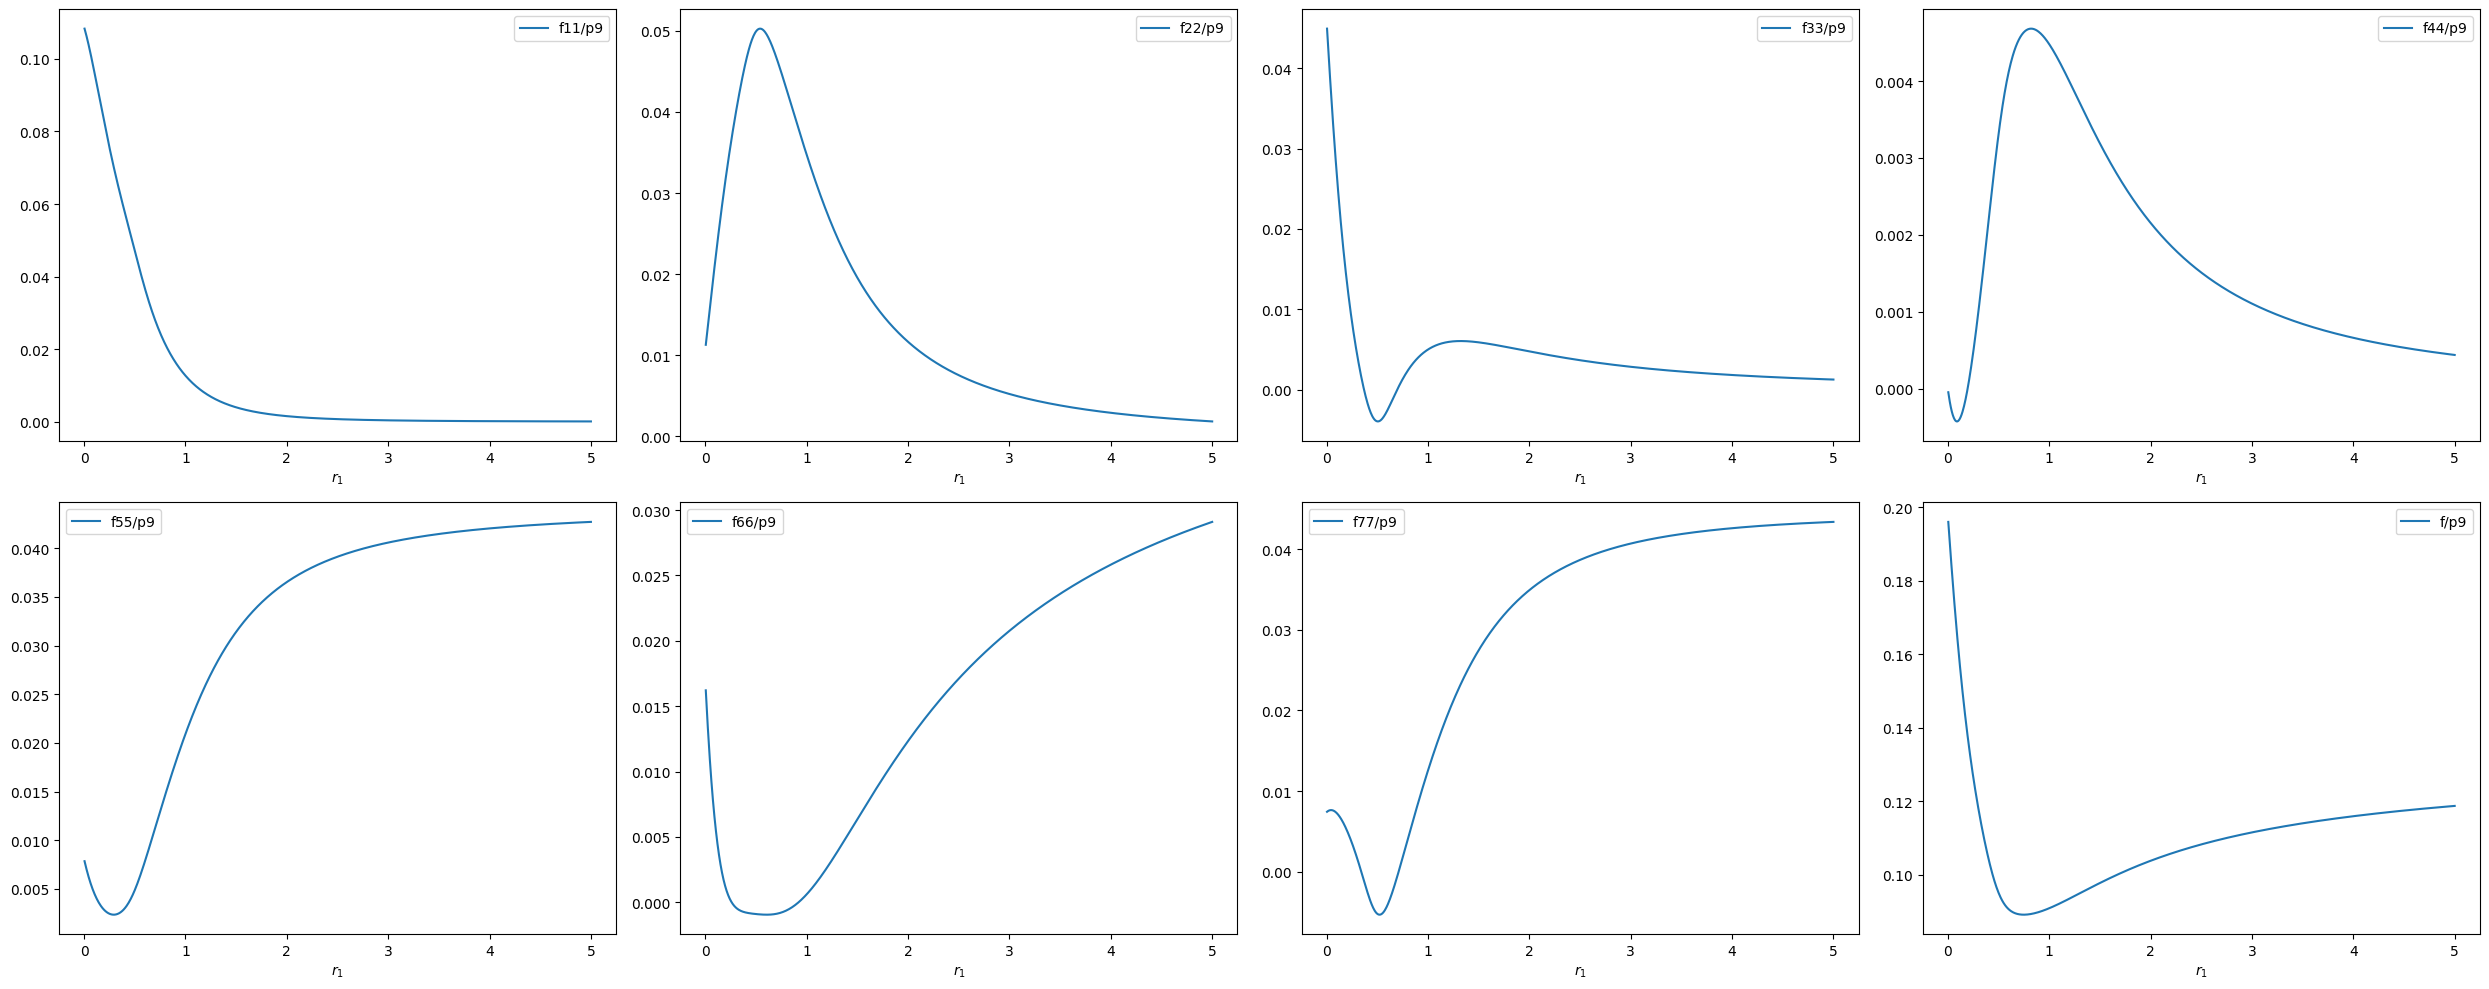

In [125]:
fig, axes = plt.subplots(2,4 ,figsize=(25,10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [f11_over_p9, f22_over_p9, f33_over_p9, f44_over_p9, f55_over_p9, f66_over_p9, f77_over_p9, f_over_p9]
titles = ['f11/p9', 'f22/p9', 'f33/p9', 'f44/p9', 'f55/p9', 'f66/p9', 'f77/p9', 'f/p9']


# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1, functions[i], label =titles[i])
    ax.set_xlabel('$r_1$')
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()